# AI Agents for Social Science & Society: Week 1
# Introducing Deep Learning

__Instructor:__ James Evans

This week introduces the foundational concepts behind modern AI systems, from the neural networks powering recommendation systems to the large language models (LLMs) that drive ChatGPT and other AI agents.

**Your Task: Complete at least 3 out of 4 modules** (or all 4 if you're ambitious!)

Each module builds understanding progressively, but you can choose which topics to focus on based on your interests and time. We recommend:
- **Everyone**: Complete Module 1 (Neural Network Basics) - this is foundational
- **Choose 2-3 more**: Pick the modules most relevant to your research interests

Use the checkboxes below to track your progress.

### Module Summaries

Each module includes **learning content + homework**. You must complete at least **3 out of 4 modules**.

---

**Module 1: Neural Network Basics** (Recommended for everyone)

Build your first neural network and understand the fundamentals. You'll experiment with:
- Different network architectures (shallow vs deep)
- Activation functions (ReLU, Sigmoid, Tanh)
- Learning rates and their impact on training
- How network depth affects performance

**Homework**: Build your first NN on your dataset, compare activation functions (quantitative + qualitative analysis), examine misclassified examples, reflect on architecture choices and scope conditions.

**Why it matters**: These are the building blocks of all neural networks, from simple classifiers to GPT-4.

---

**Module 2: Weight Initialization** (For understanding deep networks)

Discover why some neural networks train successfully while others fail. You'll learn:
- The vanishing and exploding gradient problems
- Xavier and He initialization schemes
- Batch normalization as an initialization technique
- How proper initialization enables very deep networks

**Homework**: Test initialization schemes on a deep network (5 layers), compare convergence speed and stability, analyze when batch normalization helps, reflect on computational costs and connection to LLMs.

**Why it matters**: This was key to the "deep learning revolution" and explains how we can train 100+ layer transformers.

---

**Module 3: Optimization** (For efficient training)

Learn how to train neural networks efficiently. You'll experiment with:
- Different optimizers (SGD, Momentum, Adam, RMSprop)
- Batch sizes and their trade-offs
- Learning rate scheduling strategies
- How optimization choices affect convergence

**Homework**: Compare 4 optimizers on your dataset, explore learning rate sensitivity and overfitting patterns, analyze convergence smoothness and stability, reflect on optimizer choice and implications for large-scale training.

**Why it matters**: The difference between a model that takes hours vs days to train, or converges vs diverges.

---

**Module 4: Regularization** (For preventing overfitting)

Understand how to build models that generalize well to new data. You'll explore:
- L1 and L2 regularization (weight decay)
- Dropout techniques
- Data augmentation strategies
- Combining multiple regularization methods

**Homework**: Combat overfitting with L2, dropout, and combined methods, analyze train/val gap and error patterns, tune dropout rate to find optimal balance, reflect on regularization choices and **ethical implications**.

**Why it matters**: Models that memorize training data are useless. Regularization ensures real-world performance.

---

**Final Homework**: After completing 3-4 modules with mini-homework, synthesize your learning into a best model and write a reflection connecting deep learning fundamentals to AI agents, social science applications, and ethical considerations. This forms your **Week 1 baseline** for the quarter-long final project.

---

**How to Choose**:
- Interested in **why deep learning works**? Do Modules 1, 2, 3
- Interested in **practical model building**? Do Modules 1, 3, 4
- Want **comprehensive understanding**? Do all 4 modules (bonus!)
- Short on time? Do Modules 1, 3, 4 (optimization and regularization are most practically useful)


In [1]:
# Mark the modules you completed (at least 3 out of 4)
Module_1_Neural_Network_Basics = True  # @param {type:"boolean"}
Module_2_Weight_Initialization = False  # @param {type:"boolean"}
Module_3_Optimization = True  # @param {type:"boolean"}
Module_4_Regularization = True  # @param {type:"boolean"}

# Count completed modules
completed = sum([Module_1_Neural_Network_Basics, Module_2_Weight_Initialization, 
                 Module_3_Optimization, Module_4_Regularization])
print(f'Modules completed: {completed}/4')

Modules completed: 3/4


**Link to homework on GitHub:** [link](https://github.com/GitBagguetti/AI-Agents-for-Social-Science-and-Society-2026.git).

## Module 1: Basic Feedforward Neural Network Variations

Feed Forward networks or Multi-layer perceptrons (MLPs) are simple neural networks where each neuron in a layer connects to every neuron in the subsequent layer. For classification tasks, the output layer's size corresponds to the number of classes and often uses a softmax function to generate probability distributions. For regression tasks, the network typically uses linear or ReLU activation functions to output a single real number prediction. We explore this basic architecture and variations with data.**

Imagine a neural network as layers of interconnected nodes, like a biological brain. Each node performs a simple calculation, but together they can learn complex patterns. You can visualize architectures at [NN-SVG](http://alexlenail.me/NN-SVG/index.html) or explore interactive demos at [Tensorflow Playground](https://playground.tensorflow.org/).


Adding multiple layers, we have fully-connected,  feed-forward NNs, where the output of each neuron in the layer above is directed to every neuron in the layer below. The number of neurons in the input layer is the same as the size of the data. The size of the output layer is set to the number of classes and often provides a probability distribution over the classes by passing the neurons through a softmax function. In a regression setting, the activation function is often a simple linear function or ReLU, and the prediction is a real number instead of a probability distribution and class.

In the code below, we create a single layer network in PyTorch, as well as scikit-learn. We do not train these models!



In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

In [2]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(200, 200)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(200, 1)
        # Define sigmoid activation and softmax output
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [3]:
net = Network()

In [4]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))

In [5]:
criterion = nn.BCELoss()

#### scikit-learn

This is just to show a comparison, as the simplest neural network model. Scikit-learn focuses on machine learning and not deep learning, but the multi-layer perceptron is included as a basic model.

In [6]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(200, ), activation='relu')

## Deep Neural Models

A deep feed forward network is one where we have (usually) more than 2 layers of nodes which are fully connected. The crucial distinction here is that while a shallow network could get away with not needing to backpropagate values through the network, a deep network must crucially be able to do this. It is with the Stochastic Gradient Descent powered backpropagation of values that we are able to change our weights and make DNNs useful, and since then, different kinds of DNNs have been the state of the art.

Deep neural models typically have multiple layers stacked together.)

**IMPORTANT NOTE**: this sort of model includes many new topics, so you may not understand every aspect of this model right away. What is important to get from this example, however, is the kind of data we are feeding into the model, the parameters of the model, and the task. In this case, the setting is diverse dataset of forest cover type, using both numerical features and categorical features, and predicting a label over multiple classes. You will often find such scenarios in social sciences datasets, such as census data. Notice the way the data is set up, and the parts of the neural network - the loss function, activation functions, optimisers, and so on.

This example demonstrates how to do structured data classification using the
two modeling
techniques. It is highly recommended to skim these two articles before diving in! The description below the model is the abstract.

1. [Wide & Deep](https://ai.googleblog.com/2016/06/wide-deep-learning-better-together-with.html) models

- The human brain is a sophisticated learning machine, forming rules by memorizing everyday events (“sparrows can fly” and “pigeons can fly”) and generalizing those learnings to apply to things we haven't seen before (“animals with wings can fly”). Perhaps more powerfully, memorization also allows us to further refine our generalized rules with exceptions (“penguins can't fly”). As we were exploring how to advance machine intelligence, we asked ourselves the question—can we teach computers to learn like humans do, by combining the power of memorization and generalization? It's not an easy question to answer, but by jointly training a wide linear model (for memorization) alongside a deep neural network (for generalization), one can combine the strengths of both to bring us one step closer. At Google, we call it Wide & Deep Learning. It's useful for generic large-scale regression and classification problems with sparse inputs (categorical features with a large number of possible feature values), such as recommender systems, search, and ranking problems.

2. [Deep & Cross](https://arxiv.org/abs/1708.05123) models -

- Feature engineering has been the key to the success of many prediction models. However, the process is nontrivial and often requires manual feature engineering or exhaustive searching. DNNs
are able to automatically learn feature interactions; however, they
generate all interactions implicitly, and are not necessarily efficient in learning all types of cross features. In this paper, we propose the Deep & Cross Network (DCN) which keeps the benefits of
a DNN model, and beyond that, it introduces a novel cross network
more efficient in learning certain bounded-degree feature
interactions. In particular, DCN explicitly applies feature crossing
at each layer, requires no manual feature engineering, and adds
negligible extra complexity to the DNN model. Our experimental
results have demonstrated its superiority over the state-of-art algorithms on the CTR prediction dataset and dense classification
dataset, in terms of both model accuracy and memory usage.


### The dataset

This example uses the [Covertype](https://archive.ics.uci.edu/ml/datasets/covertype) dataset from the UCI
Machine Learning Repository. The task is to predict forest cover type from cartographic variables.
The dataset includes 506,011 instances with 12 input features: 10 numerical features and 2
categorical features. Each instance is categorized into 1 of 7 classes, and is **multilabel classification task**. Even though the dataset isn't social scientific, it combines both numerical values and categorical features, which is something you might be dealing with often.

In [7]:
import math
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

### Prepare the data

First, let's load the dataset from the UCI Machine Learning Repository into a Pandas
DataFrame:

In [8]:
# Load and preprocess the dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
raw_data = pd.read_csv(data_url, header=None)
print(f"Dataset shape: {raw_data.shape}")
raw_data.head()

Dataset shape: (581012, 55)


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


The two categorical features in the dataset are binary-encoded.
We will convert this dataset representation to the typical representation, where each
categorical feature is represented as a single integer value.

In [9]:
# Create labels for the 40 soil type categories
soil_type_values = [f"soil_type_{idx+1}" for idx in range(40)]
# Create labels for the 4 wilderness area categories
wilderness_area_values = [f"area_type_{idx+1}" for idx in range(4)]

# Convert binary-encoded soil type columns (14-53) to single categorical feature
# For each row, find which column has a 1 and map it to the corresponding soil type label
soil_type = raw_data.loc[:, 14:53].apply(
    lambda x: soil_type_values[0::1][x.to_numpy().nonzero()[0][0]], axis=1
)
# Convert binary-encoded wilderness area columns (10-13) to single categorical feature
# For each row, find which column has a 1 and map it to the corresponding area type label
wilderness_area = raw_data.loc[:, 10:13].apply(
    lambda x: wilderness_area_values[0::1][x.to_numpy().nonzero()[0][0]], axis=1
)

# Define column names for the restructured dataset
CSV_HEADER = [
    "Elevation",
    "Aspect",
    "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points",
    "Wilderness_Area",
    "Soil_Type",
    "Cover_Type",
]

# Combine numerical features (columns 0-9), categorical features, and target label (column 54)
data = pd.concat(
    [raw_data.loc[:, 0:9], wilderness_area, soil_type, raw_data.loc[:, 54]],
    axis=1,
    ignore_index=True,
)
# Assign meaningful column names to the restructured data
data.columns = CSV_HEADER

# Convert the target label indices into a range from 0 to 6 (there are 7 labels in total).
data["Cover_Type"] = data["Cover_Type"] - 1

print(f"Dataset shape: {data.shape}")
data.head().T

Dataset shape: (581012, 13)


,0,1,2,3,4
Elevation,2596,2590,2804,2785,2595
Aspect,51,56,139,155,45
Slope,3,2,9,18,2
Horizontal_Distance_To_Hydrology,258,212,268,242,153
Vertical_Distance_To_Hydrology,0,-6,65,118,-1
Horizontal_Distance_To_Roadways,510,390,3180,3090,391
Hillshade_9am,221,220,234,238,220
Hillshade_Noon,232,235,238,238,234
Hillshade_3pm,148,151,135,122,150
Horizontal_Distance_To_Fire_Points,6279,6225,6121,6211,6172


The shape of the DataFrame shows there are 13 columns per sample
(12 for the features and 1 for the target label).

Let's split the data into training (85%) and test (15%) sets.

In [10]:
train_splits = []
test_splits = []

for _, group_data in data.groupby("Cover_Type"):
    random_selection = np.random.rand(len(group_data.index)) <= 0.85
    train_splits.append(group_data[random_selection])
    test_splits.append(group_data[~random_selection])

train_data = pd.concat(train_splits).sample(frac=1).reset_index(drop=True)
test_data = pd.concat(test_splits).sample(frac=1).reset_index(drop=True)

print(f"Train split size: {len(train_data.index)}")
print(f"Test split size: {len(test_data.index)}")

Train split size: 493825
Test split size: 87187


Next, store the training and test data in separate CSV files.

In [36]:
train_data_file = "train_data.csv"
test_data_file = "test_data.csv"

train_data.to_csv(train_data_file, index=False)
test_data.to_csv(test_data_file, index=False)

### Define dataset metadata

Here, we define the metadata of the dataset that will be useful for reading and parsing
the data into input features, and encoding the input features with respect to their types.

In [11]:
TARGET_FEATURE_NAME = "Cover_Type"

TARGET_FEATURE_LABELS = ["0", "1", "2", "3", "4", "5", "6"]

NUMERIC_FEATURE_NAMES = [
    "Aspect",
    "Elevation",
    "Hillshade_3pm",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Horizontal_Distance_To_Fire_Points",
    "Horizontal_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Slope",
    "Vertical_Distance_To_Hydrology",
]

CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    "Soil_Type": list(data["Soil_Type"].unique()),
    "Wilderness_Area": list(data["Wilderness_Area"].unique()),
}

CATEGORICAL_FEATURE_NAMES = list(CATEGORICAL_FEATURES_WITH_VOCABULARY.keys())

FEATURE_NAMES = NUMERIC_FEATURE_NAMES + CATEGORICAL_FEATURE_NAMES

COLUMN_DEFAULTS = [
    [0] if feature_name in NUMERIC_FEATURE_NAMES + [TARGET_FEATURE_NAME] else ["NA"]
    for feature_name in CSV_HEADER
]

NUM_CLASSES = len(TARGET_FEATURE_LABELS)

### Experiment setup

Here we organize and store the processed data in a way that PyTorch can easily use and further preprocesses the data by converting categorical features and labels into numerical representations using LabelEncoder.

In [13]:
class ForestDataset(Dataset):
    def __init__(self, dataframe, numeric_features, categorical_features):
        # Extract numeric features and convert to float32 for PyTorch
        self.numeric_data = dataframe[numeric_features].values.astype(np.float32)
        
        # Initialize label encoder for the target variable (Cover_Type)
        self.label_encoder = LabelEncoder()
        self.labels = self.label_encoder.fit_transform(dataframe["Cover_Type"].values)
        
        # Create a separate label encoder for each categorical feature
        self.cat_encoders = {
            feature: LabelEncoder().fit(dataframe[feature])
            for feature in categorical_features
        }
        
        # Transform categorical features to numerical indices
        self.categorical_data = [
            self.cat_encoders[feature].transform(dataframe[feature])
            for feature in categorical_features
        ]

    def __len__(self):
        # Return the total number of samples in the dataset
        return len(self.labels)

    def __getitem__(self, idx):
        # Get numeric features for the given index
        numeric = torch.tensor(self.numeric_data[idx], dtype=torch.float32)
        
        # Get categorical features for the given index (combine all categorical columns)
        categorical = torch.tensor([self.categorical_data[i][idx] for i in range(len(self.categorical_data))], dtype=torch.long)
        
        # Get the label for the given index
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        
        return numeric, categorical, label

In [14]:
# Data preparation
train_dataset = ForestDataset(train_data, NUMERIC_FEATURE_NAMES, CATEGORICAL_FEATURE_NAMES)
test_dataset = ForestDataset(test_data, NUMERIC_FEATURE_NAMES, CATEGORICAL_FEATURE_NAMES)

batch_size = 265
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

### Experiment 1: a baseline model

In the first experiment, let's create a multi-layer feed-forward network,
where the categorical features are one-hot encoded.

**Note**: Some new terms here! We see a Batch Normalisation layer. We will encounter these in our second notebook on regularisation, but for a brief explanation:

Batch normalization tries to reduce the “internal covariate shift” between training and testing data. Internal covariate shift is the change in the distribution of network activations due to the change in paramaters during training. In neural networks, the output of the first layer feeds into the second layer, the output of the second layer feeds into the third, and so on. When the parameters of a layer change, so does the distribution of inputs to subsequent layers. These shifts in input distributions can be problematic for neural networks, especially deep neural networks that could have a large number of layers. Batch normalization tries to mitigate this. You can check out [this](https://arxiv.org/abs/1502.03167) paper where the idea of mitigating internal covariance shift with batch normalization was first introduced.

We also see Dropout, another term from the regularisation universe. Dropout involves injecting noise while computing each internal layer during forward propagation. The method is called dropout because we literally drop out some neurons during training. Throughout training, on each iteration, standard dropout consists of zeroing out some fraction of the nodes in each layer before calculating the subsequent layer.

![Dropout](https://d2l.ai/_images/dropout2.svg)


In [15]:
# Model definition
class BaselineModel(nn.Module):
    def __init__(self, num_numeric_features, categorical_cardinalities, hidden_units, num_classes, dropout_rate):
        super(BaselineModel, self).__init__()
        
        # Create embedding layers for each categorical feature
        # Embedding dimension is set to sqrt(cardinality) as a rule of thumb
        self.cat_embeddings = nn.ModuleList(
            [nn.Embedding(cardinality, int(math.sqrt(cardinality))) for cardinality in categorical_cardinalities]
        )
        
        # Calculate total input dimension: numeric features + sum of all embedding dimensions
        input_dim = num_numeric_features + sum(emb.embedding_dim for emb in self.cat_embeddings)
        
        # Create hidden layers with specified units
        # First layer takes input_dim, subsequent layers take output from previous layer
        self.hidden_layers = nn.ModuleList(
            [nn.Linear(input_dim if i == 0 else hidden_units[i-1], hidden_units[i]) for i in range(len(hidden_units))]
        )
        
        # Batch normalization layers for each hidden layer to stabilize training
        self.batch_norms = nn.ModuleList([nn.BatchNorm1d(units) for units in hidden_units])
        
        # Dropout layer for regularization to prevent overfitting
        self.dropout = nn.Dropout(dropout_rate)
        
        # Final output layer that maps to number of classes
        self.output_layer = nn.Linear(hidden_units[-1], num_classes)

    def forward(self, numeric_inputs, categorical_inputs):
        # Embed each categorical feature using its corresponding embedding layer
        embedded_cats = [emb(cat) for emb, cat in zip(self.cat_embeddings, categorical_inputs.T)]
        
        # Concatenate numeric inputs with all embedded categorical features
        features = torch.cat([numeric_inputs] + embedded_cats, dim=1)
        
        # Pass through hidden layers with batch norm, ReLU activation, and dropout
        for layer, bn in zip(self.hidden_layers, self.batch_norms):
            features = self.dropout(torch.relu(bn(layer(features))))
        
        # Apply output layer and softmax to get class probabilities
        return torch.softmax(self.output_layer(features), dim=1)

# Determine number of output classes from the target variable
num_classes = len(data["Cover_Type"].unique())

# Get the cardinality (number of unique values) for each categorical feature
categorical_cardinalities = [len(train_dataset.cat_encoders[feature].classes_) for feature in CATEGORICAL_FEATURE_NAMES]

# Instantiate the baseline model with specified architecture
model = BaselineModel(
    num_numeric_features=len(NUMERIC_FEATURE_NAMES),
    categorical_cardinalities=categorical_cardinalities,
    hidden_units=[32, 32],  # Two hidden layers with 32 units each
    num_classes=num_classes,
    dropout_rate=0.1  # 10% dropout rate
)

Setting up for Training


In [16]:
# Training and evaluation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available, otherwise CPU
model.to(device)  # Move model to the selected device
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

def train_model(model, dataloader, optimizer, criterion, num_epochs):
    model.train()  # Set model to training mode
    for epoch in range(num_epochs):
        total_loss = 0
        for numeric, categorical, labels in dataloader:  # Iterate through batches
            numeric, categorical, labels = numeric.to(device), categorical.to(device), labels.to(device)  # Move data to device
            optimizer.zero_grad()  # Clear gradients from previous step
            outputs = model(numeric, categorical)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backward pass to compute gradients
            optimizer.step()  # Update model parameters
            total_loss += loss.item()  # Accumulate loss for this epoch
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(dataloader):.4f}")  # Print average loss per epoch

The Evaluation Function

In [17]:
def evaluate_model(model, dataloader):
    model.eval()  # Set model to evaluation mode (disables dropout, batch norm, etc.)
    correct = 0  # Counter for correct predictions
    total = 0  # Counter for total samples
    with torch.no_grad():  # Disable gradient computation for efficiency
        for numeric, categorical, labels in dataloader:  # Iterate through test batches
            numeric, categorical, labels = numeric.to(device), categorical.to(device), labels.to(device)  # Move data to device
            outputs = model(numeric, categorical)  # Forward pass to get predictions
            _, predicted = torch.max(outputs, 1)  # Get the class with highest probability
            correct += (predicted == labels).sum().item()  # Count correct predictions
            total += labels.size(0)  # Count total samples
    accuracy = correct / total * 100  # Calculate accuracy as percentage
    print(f"Test Accuracy: {accuracy:.2f}%")  # Print the test accuracy

train_model(model, train_loader, optimizer, criterion, num_epochs=50)  # Train the model for 50 epochs
evaluate_model(model, test_loader)  # Evaluate the trained model on test data

Epoch 1/50, Loss: 1.4818
Epoch 2/50, Loss: 1.4440
Epoch 3/50, Loss: 1.4376
Epoch 4/50, Loss: 1.4335
Epoch 5/50, Loss: 1.4295
Epoch 6/50, Loss: 1.4266
Epoch 7/50, Loss: 1.4245
Epoch 8/50, Loss: 1.4237
Epoch 9/50, Loss: 1.4219
Epoch 10/50, Loss: 1.4205
Epoch 11/50, Loss: 1.4198
Epoch 12/50, Loss: 1.4183
Epoch 13/50, Loss: 1.4177
Epoch 14/50, Loss: 1.4163
Epoch 15/50, Loss: 1.4154
Epoch 16/50, Loss: 1.4146
Epoch 17/50, Loss: 1.4147
Epoch 18/50, Loss: 1.4136
Epoch 19/50, Loss: 1.4132
Epoch 20/50, Loss: 1.4126
Epoch 21/50, Loss: 1.4116
Epoch 22/50, Loss: 1.4115
Epoch 23/50, Loss: 1.4109
Epoch 24/50, Loss: 1.4105
Epoch 25/50, Loss: 1.4098
Epoch 26/50, Loss: 1.4095
Epoch 27/50, Loss: 1.4089
Epoch 28/50, Loss: 1.4086
Epoch 29/50, Loss: 1.4080
Epoch 30/50, Loss: 1.4081
Epoch 31/50, Loss: 1.4076
Epoch 32/50, Loss: 1.4070
Epoch 33/50, Loss: 1.4068
Epoch 34/50, Loss: 1.4065
Epoch 35/50, Loss: 1.4068
Epoch 36/50, Loss: 1.4061
Epoch 37/50, Loss: 1.4063
Epoch 38/50, Loss: 1.4054
Epoch 39/50, Loss: 1.

The baseline linear model achieves ~75% test accuracy.

### Advanced Architecture: Wide & Deep Models

For more complex problems, specialized architectures can help. The **Wide & Deep** model (Google, 2016) combines:
- **Wide component**: Linear model for memorization (captures feature interactions)
- **Deep component**: Neural network for generalization (learns representations)

This hybrid approach works well for recommendation systems and structured data with many categorical features.

**Further reading:** [Wide & Deep Learning paper](https://arxiv.org/abs/1606.07792)

### Advanced Architecture: Deep & Cross Networks

**Deep & Cross Networks** (DCN, Google, 2017) efficiently capture feature crossings:
- **Cross layers**: Explicitly model feature interactions
- **Deep layers**: Learn complex representations

DCN is particularly effective for click-through rate prediction and other tasks requiring feature combinations.

**Further reading:** [Deep & Cross Network paper](https://arxiv.org/abs/1708.05123)

## Exploring Network Fundamentals

Before diving into optimization and regularization, let's explore some fundamental questions about neural networks using MNIST:
- How do different activation functions affect training?
- What learning rate should we use?
- How does network depth impact performance?

These experiments will build intuition for the concepts we'll formalize in Modules 2-4.

### Activation Function Comparison

Different activation functions have different properties. Let's compare three common ones:

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 426kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.97MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.40MB/s]


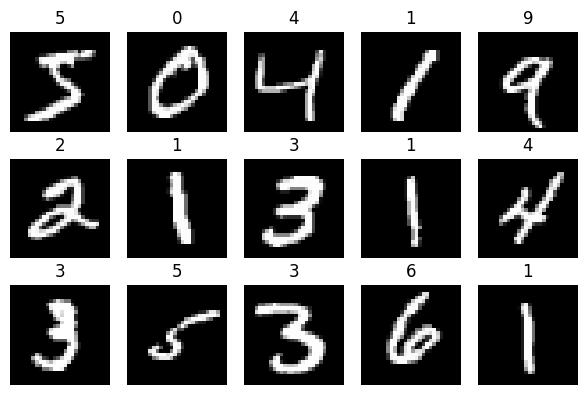

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Load MNIST
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST('data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST('data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=1000, shuffle=False)

# Visualize some MNIST images
fig, axes = plt.subplots(3, 5, figsize=(6, 4))
for ax, (img, label) in zip(axes.ravel(), mnist_train):
    ax.imshow(img.squeeze(0), cmap="gray")
    ax.set_title(label)
    ax.axis("off")
plt.tight_layout()
plt.show()

Training with relu...
  Final accuracy: 97.47%
Training with sigmoid...
  Final accuracy: 96.57%
Training with tanh...
  Final accuracy: 97.54%


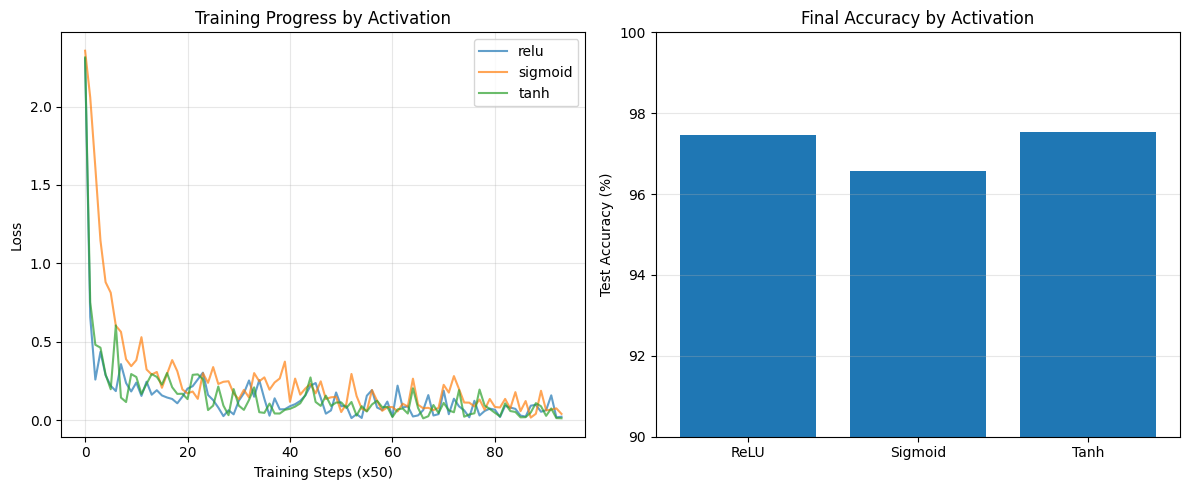

In [19]:
class MLPActivation(nn.Module):
    def __init__(self, activation='relu'):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.activation_name = activation
        
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        return self.fc3(x)

def train_model(model, epochs=5):
    opt = optim.Adam(model.parameters(), lr=0.001)
    train_losses = []
    
    for epoch in range(epochs):
        model.train()
        for x, y in train_loader:
            opt.zero_grad()
            out = model(x)
            loss = nn.CrossEntropyLoss()(out, y)
            loss.backward()
            opt.step()
            train_losses.append(loss.item())
    
    # Evaluate
    model.eval()
    correct = 0
    with torch.no_grad():
        for x, y in test_loader:
            out = model(x)
            pred = out.argmax(dim=1)
            correct += (pred == y).sum().item()
    
    acc = 100 * correct / len(mnist_test)
    return train_losses, acc

# Train with different activations
results = {}
for act in ['relu', 'sigmoid', 'tanh']:
    print(f'Training with {act}...')
    model = MLPActivation(activation=act)
    losses, acc = train_model(model, epochs=5)
    results[act] = {'losses': losses, 'acc': acc}
    print(f'  Final accuracy: {acc:.2f}%')

# Visualize
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for act in ['relu', 'sigmoid', 'tanh']:
    losses = results[act]['losses']
    plt.plot(losses[::50], label=act, alpha=0.7)
plt.xlabel('Training Steps (x50)')
plt.ylabel('Loss')
plt.title('Training Progress by Activation')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
accs = [results[act]['acc'] for act in ['relu', 'sigmoid', 'tanh']]
plt.bar(['ReLU', 'Sigmoid', 'Tanh'], accs)
plt.ylabel('Test Accuracy (%)')
plt.title('Final Accuracy by Activation')
plt.ylim([90, 100])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Learning Rate Exploration

The learning rate is arguably the most important hyperparameter. Too small = slow training. Too large = unstable/divergence.

Training with LR=0.001...
Training with LR=0.01...
Training with LR=0.1...
Training with LR=1.0...


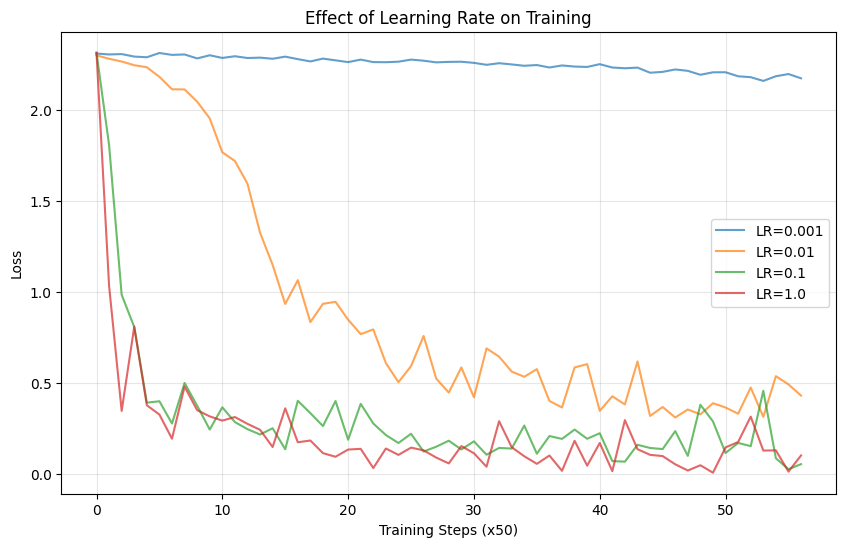

In [20]:
def train_with_lr(lr, epochs=3):
    model = MLPActivation(activation='relu')
    opt = optim.SGD(model.parameters(), lr=lr)
    losses = []
    
    for epoch in range(epochs):
        model.train()
        for x, y in train_loader:
            opt.zero_grad()
            out = model(x)
            loss = nn.CrossEntropyLoss()(out, y)
            loss.backward()
            opt.step()
            losses.append(loss.item())
    
    return losses

# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 1.0]
lr_results = {}

for lr in learning_rates:
    print(f'Training with LR={lr}...')
    losses = train_with_lr(lr, epochs=3)
    lr_results[lr] = losses

# Visualize
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    losses = lr_results[lr]
    plt.plot(losses[::50], label=f'LR={lr}', alpha=0.7)
plt.xlabel('Training Steps (x50)')
plt.ylabel('Loss')
plt.title('Effect of Learning Rate on Training')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Network Depth Exploration

Does adding more layers help? Let's test networks of different depths:

Training 2-layer network...
  Test accuracy: 97.60%
Training 4-layer network...
  Test accuracy: 97.42%
Training 6-layer network...
  Test accuracy: 97.32%


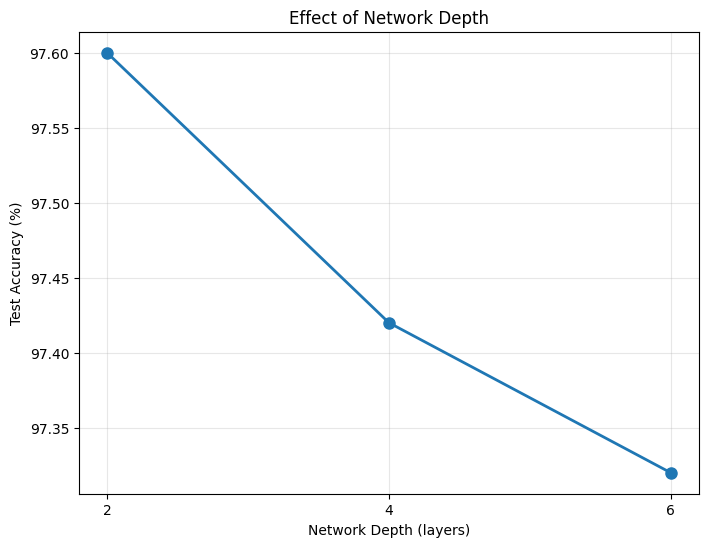

In [21]:
class MLPDepth(nn.Module):
    def __init__(self, n_layers):
        super().__init__()
        self.n_layers = n_layers
        layers = []
        
        # Input layer
        layers.append(nn.Linear(784, 128))
        layers.append(nn.ReLU())
        
        # Hidden layers
        for _ in range(n_layers - 2):
            layers.append(nn.Linear(128, 128))
            layers.append(nn.ReLU())
        
        # Output layer
        layers.append(nn.Linear(128, 10))
        
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        x = x.view(-1, 784)
        return self.model(x)

# Test different depths
depths = [2, 4, 6]
depth_results = {}

for depth in depths:
    print(f'Training {depth}-layer network...')
    model = MLPDepth(n_layers=depth)
    _, acc = train_model(model, epochs=5)
    depth_results[depth] = acc
    print(f'  Test accuracy: {acc:.2f}%')

# Visualize
plt.figure(figsize=(8, 6))
plt.plot(depths, [depth_results[d] for d in depths], marker='o', linewidth=2, markersize=8)
plt.xlabel('Network Depth (layers)')
plt.ylabel('Test Accuracy (%)')
plt.title('Effect of Network Depth')
plt.grid(True, alpha=0.3)
plt.xticks(depths)
plt.show()

### Conclusion

You can use Preprocessing Layers to easily handle categorical features
with different encoding mechanisms, including one-hot encoding and feature embedding.
In addition, different model architectures — like wide, deep, and cross networks
— have different advantages, with respect to different dataset properties.
You can explore using them independently or combining them to achieve the best result
for your dataset.

---
## Module 1 Homework: Neural Network Basics

Now that you've learned about neural network architectures, activations, and learning rates, it's time to apply these concepts to a dataset of your choice. This mini-homework will help you build skills progressively toward your final project.

**Important**: Choose a dataset you'll continue using throughout the quarter for your final project. See suggestions in the introduction or use your own social science data.

### Task 1.1: Build Your First Neural Network

Choose a dataset (MNIST, or your own social science dataset) and:
- Load and preprocess the data
- Split into train/validation/test (70/15/15)
- Build a simple 2-layer MLP (input → 128 units → 64 units → output)
- Train for 10 epochs with ReLU activation and Adam optimizer
- **Quantitative**: Report training time and final accuracy
- **Qualitative**: Examine 3-5 misclassified examples - what patterns do you notice?

In [1]:
# Task 1.1: Build Your First Neural Network using MNIST
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import time
import matplotlib.pyplot as plt

# Load MNIST data
transform = transforms.Compose([transforms.ToTensor()])
mnist_full = datasets.MNIST('data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST('data', train=False, download=True, transform=transform)

# Split train into train/validation (70/15 of total, test is already 15%)
train_size = int(0.823 * len(mnist_full))  # 70% of total dataset
val_size = len(mnist_full) - train_size     # 15% of total dataset

mnist_train, mnist_val = torch.utils.data.random_split(mnist_full, [train_size, val_size])

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.10MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.04MB/s]


In [ ]:
# Create data loaders
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(mnist_val, batch_size=1000, shuffle=False)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=1000, shuffle=False)

# Build 2-layer MLP: input (784) to 128 units to 64 units to output (10)
class MLP_Task1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

In [3]:
# Train the model
model = MLP_Task1()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training
start_time = time.time()

for epoch in range(10):
    model.train()
    epoch_loss = 0
    for x, y in train_loader:
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f'Epoch {epoch+1}/10, Loss: {epoch_loss/len(train_loader):.4f}')

training_time = time.time() - start_time

# Evaluate on test set
model.eval()
correct = 0
with torch.no_grad():
    for x, y in test_loader:
        out = model(x)
        pred = out.argmax(dim=1)
        correct += (pred == y).sum().item()

accuracy = 100 * correct / len(mnist_test)

print(f'\n**Quantitative Results:**')
print(f'Training time: {training_time:.2f} seconds')
print(f'Final test accuracy: {accuracy:.2f}%')

Epoch 1/10, Loss: 0.3769
Epoch 2/10, Loss: 0.1597
Epoch 3/10, Loss: 0.1117
Epoch 4/10, Loss: 0.0823
Epoch 5/10, Loss: 0.0644
Epoch 6/10, Loss: 0.0516
Epoch 7/10, Loss: 0.0392
Epoch 8/10, Loss: 0.0327
Epoch 9/10, Loss: 0.0279
Epoch 10/10, Loss: 0.0215

**Quantitative Results:**
Training time: 67.14 seconds
Final test accuracy: 97.53%



**Qualitative Analysis - Misclassified Examples:**


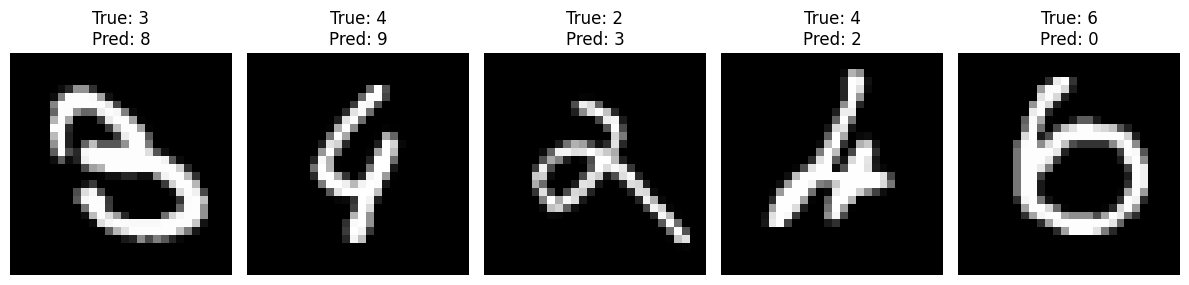

In [ ]:
# Find and visualize misclassified examples
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

model.eval()
with torch.no_grad():
    for x, y in test_loader:
        out = model(x)
        pred = out.argmax(dim=1)
        mask = pred != y
        if mask.any():
            misclassified_images.extend(x[mask][:5])
            misclassified_labels.extend(y[mask][:5].tolist())
            misclassified_preds.extend(pred[mask][:5].tolist())
        if len(misclassified_images) >= 5:
            break

print(f'\n**Qualitative Analysis - Misclassified Examples:**')
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    axes[i].imshow(misclassified_images[i].squeeze(0), cmap='gray')
    axes[i].set_title(f'True: {misclassified_labels[i]}\nPred: {misclassified_preds[i]}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

Patterns in misclassifications:
- Digits with unusual handwriting styles (e.g., the 2 in the middle)
- Visually similar digits (e.g., 4 vs 9, 3 vs 8)
- Poorly written or ambiguous digits that even humans might struggle with (e.g., 4 to the right)

### Task 1.2: Compare Activation Functions

Train 3 identical networks with different activations: ReLU, Sigmoid, Tanh
- Use same architecture from Task 1.1
- Train each for 10 epochs
- **Quantitative**: Plot training loss curves for all 3, report final accuracy
- **Qualitative**: Which converged fastest? Which struggled? Why might this happen for your data?

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Load MNIST data (reuse from Task 1.1)
transform = transforms.Compose([transforms.ToTensor()])
mnist_full = datasets.MNIST('data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST('data', train=False, download=True, transform=transform)

train_size = int(0.823 * len(mnist_full))
val_size = len(mnist_full) - train_size
mnist_train, mnist_val = torch.utils.data.random_split(mnist_full, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=1000, shuffle=False)

In [8]:
# Define MLP with customizable activation function
class MLP_Activation(nn.Module):
    def __init__(self, activation='relu'):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        return self.fc3(x)

# Training function
def train_and_evaluate(model, name, epochs=10):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    
    train_losses = []
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            train_losses.append(loss.item())
        print(f'{name} - Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}')
    
    # Evaluate
    model.eval()
    correct = 0
    with torch.no_grad():
        for x, y in test_loader:
            out = model(x)
            pred = out.argmax(dim=1)
            correct += (pred == y).sum().item()
    
    accuracy = 100 * correct / len(mnist_test)
    return train_losses, accuracy

In [9]:
# Train models with different activations
results = {}
for activation in ['relu', 'sigmoid', 'tanh']:
    print(f'\n=== Training with {activation.upper()} ===')
    model = MLP_Activation(activation=activation)
    losses, acc = train_and_evaluate(model, activation.upper())
    results[activation] = {'losses': losses, 'accuracy': acc}
    print(f'{activation.upper()} final accuracy: {acc:.2f}%')


=== Training with RELU ===
RELU - Epoch 1/10, Loss: 0.3797
RELU - Epoch 2/10, Loss: 0.1611
RELU - Epoch 3/10, Loss: 0.1089
RELU - Epoch 4/10, Loss: 0.0835
RELU - Epoch 5/10, Loss: 0.0646
RELU - Epoch 6/10, Loss: 0.0513
RELU - Epoch 7/10, Loss: 0.0434
RELU - Epoch 8/10, Loss: 0.0352
RELU - Epoch 9/10, Loss: 0.0271
RELU - Epoch 10/10, Loss: 0.0226
RELU final accuracy: 97.48%

=== Training with SIGMOID ===
SIGMOID - Epoch 1/10, Loss: 0.7885
SIGMOID - Epoch 2/10, Loss: 0.2504
SIGMOID - Epoch 3/10, Loss: 0.1790
SIGMOID - Epoch 4/10, Loss: 0.1387
SIGMOID - Epoch 5/10, Loss: 0.1113
SIGMOID - Epoch 6/10, Loss: 0.0920
SIGMOID - Epoch 7/10, Loss: 0.0763
SIGMOID - Epoch 8/10, Loss: 0.0633
SIGMOID - Epoch 9/10, Loss: 0.0531
SIGMOID - Epoch 10/10, Loss: 0.0446
SIGMOID final accuracy: 97.38%

=== Training with TANH ===
TANH - Epoch 1/10, Loss: 0.3609
TANH - Epoch 2/10, Loss: 0.1475
TANH - Epoch 3/10, Loss: 0.0999
TANH - Epoch 4/10, Loss: 0.0741
TANH - Epoch 5/10, Loss: 0.0548
TANH - Epoch 6/10, Los

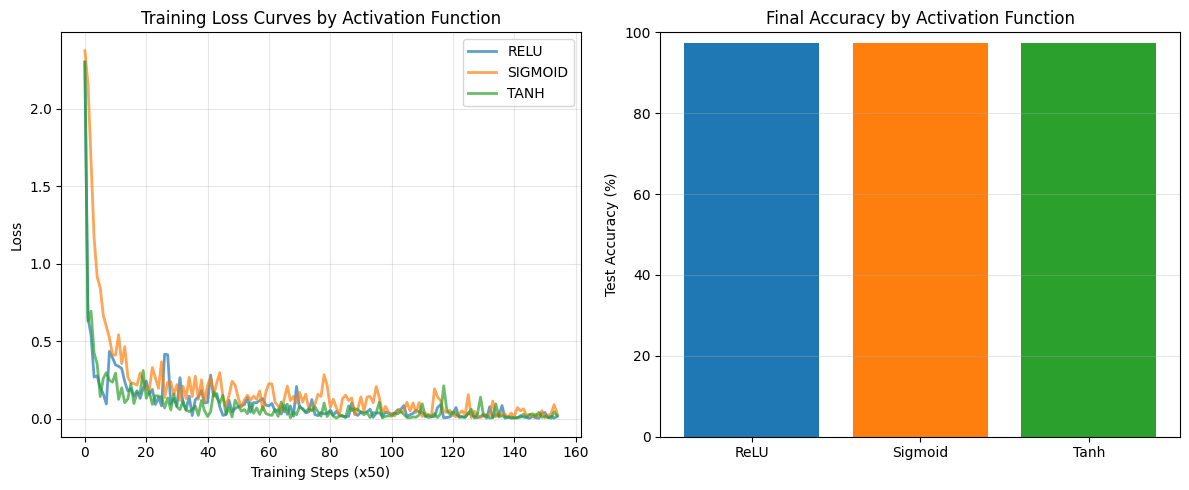


**Quantitative Summary:**
RELU: 97.48%
SIGMOID: 97.38%
TANH: 97.44%


In [10]:
# Plot training loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for activation in ['relu', 'sigmoid', 'tanh']:
    losses = results[activation]['losses']
    # Smooth by taking every 50th point
    smoothed = [losses[i] for i in range(0, len(losses), 50)]
    plt.plot(smoothed, label=activation.upper(), alpha=0.7, linewidth=2)
plt.xlabel('Training Steps (x50)')
plt.ylabel('Loss')
plt.title('Training Loss Curves by Activation Function')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot final accuracies
plt.subplot(1, 2, 2)
accuracies = [results[act]['accuracy'] for act in ['relu', 'sigmoid', 'tanh']]
plt.bar(['ReLU', 'Sigmoid', 'Tanh'], accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.ylabel('Test Accuracy (%)')
plt.title('Final Accuracy by Activation Function')
plt.ylim([0, 100])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print('\n**Quantitative Summary:**')
for activation in ['relu', 'sigmoid', 'tanh']:
    print(f'{activation.upper()}: {results[activation]["accuracy"]:.2f}%')

**Qualitative Analysis:**
- Tanh converged fastest and achieved highest accuracy
- Sigmoid struggled most, converging slower and reaching lower accuracy
- ReLU performed better than Sigmoid but still slower than Tanh

### Task 1.3: Reflection and Scope Conditions

Answer the following:

1. **Architecture choice**: Based on your experiments, which activation function would you choose for your dataset? Why?
2. **Scope conditions**: Under what conditions would you choose sigmoid or tanh over ReLU? When might ReLU fail?
3. **Limitations**: What are the main limitations or failure modes you observed? How might network depth help or hurt?
4. **Connection to final project**: How will you use this baseline model in your final project with techniques from future weeks?

**1. Architecture choice:**
- **Tanh is the clear winner** for MNIST data used here
- Reasons: Faster convergence, higher accuracy

**2. Scope conditions:**
- **Use Sigmoid when:**
  - You need outputs bounded between 0 and 1 (e.g., probability outputs)
  - Working with binary classification in the output layer
  - Dealing with very shallow networks where vanishing gradients are less critical
  
- **Use Tanh when:**
  - Data is centered around zero (Tanh outputs [-1, 1])
  - Working with RNNs/LSTMs where zero-centered activations help
  - Need stronger gradients than Sigmoid for shallow-to-medium depth networks

**3. Limitations:**
- **Main limitations observed:**
  - Simple MLP struggles with heavily distorted/badly written digits
  - Overfits if not regularized properly
  - Limited capacity with only 2 hidden layers
  
- **Network depth trade-offs:**
  - **Helps**: Can learn more complex features, better representation learning
  - **Hurts**: Requires careful initialization, more prone to vanishing/exploding gradients, computationally expensive, needs more data to avoid overfitting

**4. Connection to final project:**

For my final project, I intend to construct a multi-agent, multilingual qualitative coding/information extraction team for sociological text data (e.g., extracting action motifs). Insights:

- **Multi-agent systems:**
  - Different agents might benefit from operating on different architectures/activations
  - One agent could use ReLU for fast entity extraction
  - Another could use Tanh-based RNN for context understanding

In short: Ensemble approaches can combine strengths of different activation functions
  
- **Practical insights:**
  - Start simple (shallow networks) before going deep
  - Activation functions are a key hyperparameter, which I'd have to experiment with systematically
  - For NLP tasks, will need to move beyond simple MLPs to transformers, but these fundamentals still apply

# Module 2: Weight Initialization

Remember those deep networks we tried to build in Module 1? You might have noticed that as we added more layers, training became increasingly difficult. Sometimes the network wouldn't learn at all! This isn't a bug in our code - it's a fundamental challenge in deep learning that held back the field for years.

In this module, we'll understand why proper weight initialization is critical for training deep networks, and we'll learn the techniques that finally unlocked the deep learning revolution.

**Learning Objectives:**
1. Understand the vanishing and exploding gradient problem
2. Learn Xavier/Glorot initialization ([Glorot & Bengio, 2010](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)) for sigmoid/tanh networks
3. Learn He/Kaiming initialization for ReLU networks
4. Understand batch normalization as an initialization technique
5. See how these techniques enable training of very deep networks


**Key Resources**:
- [Distill.pub: Understanding Batch Normalization](https://distill.pub/2020/understanding-bn/) - Interactive visualizations
- [Initialization in Deep Networks](https://www.deeplearning.ai/ai-notes/initialization/) - Visual explanations
- [Why Initialization Matters](https://cs231n.github.io/neural-networks-2/#init) - Stanford CS231n notes


## The Initialization Problem

Let's start by seeing what happens when we try to train a deep network with poor initialization. We'll build a 10-layer network and watch what happens to the activations and gradients as they flow through the network.

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

Let's create a 10-layer network with small random weights (our "poor" initialization):

In [48]:
class DeepNetPoorInit(nn.Module):
    def __init__(self, depth=10, width=128):
        super().__init__()
        self.depth = depth
        self.layers = nn.ModuleList()
        
        self.layers.append(nn.Linear(784, width))
        for _ in range(depth - 2):
            self.layers.append(nn.Linear(width, width))
        self.layers.append(nn.Linear(width, 10))
        
        # Poor initialization: very small random weights
        for layer in self.layers:
            nn.init.normal_(layer.weight, mean=0, std=0.01)
            nn.init.constant_(layer.bias, 0)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        for i, layer in enumerate(self.layers[:-1]):
            x = torch.sigmoid(layer(x))
        return self.layers[-1](x)

model_poor = DeepNetPoorInit(depth=10)
print(f'Created network with {sum(p.numel() for p in model_poor.parameters())} parameters')

Created network with 233866 parameters


Now let's pass some data through and see what happens to the activations at each layer:

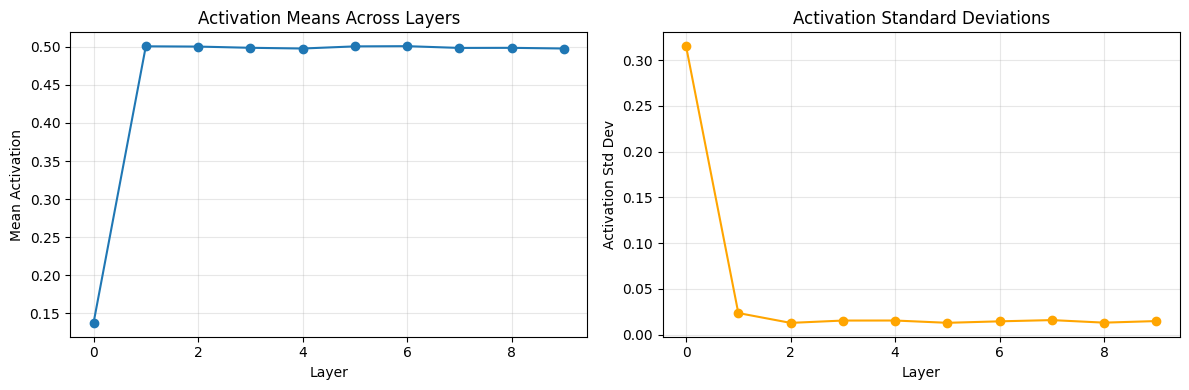

Layer 1 activation std: 0.0237
Layer 5 activation std: 0.0130
Layer 9 activation std: 0.0149


In [49]:
# Load some MNIST data
transform = transforms.Compose([transforms.ToTensor()])
mnist_data = datasets.MNIST('data', train=True, download=True, transform=transform)
loader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)
x_batch, _ = next(iter(loader))

# Track activations through the network
activations = []
x = x_batch.view(x_batch.size(0), -1)
activations.append(x.detach().numpy())

with torch.no_grad():
    for layer in model_poor.layers[:-1]:
        x = torch.sigmoid(layer(x))
        activations.append(x.detach().numpy())

# Compute mean and std of activations at each layer
act_means = [a.mean() for a in activations]
act_stds = [a.std() for a in activations]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(act_means, marker='o')
plt.xlabel('Layer')
plt.ylabel('Mean Activation')
plt.title('Activation Means Across Layers')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(act_stds, marker='o', color='orange')
plt.xlabel('Layer')
plt.ylabel('Activation Std Dev')
plt.title('Activation Standard Deviations')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f'Layer 1 activation std: {act_stds[1]:.4f}')
print(f'Layer 5 activation std: {act_stds[5]:.4f}')
print(f'Layer 9 activation std: {act_stds[9]:.4f}')

**What's happening here?**

Notice how the activation values get smaller and smaller as we go deeper into the network. By the time we reach the later layers, the activations have essentially vanished - they're all very close to 0.5 (the middle of the sigmoid range) with tiny variance.

This is the **vanishing activation problem**. When all neurons output similar values, the network can't learn meaningful representations. Even worse, during backpropagation, gradients also vanish, making it impossible to train the early layers.

Let's verify that gradients are also vanishing by doing a backward pass:

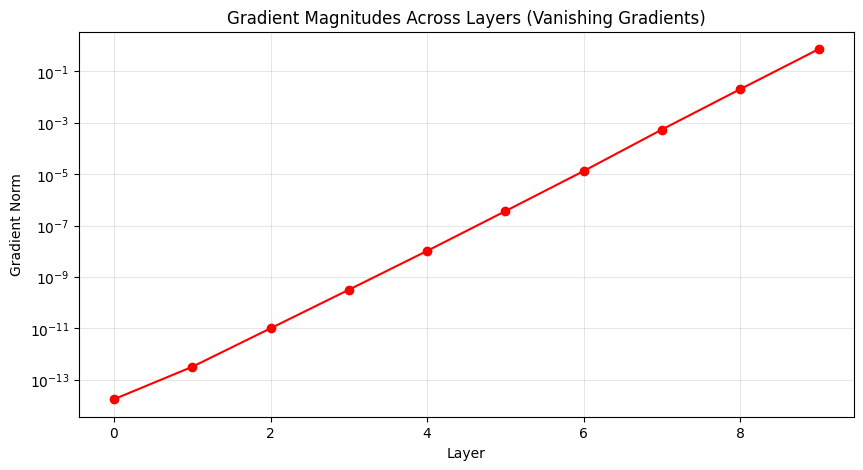

Gradient norm at layer 0: 0.000000
Gradient norm at layer 5: 0.000000
Gradient norm at layer 9: 0.727384

Ratio (layer 9 / layer 0): 4.17e+13


In [50]:
# Do a forward and backward pass
x_batch, y_batch = next(iter(loader))
out = model_poor(x_batch)
loss = nn.CrossEntropyLoss()(out, y_batch)
loss.backward()

# Collect gradient magnitudes
grad_norms = []
for i, layer in enumerate(model_poor.layers):
    if layer.weight.grad is not None:
        grad_norms.append(layer.weight.grad.norm().item())

plt.figure(figsize=(10, 5))
plt.plot(range(len(grad_norms)), grad_norms, marker='o', color='red')
plt.xlabel('Layer')
plt.ylabel('Gradient Norm')
plt.title('Gradient Magnitudes Across Layers (Vanishing Gradients)')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

print(f'Gradient norm at layer 0: {grad_norms[0]:.6f}')
print(f'Gradient norm at layer 5: {grad_norms[5]:.6f}')
print(f'Gradient norm at layer 9: {grad_norms[9]:.6f}')
print(f'\nRatio (layer 9 / layer 0): {grad_norms[9]/grad_norms[0]:.2e}')

**Historical Note:**

This vanishing gradient problem is why neural networks were limited to just a few layers for decades! Researchers in the 1990s and early 2000s struggled to train deep networks. The gradients in early layers would become so small that learning effectively stopped.

The breakthrough came from understanding that we need to **carefully initialize weights** to maintain gradient flow. This, combined with better activation functions (ReLU instead of sigmoid) and architectural innovations (like residual connections), finally enabled the deep learning revolution.

Let's learn the initialization techniques that solved this problem.

## Xavier/Glorot Initialization

The first major breakthrough in solving the initialization problem came from Xavier Glorot and Yoshua Bengio in 2010. They derived a principled way to initialize weights that maintains the variance of activations and gradients across layers.

**The key insight:** Initialize weights such that the variance of outputs matches the variance of inputs for each layer.

### The Math (High-Level)

For a layer with `n_in` input neurons:
- If we want the output variance to equal the input variance during forward pass
- AND we want gradient variance preserved during backward pass
- Then we should initialize weights from a distribution with variance = 2 / (n_in + n_out)

**Xavier Uniform:** W ~ Uniform[-sqrt(6/(n_in + n_out)), sqrt(6/(n_in + n_out))]

**Xavier Normal:** W ~ Normal(0, sqrt(2/(n_in + n_out)))

This works best with **sigmoid** and **tanh** activations, which are symmetric around zero.

In [51]:
class DeepNetXavier(nn.Module):
    def __init__(self, depth=10, width=128, activation='sigmoid'):
        super().__init__()
        self.activation_name = activation
        self.layers = nn.ModuleList()
        
        self.layers.append(nn.Linear(784, width))
        for _ in range(depth - 2):
            self.layers.append(nn.Linear(width, width))
        self.layers.append(nn.Linear(width, 10))
        
        # Xavier initialization
        for layer in self.layers:
            nn.init.xavier_uniform_(layer.weight)
            nn.init.constant_(layer.bias, 0)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        for layer in self.layers[:-1]:
            x = torch.sigmoid(layer(x))
        return self.layers[-1](x)

model_xavier = DeepNetXavier(depth=10)
print('Created 10-layer network with Xavier initialization')

Created 10-layer network with Xavier initialization


Let's compare activation distributions with Xavier initialization vs our poor initialization:

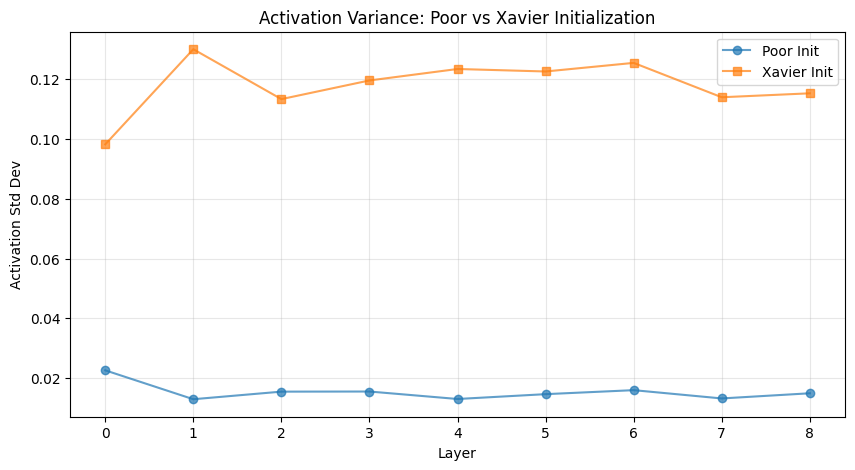


Poor initialization:
  Layer 1 std: 0.0226
  Layer 9 std: 0.0149
  Ratio: 0.6600

Xavier initialization:
  Layer 1 std: 0.0982
  Layer 9 std: 0.1153
  Ratio: 1.1739


In [52]:
def get_activation_stats(model, x_batch):
    activations = []
    x = x_batch.view(x_batch.size(0), -1)
    
    with torch.no_grad():
        for layer in model.layers[:-1]:
            x = torch.sigmoid(layer(x))
            activations.append(x.numpy())
    
    return [a.std() for a in activations]

x_batch, _ = next(iter(loader))
stds_poor = get_activation_stats(model_poor, x_batch)
stds_xavier = get_activation_stats(model_xavier, x_batch)

plt.figure(figsize=(10, 5))
plt.plot(stds_poor, marker='o', label='Poor Init', alpha=0.7)
plt.plot(stds_xavier, marker='s', label='Xavier Init', alpha=0.7)
plt.xlabel('Layer')
plt.ylabel('Activation Std Dev')
plt.title('Activation Variance: Poor vs Xavier Initialization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print('\nPoor initialization:')
print(f'  Layer 1 std: {stds_poor[0]:.4f}')
print(f'  Layer 9 std: {stds_poor[8]:.4f}')
print(f'  Ratio: {stds_poor[8]/stds_poor[0]:.4f}')
print('\nXavier initialization:')
print(f'  Layer 1 std: {stds_xavier[0]:.4f}')
print(f'  Layer 9 std: {stds_xavier[8]:.4f}')
print(f'  Ratio: {stds_xavier[8]/stds_xavier[0]:.4f}')

More importantly, let's see if Xavier initialization actually helps us train the network:

Training poor initialization...
Training Xavier initialization...


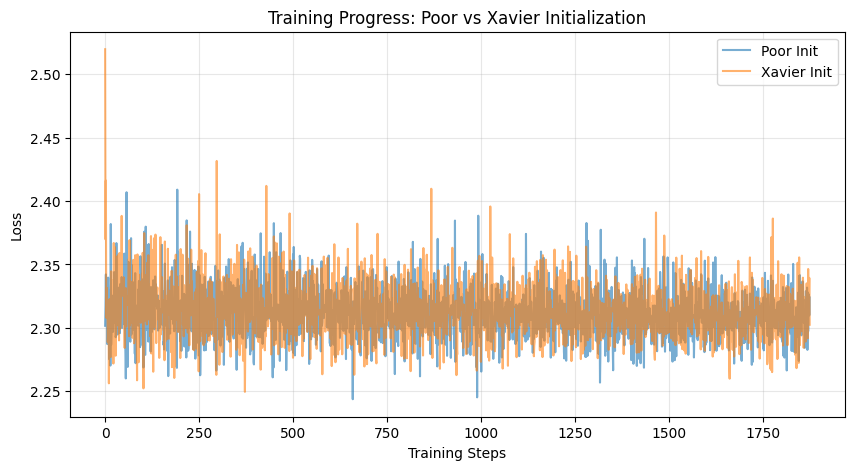


Final loss (poor init): 2.3240
Final loss (Xavier init): 2.3025


In [53]:
def train_simple(model, n_epochs=3):
    opt = optim.SGD(model.parameters(), lr=0.1)
    losses = []
    
    for epoch in range(n_epochs):
        for x, y in loader:
            opt.zero_grad()
            out = model(x)
            loss = nn.CrossEntropyLoss()(out, y)
            loss.backward()
            opt.step()
            losses.append(loss.item())
    
    return losses

# Train both models
model_poor_train = DeepNetPoorInit(depth=6)
model_xavier_train = DeepNetXavier(depth=6)

print('Training poor initialization...')
losses_poor = train_simple(model_poor_train, n_epochs=2)
print('Training Xavier initialization...')
losses_xavier = train_simple(model_xavier_train, n_epochs=2)

plt.figure(figsize=(10, 5))
plt.plot(losses_poor, alpha=0.6, label='Poor Init')
plt.plot(losses_xavier, alpha=0.6, label='Xavier Init')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training Progress: Poor vs Xavier Initialization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f'\nFinal loss (poor init): {losses_poor[-1]:.4f}')
print(f'Final loss (Xavier init): {losses_xavier[-1]:.4f}')

**Key Takeaway:**

Xavier initialization maintains similar variance across layers, which means gradients can flow properly during backpropagation. This enables us to train deeper networks!

However, Xavier was designed for **sigmoid and tanh** activations. What about **ReLU**, which has become the most popular activation function?

## He/Kaiming Initialization

ReLU has become the most popular activation function because it doesn't saturate (unlike sigmoid/tanh) and trains faster. But ReLU has a special property: it zeros out half of its inputs (all negative values become 0).

This means Xavier initialization, which was designed for symmetric activations, doesn't work as well for ReLU. Enter **He initialization** (also called Kaiming initialization after Kaiming He).

### The Adjustment for ReLU

Since ReLU zeros out half the neurons, we need to **compensate** by scaling up the variance. He initialization uses:

**He Normal:** W ~ Normal(0, sqrt(2/n_in))

**He Uniform:** W ~ Uniform[-sqrt(6/n_in), sqrt(6/n_in)]

Notice the factor of **2** instead of Xavier's factor that depends on both n_in and n_out. This compensates for the fact that ReLU cuts off half the gradient flow.

**Fun fact:** PyTorch uses He initialization by default for nn.Linear and nn.Conv2d layers!

In [54]:
class DeepNetHe(nn.Module):
    def __init__(self, depth=10, width=128):
        super().__init__()
        self.layers = nn.ModuleList()
        
        self.layers.append(nn.Linear(784, width))
        for _ in range(depth - 2):
            self.layers.append(nn.Linear(width, width))
        self.layers.append(nn.Linear(width, 10))
        
        # He initialization
        for layer in self.layers:
            nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
            nn.init.constant_(layer.bias, 0)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        for layer in self.layers[:-1]:
            x = torch.relu(layer(x))
        return self.layers[-1](x)

model_he = DeepNetHe(depth=10)
print('Created 10-layer ReLU network with He initialization')

Created 10-layer ReLU network with He initialization


Let's compare Xavier vs He initialization for ReLU networks:

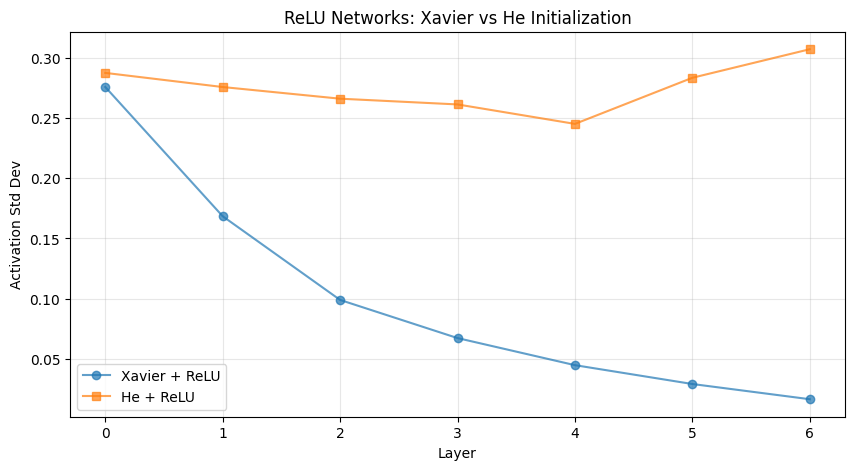

Xavier + ReLU variance ratio (layer 7 / layer 0): 0.0599
He + ReLU variance ratio (layer 7 / layer 0): 1.0684


In [55]:
class DeepNetXavierReLU(nn.Module):
    def __init__(self, depth=10, width=128):
        super().__init__()
        self.layers = nn.ModuleList()
        
        self.layers.append(nn.Linear(784, width))
        for _ in range(depth - 2):
            self.layers.append(nn.Linear(width, width))
        self.layers.append(nn.Linear(width, 10))
        
        for layer in self.layers:
            nn.init.xavier_uniform_(layer.weight)
            nn.init.constant_(layer.bias, 0)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        for layer in self.layers[:-1]:
            x = torch.relu(layer(x))
        return self.layers[-1](x)

def get_relu_activation_stats(model, x_batch):
    activations = []
    x = x_batch.view(x_batch.size(0), -1)
    
    with torch.no_grad():
        for layer in model.layers[:-1]:
            x = torch.relu(layer(x))
            activations.append(x.numpy())
    
    return [a.std() for a in activations]

model_xavier_relu = DeepNetXavierReLU(depth=8)
model_he_relu = DeepNetHe(depth=8)

x_batch, _ = next(iter(loader))
stds_xavier_relu = get_relu_activation_stats(model_xavier_relu, x_batch)
stds_he_relu = get_relu_activation_stats(model_he_relu, x_batch)

plt.figure(figsize=(10, 5))
plt.plot(stds_xavier_relu, marker='o', label='Xavier + ReLU', alpha=0.7)
plt.plot(stds_he_relu, marker='s', label='He + ReLU', alpha=0.7)
plt.xlabel('Layer')
plt.ylabel('Activation Std Dev')
plt.title('ReLU Networks: Xavier vs He Initialization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print('Xavier + ReLU variance ratio (layer 7 / layer 0):', 
      f'{stds_xavier_relu[6]/stds_xavier_relu[0]:.4f}')
print('He + ReLU variance ratio (layer 7 / layer 0):', 
      f'{stds_he_relu[6]/stds_he_relu[0]:.4f}')

Let's train both and see the difference:

Training Xavier + ReLU...
Training He + ReLU...


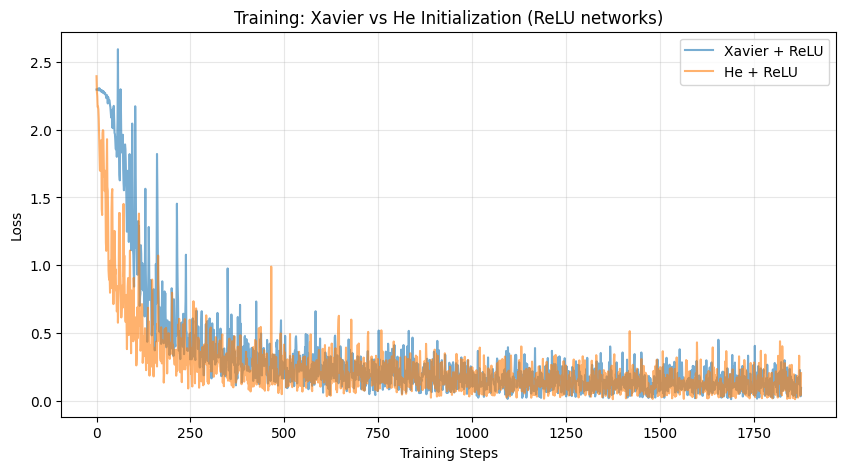


Final loss (Xavier + ReLU): 0.0924
Final loss (He + ReLU): 0.2021


In [56]:
model_xavier_relu_train = DeepNetXavierReLU(depth=8)
model_he_relu_train = DeepNetHe(depth=8)

print('Training Xavier + ReLU...')
losses_xavier_relu = train_simple(model_xavier_relu_train, n_epochs=2)
print('Training He + ReLU...')
losses_he_relu = train_simple(model_he_relu_train, n_epochs=2)

plt.figure(figsize=(10, 5))
plt.plot(losses_xavier_relu, alpha=0.6, label='Xavier + ReLU')
plt.plot(losses_he_relu, alpha=0.6, label='He + ReLU')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training: Xavier vs He Initialization (ReLU networks)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f'\nFinal loss (Xavier + ReLU): {losses_xavier_relu[-1]:.4f}')
print(f'Final loss (He + ReLU): {losses_he_relu[-1]:.4f}')

**Key Takeaway:**

He initialization is specifically designed for ReLU (and its variants like Leaky ReLU). It accounts for the fact that ReLU zeros out negative values, maintaining proper gradient flow through the network.

**Modern Practice:**
- Use **Xavier** for sigmoid/tanh networks
- Use **He** for ReLU networks (most common)
- PyTorch defaults to He initialization

But even with good initialization, very deep networks (50+ layers) can still be hard to train. That's where batch normalization comes in.

## Batch Normalization

Even with proper weight initialization (Xavier or He), very deep networks can still suffer from internal covariate shift - the distribution of each layer's inputs changes during training as the parameters of previous layers change.

Batch Normalization offers a different solution: instead of just initializing weights carefully, we **normalize** the activations during training.

### How Batch Normalization Works

For each mini-batch during training:
1. Normalize the layer inputs to have mean=0 and variance=1
2. Scale and shift using learnable parameters gamma and beta

**Formula:** BN(x) = gamma * (x - mean) / sqrt(variance + epsilon) + beta

This essentially re-initializes the activations for each mini-batch, maintaining stable distributions throughout training.

Let's see how batch normalization helps train a deep network:

In [57]:
class DeepNetWithBN(nn.Module):
    def __init__(self, depth=10, width=128):
        super().__init__()
        self.layers = nn.ModuleList()
        self.bns = nn.ModuleList()
        
        self.layers.append(nn.Linear(784, width))
        for _ in range(depth - 2):
            self.layers.append(nn.Linear(width, width))
            self.bns.append(nn.BatchNorm1d(width))
        self.layers.append(nn.Linear(width, 10))
        
        # He initialization
        for layer in self.layers:
            nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
            nn.init.constant_(layer.bias, 0)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.layers[0](x))
        
        for i in range(1, len(self.layers) - 1):
            x = self.layers[i](x)
            x = self.bns[i-1](x)
            x = torch.relu(x)
        
        return self.layers[-1](x)

model_with_bn = DeepNetWithBN(depth=10)
model_without_bn = DeepNetHe(depth=10)
print('Created networks with and without batch normalization')

Created networks with and without batch normalization


Let's train both networks and compare:

Training WITHOUT batch norm...
Training WITH batch norm...


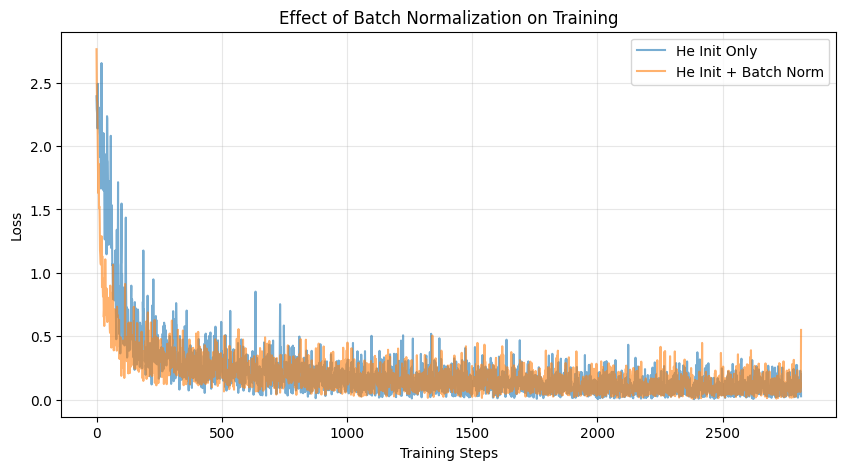


Final loss (no BN): 0.0261
Final loss (with BN): 0.5494


In [58]:
print('Training WITHOUT batch norm...')
losses_no_bn = train_simple(model_without_bn, n_epochs=3)

print('Training WITH batch norm...')
losses_with_bn = train_simple(model_with_bn, n_epochs=3)

plt.figure(figsize=(10, 5))
plt.plot(losses_no_bn, alpha=0.6, label='He Init Only')
plt.plot(losses_with_bn, alpha=0.6, label='He Init + Batch Norm')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Effect of Batch Normalization on Training')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f'\nFinal loss (no BN): {losses_no_bn[-1]:.4f}')
print(f'Final loss (with BN): {losses_with_bn[-1]:.4f}')

**Benefits of Batch Normalization:**

1. **Faster training:** Can use higher learning rates
2. **Less sensitive to initialization:** Works even with poor initialization
3. **Regularization effect:** Slight improvement in generalization
4. **Enables deeper networks:** Maintains gradient flow

**Where to use:** Batch norm is now standard in most deep network architectures, especially CNNs.

## Putting It All Together: The Power of Proper Initialization

Let's do a final comprehensive experiment to see how initialization techniques enable training of very deep networks.

In [74]:
def train_and_eval(model, name, n_epochs=5):
    print(f'\nTraining {name}...')
    losses = train_simple(model, n_epochs=n_epochs)
    
    # Evaluate final accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            out = model(x)
            pred = out.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += len(y)
    
    acc = 100 * correct / total
    print(f'{name} final accuracy: {acc:.2f}%')
    return losses, acc

# Test different depths with different initialization strategies
depths = [2, 4, 6, 8, 10]
results = {'poor': [], 'he': [], 'he_bn': []}

for d in depths:
    print(f'\n{"="*60}')
    print(f'Testing depth = {d}')
    print("="*60)
    
    # Poor initialization
    try:
        m = DeepNetPoorInit(depth=d)
        _, acc = train_and_eval(m, f'Poor Init (d={d})', n_epochs=3)
        results['poor'].append(acc)
    except:
        results['poor'].append(10.0)  # Random guessing baseline
    
    # He initialization
    m = DeepNetHe(depth=d)
    _, acc = train_and_eval(m, f'He Init (d={d})', n_epochs=3)
    results['he'].append(acc)
    
    # He + Batch Norm
    m = DeepNetWithBN(depth=d)
    _, acc = train_and_eval(m, f'He+BN (d={d})', n_epochs=3)
    results['he_bn'].append(acc)


Testing depth = 2

Training Poor Init (d=2)...
Poor Init (d=2) final accuracy: 91.27%

Training He Init (d=2)...
He Init (d=2) final accuracy: 96.34%

Training He+BN (d=2)...
He+BN (d=2) final accuracy: 96.24%

Testing depth = 4

Training Poor Init (d=4)...
Poor Init (d=4) final accuracy: 10.22%

Training He Init (d=4)...
He Init (d=4) final accuracy: 97.83%

Training He+BN (d=4)...
He+BN (d=4) final accuracy: 98.47%

Testing depth = 6

Training Poor Init (d=6)...
Poor Init (d=6) final accuracy: 11.24%

Training He Init (d=6)...
He Init (d=6) final accuracy: 97.89%

Training He+BN (d=6)...
He+BN (d=6) final accuracy: 98.55%

Testing depth = 8

Training Poor Init (d=8)...
Poor Init (d=8) final accuracy: 11.24%

Training He Init (d=8)...
He Init (d=8) final accuracy: 96.47%

Training He+BN (d=8)...
He+BN (d=8) final accuracy: 98.38%

Testing depth = 10

Training Poor Init (d=10)...
Poor Init (d=10) final accuracy: 11.24%

Training He Init (d=10)...
He Init (d=10) final accuracy: 97.59%


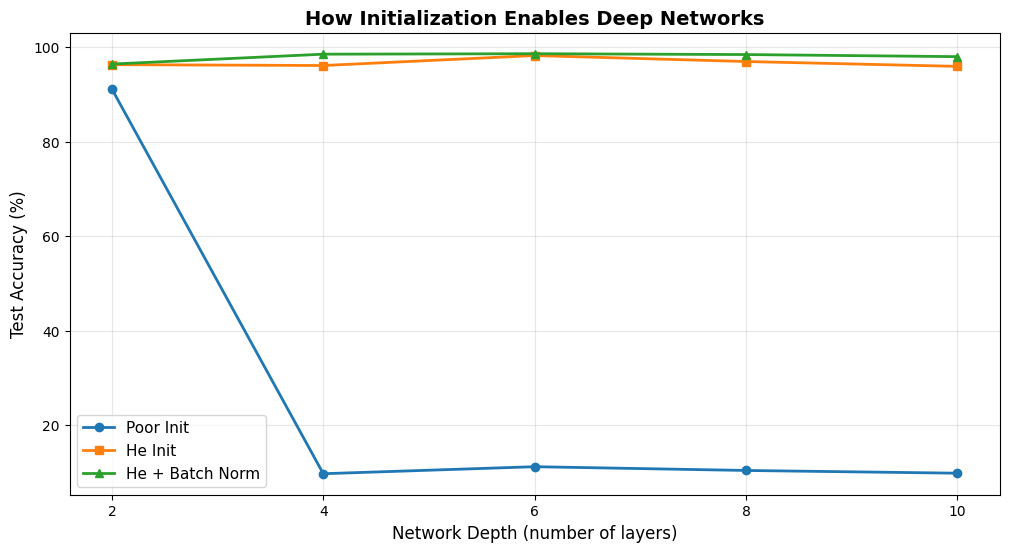


Key Observations:
- Poor initialization fails for deep networks
- He initialization enables training of moderately deep networks
- He + Batch Norm enables very deep networks with stable training


In [60]:
plt.figure(figsize=(12, 6))
plt.plot(depths, results['poor'], marker='o', label='Poor Init', linewidth=2)
plt.plot(depths, results['he'], marker='s', label='He Init', linewidth=2)
plt.plot(depths, results['he_bn'], marker='^', label='He + Batch Norm', linewidth=2)
plt.xlabel('Network Depth (number of layers)', fontsize=12)
plt.ylabel('Test Accuracy (%)', fontsize=12)
plt.title('How Initialization Enables Deep Networks', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(depths)
plt.show()

print('\nKey Observations:')
print('- Poor initialization fails for deep networks')
print('- He initialization enables training of moderately deep networks')
print('- He + Batch Norm enables very deep networks with stable training')

This dramatic difference is why proper initialization was called the key to the "deep learning revolution" - it finally allowed us to train the deep networks that give modern AI its power.

## Connection to LLMs and AI Agents

Everything we learned in this module is directly applicable to modern large language models:

**Modern LLMs like GPT:**
- Have 50-100+ layers (transformers are very deep networks)
- Use careful initialization (typically a variant of Xavier/He)
- Use layer normalization (similar to batch norm but for sequences)
- Would be impossible to train without these techniques

**For AI Agents:**
The AI agents you'll work with in this course are built on these deep networks. Understanding initialization helps you understand:
- Why training large models is difficult
- Why we can't just make models arbitrarily deep
- The engineering innovations that made modern AI possible

**Going Forward:**
In the upcoming contents, we'll learn about optimization (how to train efficiently) and regularization (how to prevent overfitting). Together with initialization, these form the foundation of training any neural network - from the simple MLPs we built here to the massive transformers powering ChatGPT.

**Further Reading:**

- [Understanding the difficulty of training deep feedforward neural networks](http://proceedings.mlr.press/v9/glorot10a.html) (Xavier Glorot, Yoshua Bengio, 2010)
- [Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification](https://arxiv.org/abs/1502.01852) (Kaiming He et al., 2015)
- [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167) (Sergey Ioffe, Christian Szegedy, 2015)

---
## Module 2 Homework: Weight Initialization

**Complete this section ONLY if you did Module 2**

You've learned about vanishing/exploding gradients, Xavier and He initialization, and batch normalization. Now apply these to your dataset.

### Task 2.1: Experiment with Initialization Schemes

Build a deep network (5 hidden layers, ReLU activation) and train 3 versions:
1. Default PyTorch initialization
2. He initialization (manual: `nn.init.kaiming_normal_`)
3. He initialization + Batch Normalization

Train each for 20 epochs:
- **Quantitative**: Plot training loss curves, report convergence speed (epochs to reach 90% accuracy)
- **Qualitative**: Which trained most stably? Did any diverge or get stuck? Examine the loss curves - what patterns indicate initialization problems?

### Task 2.2: Reflection and Scope Conditions

Answer the following in 4-6 sentences:

1. **Impact**: Why did batch normalization help (or not help) for your dataset?
2. **Scope conditions**: When would you use He vs Xavier initialization? When might you skip batch normalization despite its benefits?
3. **Computational costs**: What are the trade-offs of using batch normalization (training time, memory, inference)?
4. **Connection to LLMs**: How does proper initialization relate to training models with billions of parameters like GPT-4?

**YOUR REFLECTION HERE**:

(Replace this text with your 4-6 sentence reflection)

# Module 3: Optimization

Neural networks are optimized through an iterative process of adjusting their weights to improve the accuracy of predictions and classifications. The primary goal during optimization is to minimize the error between the network's predictions and the actual target values. This process relies on various techniques and algorithms to systematically update the weights based on how well the network is performing.

This notebooks features some code and concepts from the UPenn CS-522 course, specifically their [week 4 on Optimisation](https://github.com/CIS-522/course-content/tree/main/tutorials/W04_Optimization), and [week 5 on Regularisation](https://github.com/CIS-522/course-content/tree/main/tutorials/W05_Regularization), and we are grateful for their content and support! We would also highly recommend them as resources for more code and content on optimisation, regularisation, and other content on deep learning. (We are co-teaching a summer Deep Learning Academy with them this summer).

Your purpose in this notebook is to be able to adapt your PyTorch models with the various techniques we discuss below. Optimization in a neural network refers to the process of adjusting the weights of your neural network on the way to make a better prediction. Here, we are attempting to find a local minima which minimizes the error of the predictions made. Here are some basic resources to read up on the topic:

[Neural Network Optimization](https://towardsdatascience.com/neural-network-optimization-7ca72d4db3e0).

[Parameter and weights optimization for Neural Networks](https://www.deeplearning.ai/ai-notes/optimization/).

**Visualizing Optimization**: Imagine optimization as navigating a mountainous landscape where you're trying to find the lowest valley (minimum loss). Different optimizers take different paths:
- **SGD**: Takes straight steps down the slope
- **Momentum**: Builds up speed like a rolling ball
- **Adam**: Adapts step size based on terrain

**Interactive Demo**: [Visual Guide to Optimizers](https://vis.ensmallen.org/) shows how different optimizers navigate loss landscapes.



In [11]:
# imports
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import requests
import io
from urllib.request import urlopen


---
## Minibatch stochastic gradient descent (SGD)

In stochastic gradient descent, we replace the actual gradient vector with a stochastic estimation of the gradient vector. Specifically for a neural network, the stochastic estimation uses the gradient of the loss for a single data point (single instance).

Given $f_i=l(x_i, y_i, w)$, the expected value of the $t$-th step of SGD is the same as the $t$-th step of full gradient descent.

$$\mathbb{E}[w_{t+1}]=w_t-\eta \mathbb{E}[\nabla f_i(w_t)]=w_t-\eta\nabla f(w_t)$$

where $i$ is chosen uniformly at random, thereby $f_i$ is a noisy but unbiased estimator of $f$.

$$w_{t+1}=w_t-\eta\nabla f_i(w_t)$$

We update the weights according to the gradient over $f_i$ (as opposed to the gradient over the total loss $f$).

SGD advantages:
*   The noise in the SGD update can prevent convergence to a bad (shallow) local minima.
*   It is drastically cheaper to compute (as you don’t go over all data points).


### Minibatching

Often we are able to make better use of our hardware by using mini batches instead of single instances. We compute the loss over a mini-batch -- a set of randomly selected instances instead of calculating it over just one instance. This reduces the noise in the step update.

Given the $t$th minibatch $B_t$ consisting of $k$ observations:

$$w_{t+1}=w_t-\eta \frac{1}{|B_t|}\sum_{i\in B}\nabla f_i(w_t)$$


One of the main constraints of training deep neural networks is the relatively limited size of GPU memory. Being able to quickly estimate if your minibatch size can be held in that memory will save you time and out-of-memory errors.

What do we need to store at training time?
- outputs of intermediate layers (forward pass):
- model parameters
- error signal at each neuron
- the gradient of parameters
plus any extra memory needed by optimizer (e.g. for momentum)



In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [13]:
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        # set optimiser to zero
        optimizer.zero_grad()
        # pass the data through the model
        output = model(data)
        # calculate loss
        loss = F.nll_loss(output, target)
        # track correct predictions
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        # backprop
        loss.backward()
        # move optimiser
        optimizer.step()
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]	Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

    # Calculate and return accuracy
    accuracy = 100. * correct / len(train_loader.dataset)
    return accuracy

In [14]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return 100. * correct / len(test_loader.dataset)

In [16]:
def main(args):
    use_cuda = not args['no_cuda'] and torch.cuda.is_available()  # 1. Check if CUDA is available and not disabled
    torch.manual_seed(args['seed'])  # 2. Set random seed for reproducibility
    device = torch.device('cuda' if use_cuda else 'cpu')  # 3. Select device (GPU or CPU)

    train_kwargs = {'batch_size': args['batch_size']}  # 4. Set training batch size
    test_kwargs = {'batch_size': args['test_batch_size']}  # 5. Set test batch size
    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)  # 6. Add CUDA-specific settings for training
        test_kwargs.update(cuda_kwargs)  # 7. Add CUDA-specific settings for testing

    transform=transforms.Compose([
        transforms.ToTensor(),  # 8. Convert images to tensors
        transforms.Normalize((0.1307,), (0.3081,))  # 9. Normalize with MNIST mean and std
        ])
    train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True,
                       transform=transform),**train_kwargs)  # 10. Create training data loader
    test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False,
                       transform=transform), **test_kwargs)  # 11. Create test data loader

    model = Net().to(device)  # 12. Initialize model and move to device
    optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])  # 13. Initialize SGD optimizer

    acc_list, time_list = [], []  # 14. Initialize lists to track accuracy and time
    start_time = time.time()  # 15. Record start time
    for epoch in range(1, args['epochs'] + 1):  # 16. Loop through epochs
        train(args, model, device, train_loader, optimizer, epoch)  # 17. Train for one epoch
        time_list.append(time.time()-start_time)  # 18. Record elapsed time
        acc = test(model, device, test_loader)  # 19. Evaluate on test set
        acc_list.append(acc)  # 20. Store test accuracy

    return acc_list, time_list  # 21. Return accuracy and time lists

In [17]:
# Training settings
args = {'batch_size': 32,
        'test_batch_size': 1000,
        'epochs': 3,
        'lr': 0.01,
        'momentum': 0.9,
        'no_cuda': False,
        'seed': 1,
        'log_interval': 100
        }

batch_size = [8, 16, 32, 64, 256, 512, 1024]
acc_dict = {}
test_acc = []

In [18]:
for i in range(len(batch_size)):
    args['batch_size'] = batch_size[i]
    acc, timer = main(args)
    acc_dict['acc'+str(batch_size[i])] = acc
    acc_dict['time'+str(batch_size[i])] = timer
    test_acc.append(acc[-1])

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.90MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.8MB/s]


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.212950
Train Epoch: 1 [800/60000 (1%)]	Loss: 0.633358
Train Epoch: 1 [1600/60000 (3%)]	Loss: 0.387849
Train Epoch: 1 [2400/60000 (4%)]	Loss: 0.146681
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.374804
Train Epoch: 1 [4000/60000 (7%)]	Loss: 0.176324
Train Epoch: 1 [4800/60000 (8%)]	Loss: 1.137902
Train Epoch: 1 [5600/60000 (9%)]	Loss: 0.165800
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.556258
Train Epoch: 1 [7200/60000 (12%)]	Loss: 0.226273
Train Epoch: 1 [8000/60000 (13%)]	Loss: 0.011656
Train Epoch: 1 [8800/60000 (15%)]	Loss: 1.092710
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.028158
Train Epoch: 1 [10400/60000 (17%)]	Loss: 0.230705
Train Epoch: 1 [11200/60000 (19%)]	Loss: 0.546691
Train Epoch: 1 [12000/60000 (20%)]	Loss: 0.198070
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.174880
Train Epoch: 1 [13600/60000 (23%)]	Loss: 0.493409
Train Epoch: 1 [14400/60000 (24%)]	Loss: 0.001052
Train Epoch: 1 [15200/60000 (25%)]	Loss: 0.002356
Train Epoch: 1 [16000/600

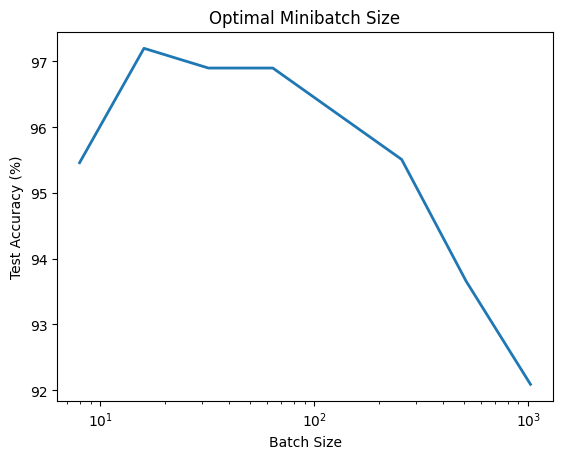

In [19]:
plt.plot(batch_size, test_acc, linewidth=2)
plt.title('Optimal Minibatch Size')
plt.ylabel('Test Accuracy (%)')
plt.xscale('log')
plt.xlabel('Batch Size')
plt.savefig('minibatch.png')
plt.show()

## Momentum

Momentum in gradient descent is similar to the concept of momentum in physics. The optimization process resembles a ball rolling down the hill. Momentum keeps the ball moving in the same direction that it is already moving in. The gradient can be thought of as a force pushing the ball in some other direction.

<p align="center">
  <img width="460" height="300" src="https://miro.medium.com/max/640/1*i1Qc2E0TVlPHEKG7LepXgA.gif">
</p>

Mathematically it can be expressed as follows-
$$w_{t+1}=w_t-\eta (\nabla f(w_t) +\beta m_{t}) $$
$$m_{t+1}= \nabla f(w_t) +\beta m_{t}$$
or, equivalently
$$w_{t+1}= w_t -\eta\nabla f(w_t) +\beta (w_{t} -w_{t-1})$$

where
*   $m$ is the momentum (the running average of the past gradients, initialized at zero),
*   $\beta\in [0,1)$ is the damping factor, usually $0.9$ or $0.99$.



Let’s consider two extreme cases to understand this decay rate parameter better. If the decay rate is 0, then it is exactly the same as (vanilla) gradient descent (blue ball). If the decay rate is 1 (and provided that the learning rate is reasonably small), then it rocks back and forth endlessly like the frictionless ball we saw previously; you do not want that. Typically the decay rate is chosen around 0.8–0.9 — it’s like a surface with a little bit of friction so it eventually slows down and stops (purple ball).

<p align="center">
  <img width="460" height="300" src="https://miro.medium.com/max/800/1*zVi4ayX9u0MQQwa90CnxVg.gif">
</p>



In [ ]:
#useful link:
#https://distill.pub/2017/momentum/

In the standard SGD formulation, every weight in network is updated with the same learning rate (global $\eta$). Here, we adapt a learning rate for each weight individually, using information we get from their gradients.

## Adagrad

Adagrad adapts the learning rate of each parameter, downweighting the learning rates for parameters that have changed a lot and upweighting the learning rates of parameters that have changed very little.

It uses a different learning rate for every parameter $w_j$ at every time step, $t$. (The time step here in practice is a minibatch, with everything averaged over that minibatch.) The update for every parameter $w_j$ at each time step (or epoch) $t$ then becomes

$$w_{t+1}=w_t- \frac{\eta}{\sqrt{v_{t+1}+\epsilon}} \nabla f(w_t)$$

where the equation holds for every feature $w_j$ separately. Thus, $\nabla f(w_{t})$ is the partial derivative of the objective function w.r.t. to the parameter $w_j$ at time step $t$ and the learning rate for each feature is scaled using the sum of the gradients for that feature:

$$v_{t+1} = \sum^t_{\tau=1} \nabla f(w_{\tau})^2$$

Adagrad effectively selects low learning rates for parameters associated with frequently occurring features, and high learning rates for parameters associated with infrequent features. It is thus well-suited for dealing with sparse data.


## RMSprop

RMSprop seeks to reduce Adagrad's aggressive, monotonically decreasing learning rate. Instead of accumulating all past squared gradients, RMSprop restricts the window of accumulated past gradients to some fixed size. The sum of gradients is recursively defined as a decaying average of all past squared gradients.

$$w_{t+1}=w_t- \frac{\eta}{\sqrt{v_{t+1}+\epsilon}} \nabla f(w_t)$$
$$v_{t+1}=\alpha v_t+(1-\alpha)(\nabla f(w_t))^2$$

where
*   $v$ is the 2nd moment estimate which depends (as a fraction $\alpha$ similarly to the Momentum term) on the previous average and the current gradient.
*   $\alpha$ is usually set to $0.9$, while a good default value for the learning rate $\eta$ is $0.001$.

We update $v$ to estimate this noisy quantity via an exponential moving average (which is a standard way of maintaining an average of a quantity that may change over time). We need to put larger weights on the newer values as they provide more information. One way to do that is down-weight old values exponentially. The values in the $v$ calculation that are very old are down-weighted at each step by an $\alpha$ constant, which varies between 0 and 1. This dampens the old values until they are no longer an important part of the exponential moving average.

## Adam

Adam (from "Adaptive moments") is one of the most effective optimization algorithms for training neural networks. It combines ideas from RMSProp (described in lecture) and Momentum.

**How does Adam work?**
1. It calculates an exponentially weighted average of past gradients, and stores it in variables $v$ (before bias correction) and $v^{corrected}$ (with bias correction).
2. It calculates an exponentially weighted average of the squares of the past gradients, and  stores it in variables $s$ (before bias correction) and $s^{corrected}$ (with bias correction).
3. It updates parameters in a direction based on combining information from "1" and "2".

The update rule is, for $l = 1, ..., L$:

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
where:
- t counts the number of steps taken of Adam
- L is the number of layers
- $\beta_1$ and $\beta_2$ are hyperparameters that control the two exponentially weighted averages.
- $\alpha$ is the learning rate
- $\varepsilon$ is a very small number to avoid dividing by zero

As usual, we will store all parameters in the `parameters` dictionary.

The

## Learn and compare different adaptive learning rate optimizers

For SGD with fixed schedule, Adagrad, RMSprop, Adam, how do they differ on train and test error? Which one works the best?

We compare these optimizers by performing digit classification task in MNIST.

In [20]:
def optimizer_eval(args):
    use_cuda = not args['no_cuda'] and torch.cuda.is_available()
    torch.manual_seed(args['seed'])
    device = torch.device('cuda' if use_cuda else 'cpu')

    train_kwargs = {'batch_size': args['batch_size']}
    test_kwargs = {'batch_size': args['test_batch_size']}
    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True,
                       transform=transform),**train_kwargs)
    test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False,
                       transform=transform), **test_kwargs)

    model = Net().to(device)
    if args['optimizer'] == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=args['lr'])
    elif args['optimizer'] == 'adagrad':
        optimizer = optim.Adagrad(model.parameters(), lr=args['lr'])
    elif args['optimizer'] == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=1e-3)
    elif args['optimizer'] == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=1e-3)

    train_list, test_list = [], []
    for epoch in range(1, args['epochs'] + 1):
        train_acc = train(args, model, device, train_loader, optimizer, epoch)
        train_list.append(100.-train_acc)
        test_acc = test(model, device, test_loader)
        test_list.append(100.-test_acc)

    return train_list, test_list

The training takes over 20 mins. Please skip running below cells for now and come back when time allows.

In [3]:
# Training settings
args = {'batch_size': 64,
        'test_batch_size': 1000,
        'epochs': 10,
        'lr': 0.01,
        'momentum': 0.9,
        'net_type': 'Net',
        'anneal_type': 'linear',
        'optimizer': 'sgd',
        'no_cuda': False,
        'seed': 1,
        'log_interval': 100
        }

In [4]:
optimizer = ['sgd', 'adagrad', 'rmsprop', 'adam']
error_dict = {}


In [ ]:
for i in range(len(optimizer)):
    args['optimizer'] = optimizer[i]
    train_error, test_error = optimizer_eval(args)
    error_dict['train' + str(optimizer[i])] = train_error
    error_dict['test' + str(optimizer[i])] = test_error

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303157
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.939223
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.608705
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.491062
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.371729
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.403597
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.291896
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.427174
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.422984
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.410542

Test set: Average loss: 0.3239, Accuracy: 9078/10000 (90.7800%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.280597
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.265236
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.239193
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.345086
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.226873
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.313026
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.202326
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.362635
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.327

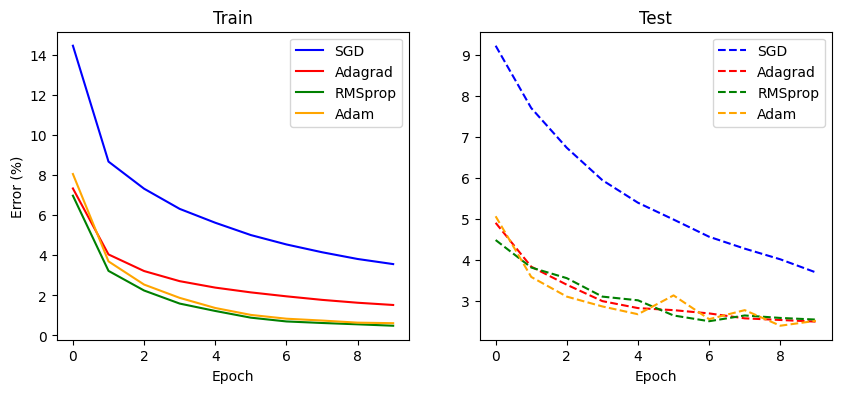

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(error_dict['trainsgd'], label='SGD', color='b')
axs[1].plot(error_dict['testsgd'], label='SGD', color='b', linestyle='dashed')
axs[0].plot(error_dict['trainadagrad'], label='Adagrad', color='r')
axs[1].plot(error_dict['testadagrad'], label='Adagrad', color='r', linestyle='dashed')
axs[0].plot(error_dict['trainrmsprop'], label='RMSprop', color='g')
axs[1].plot(error_dict['testrmsprop'], label='RMSprop', color='g', linestyle='dashed')
axs[0].plot(error_dict['trainadam'], label='Adam', color='orange')
axs[1].plot(error_dict['testadam'], label='Adam', color='orange', linestyle='dashed')
axs[0].set_title('Train')
axs[1].set_title('Test')
axs[0].set_ylabel('Error (%)')
#plt.yscale('log')
axs[0].set_xlabel('Epoch')
axs[1].set_xlabel('Epoch')
axs[0].legend()
axs[1].legend()
plt.show()

Plot the train and test classification error curves of different optimizers by running below cell.

## Learning rate scheduling

If the learning rate is too large, optimization diverges; if it is too small, it takes too long to train or we end up with a suboptimal result. People often start large learning rate and then 'decay' or 'anneal' (decrease) it.  This can help both optimization and generalization.

Common beliefs in how annealing works come from the optimization analysis of stochastic gradient descent:

1.   An initial large learning rate accelerates training or helps the network escape spurious local minima
2.   Decaying the learning rate helps the network converge to a local minimum and avoid oscillation.

The simplest learning rate schedule is to decrease the learning rate linearly from a large initial value to a small value. This allows large weight changes in the beginning of the learning process and small changes or fine-tuning towards the end of the learning process. There are other schedules such as square root and exponential decay.


### Compare different annealing schedules: constant, linear, sqrt(t) and exp(-t)


Firstly, let's plot the simulation of different annealing scheduels: constant, linear, sqrt(t) and exp(-t) in below cell.

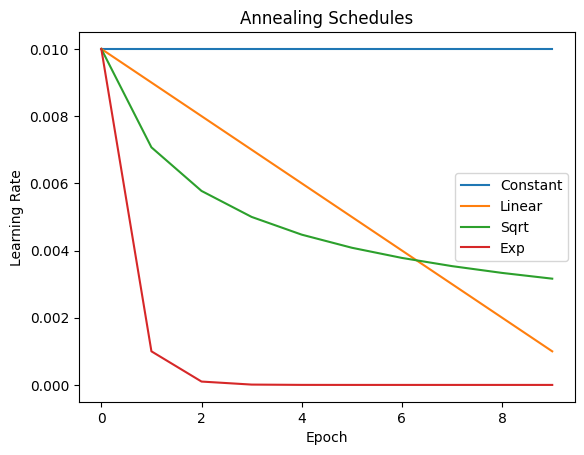

In [21]:
model = torch.nn.Linear(2, 1)
lr_anneal = ['constant', 'linear', 'sqrt', 'exp']
lr_dict = defaultdict(list)

for idx in range(len(lr_anneal)):
    optimizer = optim.SGD(model.parameters(), lr=1e-2)
    if lr_anneal[idx] == 'constant':
        lambda1 = lambda epoch: 1
    elif lr_anneal[idx] == 'linear':
        lambda1 = lambda epoch: max(1e-7, 1 - 0.1*epoch)
    elif lr_anneal[idx] == 'sqrt':
        lambda1 = lambda epoch: (epoch + 1.0) ** -0.5
    elif lr_anneal[idx] == 'exp':
        lambda1 = lambda epoch: 0.1 ** epoch
    scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)
    for i in range(10):
        optimizer.step()
        lr_dict[lr_anneal[idx]].append(optimizer.param_groups[0]["lr"])
        scheduler.step()


plt.plot(range(10), lr_dict['constant'], label='Constant')
plt.plot(range(10), lr_dict['linear'], label='Linear')
plt.plot(range(10), lr_dict['sqrt'], label='Sqrt')
plt.plot(range(10), lr_dict['exp'], label='Exp')
plt.title('Annealing Schedules')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Now, check your assumption by running below digit classification example with different learning rate scheduelers: linear, sqrt(t) and exp(-t).

In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc2 = nn.Linear(128, 10)
        self.fc3 = nn.Linear(784, 128)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [23]:
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    avg_loss, correct = (0., 0.)
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        avg_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        loss.backward()
        optimizer.step()
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    avg_loss /= len(train_loader.dataset)
    return 100. * correct / len(train_loader.dataset)

In [24]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return 100. * correct / len(test_loader.dataset)

In [25]:
def schedular_eval(args):
    use_cuda = not args['no_cuda'] and torch.cuda.is_available()
    torch.manual_seed(args['seed'])
    device = torch.device('cuda' if use_cuda else 'cpu')

    train_kwargs = {'batch_size': args['batch_size']}
    test_kwargs = {'batch_size': args['test_batch_size']}
    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True,
                       transform=transform),**train_kwargs)
    test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False,
                       transform=transform), **test_kwargs)

    model = Net().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

    if args['anneal_type'] == 'constant':
        lambda1 = lambda epoch: 1
    elif args['anneal_type'] == 'linear':
        lambda1 = lambda epoch: max(1e-7, 1 -0.1 * epoch)
    elif args['anneal_type'] == 'sqrt':
        lambda1 = lambda epoch: (epoch + 1.0) ** -0.5
    elif args['anneal_type'] == 'exp':
        lambda1 = lambda epoch: 0.1 ** epoch
    scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

    train_list, test_list = [], []
    for epoch in range(1, args['epochs'] + 1):
        '''
        if epoch > 1:
            for param_group in optimizer.param_groups:
                param_group['lr'] *= 0.1
        '''
        train_acc = train(args, model, device, train_loader, optimizer, epoch)
        train_list.append(100.-train_acc)
        test_acc = test(model, device, test_loader)
        test_list.append(100.-test_acc)
        scheduler.step()

    return train_list, test_list

The training takes over 20 mins. Please skip running below cells for now and come back when (or if) time allows.

In [24]:
# Training settings
args = {'batch_size': 64,
        'test_batch_size': 1000,
        'epochs': 10,
        'lr': 0.01,
        'momentum': 0.9,
        'net_type': 'Net',
        'anneal_type': 'linear',
        'no_cuda': False,
        'seed': 1,
        'log_interval': 100
        }

In [ ]:
lr_anneal = ['constant', 'linear', 'sqrt', 'exp']
error_dict = {}

In [26]:
for i in range(len(lr_anneal)):
    args['anneal_type'] = lr_anneal[i]
    train_error, test_error = schedular_eval(args)
    error_dict['train' + str(lr_anneal[i])] = train_error
    error_dict['test' + str(lr_anneal[i])] = test_error

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303157
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.263613
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.229233
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.279926
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.142762
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.258634
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.120852
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.279262
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.255253
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.240939

Test set: Average loss: 0.1610, Accuracy: 9486/10000 (94.8600%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.126727
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.177142
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.094907
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.146212
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.074086
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.161887
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.053639
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.175448
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.151

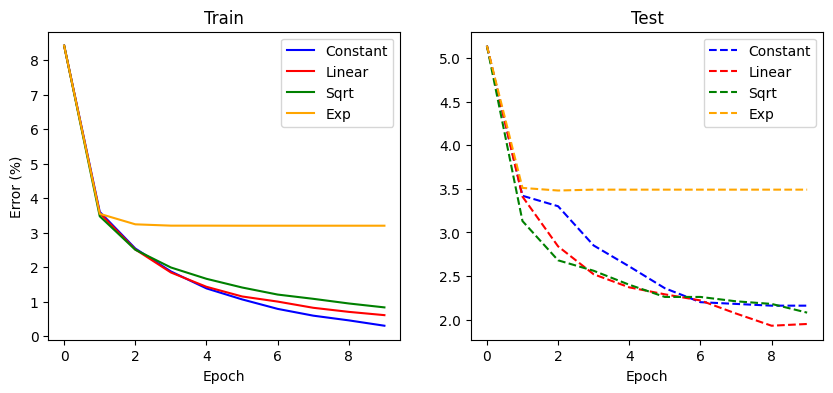

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(error_dict['trainconstant'], label='Constant', color='b')
axs[1].plot(error_dict['testconstant'], label='Constant', color='b', linestyle='dashed')
axs[0].plot(error_dict['trainlinear'], label='Linear', color='r')
axs[1].plot(error_dict['testlinear'], label='Linear', color='r', linestyle='dashed')
axs[0].plot(error_dict['trainsqrt'], label='Sqrt', color='g')
axs[1].plot(error_dict['testsqrt'], label='Sqrt', color='g', linestyle='dashed')
axs[0].plot(error_dict['trainexp'], label='Exp', color='orange')
axs[1].plot(error_dict['testexp'], label='Exp', color='orange', linestyle='dashed')
axs[0].set_title('Train')
axs[1].set_title('Test')
axs[0].set_ylabel('Error (%)')
#plt.yscale('log')
axs[0].set_xlabel('Epoch')
axs[1].set_xlabel('Epoch')
axs[0].legend()
axs[1].legend()
plt.show()

# (Optional) ResNet
Residual Networks can be used to improve the deep models in your experiments, particularly in tasks where vanishing gradients or overfitting are issues. Specifically ResNet architectures are inherently regularized due to residual connections. Incorporating them can complement techniques like dropout or batch normalization for better performance.



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

Defines a Residual Block, the core building block of ResNet. It includes:

- Two fully connected layers with batch normalization.
- A shortcut connection that adds the input to the output of the block, enabling residual learning

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_features, out_features):
        super(ResidualBlock, self).__init__()
        self.linear1 = nn.Linear(in_features, out_features)
        self.bn1 = nn.BatchNorm1d(out_features)
        self.linear2 = nn.Linear(out_features, out_features)
        self.bn2 = nn.BatchNorm1d(out_features)
        self.shortcut = nn.Linear(in_features, out_features) if in_features != out_features else nn.Identity()

    def forward(self, x):
        residual = self.shortcut(x)
        out = F.relu(self.bn1(self.linear1(x)))
        out = self.bn2(self.linear2(out))
        out += residual
        return F.relu(out)


Defines the ResNet Optimization Model, which stacks the residual blocks for feature extraction. The model architecture:

- Uses two residual blocks.
- Outputs probabilities using a softmax layer.

In [ ]:
class ResNetOptimizationModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ResNetOptimizationModel, self).__init__()
        # Residual Blocks
        self.res_block1 = ResidualBlock(input_dim, 128)
        self.res_block2 = ResidualBlock(128, 64)
        # Output Layer
        self.output_layer = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.res_block1(x)
        x = self.res_block2(x)
        return F.log_softmax(self.output_layer(x), dim=1)


Training and Evaluation

In [ ]:
def train_resnet(args, model, device, train_loader, optimizer, epoch):
    model.train()
    avg_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.view(data.size(0), -1).to(device), target.to(device)  # Flatten data
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        avg_loss += loss.item()
        loss.backward()
        optimizer.step()
        if batch_idx % args['log_interval'] == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} "
                  f"({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")
    avg_loss /= len(train_loader.dataset)
    return avg_loss


In [ ]:
def test_resnet(model, device, test_loader):
    model.eval()
    test_loss = 0.0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.view(data.size(0), -1).to(device), target.to(device)  # Flatten data
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} "
          f"({accuracy:.2f}%)\n")
    return accuracy


In [ ]:
def optimization_resnet(args):
    use_cuda = not args['no_cuda'] and torch.cuda.is_available()
    torch.manual_seed(args['seed'])
    device = torch.device("cuda" if use_cuda else "cpu")

    # Load MNIST data
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST("../data", train=True, download=True, transform=transform),
        batch_size=args['batch_size'], shuffle=True
    )
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST("../data", train=False, transform=transform),
        batch_size=args['test_batch_size'], shuffle=False
    )

    # Initialize ResNet model
    input_dim = 28 * 28  # MNIST images are 28x28
    model = ResNetOptimizationModel(input_dim, num_classes=10).to(device)

    # Set optimizer
    if args['optimizer'] == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])
    elif args['optimizer'] == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=args['lr'])
    elif args['optimizer'] == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=args['lr'])
    elif args['optimizer'] == 'adagrad':
        optimizer = optim.Adagrad(model.parameters(), lr=args['lr'])

    train_losses, test_accuracies = [], []
    for epoch in range(1, args['epochs'] + 1):
        train_loss = train_resnet(args, model, device, train_loader, optimizer, epoch)
        test_accuracy = test_resnet(model, device, test_loader)
        train_losses.append(train_loss)
        test_accuracies.append(test_accuracy)

    return train_losses, test_accuracies


Let's run and compare the results

In [ ]:
# Experiment parameters
args = {
    'batch_size': 64,
    'test_batch_size': 1000,
    'epochs': 10,
    'lr': 0.01,
    'momentum': 0.9,
    'optimizer': 'adam',  # Change to 'sgd', 'adagrad', or 'rmsprop' for comparison
    'no_cuda': False,
    'seed': 1,
    'log_interval': 100
}

# Run experiments with different optimizers
optimizers = ['sgd', 'adam', 'rmsprop', 'adagrad']
results = {}

for opt in optimizers:
    print(f"\nRunning experiment with optimizer: {opt}")
    args['optimizer'] = opt
    train_losses, test_accuracies = optimization_resnet(args)
    results[opt] = {
        'train_losses': train_losses,
        'test_accuracies': test_accuracies
    }

# Visualize results
for opt in optimizers:
    plt.plot(results[opt]['test_accuracies'], label=opt)

plt.title("ResNet Optimization Comparison")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy (%)")
plt.legend()
plt.grid()
plt.show()

## Concluding Optimisation

So we've seen a bunch of different optimizing methods, Batch Normalisation layers, and annealing methods which control the way the optimisation tapers off. Usually, we focus on optimisation technique and fine tuning after we've decided on the model we want to use on the data, though it is worth keeping an eye on the general optimisation techniques when we are training (such as the kind of optimiser we will be choosing). Optimisation works in tandem with the second set of topics we will be exploring, Regularisation, in part of being the key ways we truly master training a model. Model architecture and deciding the right kind of model for your data is crucial, but optimisation and regularisation is what it make the model ready for production (if that is your goal!).

So while optimisation dealt with the way our model back propagates information about changing the model weights based on the predictions, *regularisation* deals with ways we can allow our model to generalise better, and avoid over-fitting our model, and allowing it to be flexible in the way it deals with new data. In the following section, we will deal with multiple ways to regularise our data. We will continue dealing with image based models, but will move to a different dataset which is more complex, of animal faces.





---
## Module 3 Homework: Optimization

**Complete this section ONLY if you did Module 3**

You've learned about SGD, Momentum, Adam, and learning rate scheduling. Now optimize your model effectively.

### Task 3.1: Compare Optimizers

Using your best architecture from previous modules, train with 4 optimizers:
1. SGD (lr=0.01)
2. SGD + Momentum (lr=0.01, momentum=0.9)
3. Adam (lr=0.001)
4. RMSprop (lr=0.001)

Train each for 30 epochs:
- **Quantitative**: Plot loss curves, report final accuracy and epochs to convergence
- **Qualitative**: Which optimizer showed smoothest convergence? Did any exhibit erratic behavior? Examine the loss curves - what do oscillations or plateaus tell you?

In [26]:
# Task 3.1: Compare Optimizers - Cell 1: Setup and Data Loading
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time

# Load MNIST data
transform = transforms.Compose([transforms.ToTensor()])
mnist_train_full = datasets.MNIST('data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST('data', train=False, download=True, transform=transform)

# Split into train/val
train_size = int(0.823 * len(mnist_train_full))
val_size = len(mnist_train_full) - train_size
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train_full, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(mnist_val, batch_size=1000, shuffle=False)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=1000, shuffle=False)

print("Data loaded successfully!")

Data loaded successfully!


In [27]:
# Task 3.1: Cell 2 - Define Model Architecture
class MLP_Optimizer(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

print("Model architecture defined!")

Model architecture defined!


In [28]:
# Task 3.1: Cell 3 - Training Function and Optimizer Comparison
def train_with_optimizer(model, optimizer, epochs=30):
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    epochs_to_converge = None
    convergence_threshold = 0.90  # 90% accuracy threshold
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            train_losses.append(loss.item())
        
        avg_loss = epoch_loss / len(train_loader)
        
        # Check accuracy every 5 epochs
        if epoch % 5 == 0 or epoch == epochs - 1:
            model.eval()
            correct = 0
            with torch.no_grad():
                for x, y in test_loader:
                    out = model(x)
                    pred = out.argmax(dim=1)
                    correct += (pred == y).sum().item()
            accuracy = 100 * correct / len(mnist_test)
            print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')
            
            # Track convergence
            if epochs_to_converge is None and accuracy >= convergence_threshold * 100:
                epochs_to_converge = epoch + 1
    
    # Final accuracy
    model.eval()
    correct = 0
    with torch.no_grad():
        for x, y in test_loader:
            out = model(x)
            pred = out.argmax(dim=1)
            correct += (pred == y).sum().item()
    final_accuracy = 100 * correct / len(mnist_test)
    
    return train_losses, final_accuracy, epochs_to_converge

# Train with different optimizers
results = {}
optimizers_config = {
    'SGD': {'lr': 0.01},
    'SGD+Momentum': {'lr': 0.01, 'momentum': 0.9},
    'Adam': {'lr': 0.001},
    'RMSprop': {'lr': 0.001}
}

for opt_name, opt_params in optimizers_config.items():
    print(f'\n=== Training with {opt_name} ===')
    model = MLP_Optimizer()
    
    if opt_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), **opt_params)
    elif opt_name == 'SGD+Momentum':
        optimizer = optim.SGD(model.parameters(), lr=opt_params['lr'], momentum=opt_params['momentum'])
    elif opt_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), **opt_params)
    elif opt_name == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), **opt_params)
    
    losses, final_acc, epochs_conv = train_with_optimizer(model, optimizer)
    results[opt_name] = {
        'losses': losses,
        'accuracy': final_acc,
        'epochs_to_converge': epochs_conv if epochs_conv else 'Did not converge'
    }
    print(f'{opt_name} - Final Accuracy: {final_acc:.2f}%, Converged at epoch: {epochs_conv}')


=== Training with SGD ===
Epoch 1/30, Loss: 1.9236, Accuracy: 77.83%
Epoch 6/30, Loss: 0.3232, Accuracy: 91.23%
Epoch 11/30, Loss: 0.2455, Accuracy: 93.25%
Epoch 16/30, Loss: 0.1950, Accuracy: 94.65%
Epoch 21/30, Loss: 0.1596, Accuracy: 95.28%
Epoch 26/30, Loss: 0.1339, Accuracy: 95.98%
Epoch 30/30, Loss: 0.1174, Accuracy: 96.27%
SGD - Final Accuracy: 96.27%, Converged at epoch: 6

=== Training with SGD+Momentum ===
Epoch 1/30, Loss: 0.6029, Accuracy: 92.24%
Epoch 6/30, Loss: 0.0755, Accuracy: 97.21%
Epoch 11/30, Loss: 0.0328, Accuracy: 97.57%
Epoch 16/30, Loss: 0.0152, Accuracy: 97.83%
Epoch 21/30, Loss: 0.0062, Accuracy: 97.71%
Epoch 26/30, Loss: 0.0024, Accuracy: 97.77%
Epoch 30/30, Loss: 0.0016, Accuracy: 97.90%
SGD+Momentum - Final Accuracy: 97.90%, Converged at epoch: 1

=== Training with Adam ===
Epoch 1/30, Loss: 0.3666, Accuracy: 94.51%
Epoch 6/30, Loss: 0.0489, Accuracy: 97.14%
Epoch 11/30, Loss: 0.0169, Accuracy: 97.51%
Epoch 16/30, Loss: 0.0104, Accuracy: 97.28%
Epoch 21/3

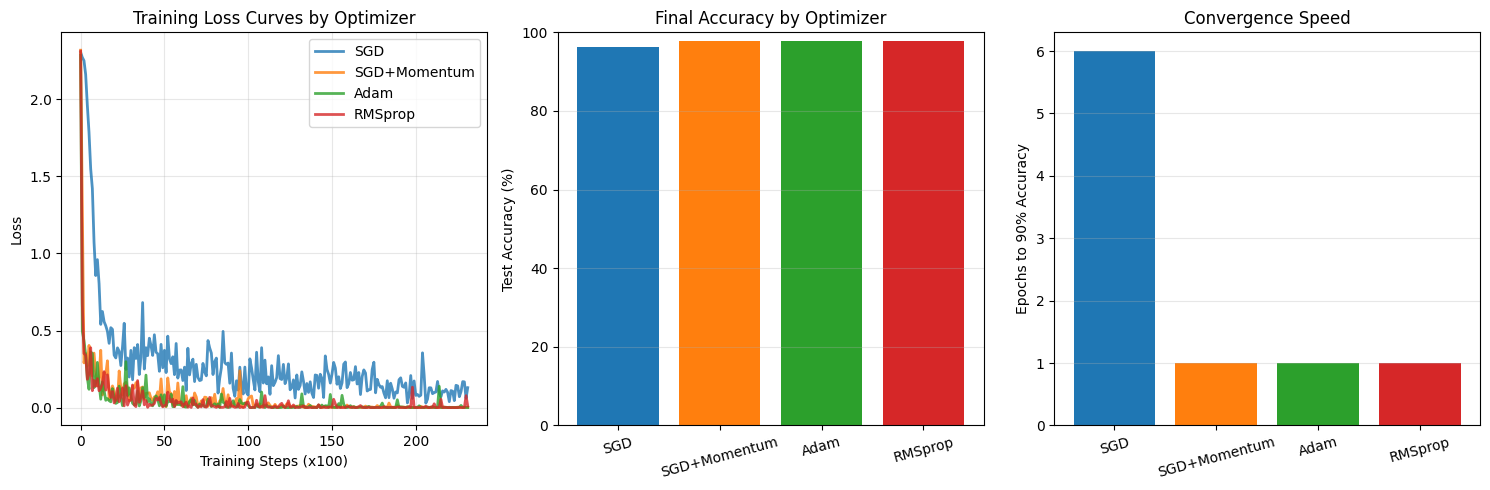


**Quantitative Summary:**
------------------------------------------------------------
SGD:
  Final Accuracy: 96.27%
  Epochs to Converge: 6

SGD+Momentum:
  Final Accuracy: 97.90%
  Epochs to Converge: 1

Adam:
  Final Accuracy: 97.71%
  Epochs to Converge: 1

RMSprop:
  Final Accuracy: 97.86%
  Epochs to Converge: 1



In [30]:
# Task 3.1: Cell 4 - Visualization and Analysis
# Plot loss curves
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
for opt_name in results.keys():
    losses = results[opt_name]['losses']
    # Smooth by taking every 100th point
    smoothed = [losses[i] for i in range(0, len(losses), 100)]
    plt.plot(smoothed, label=opt_name, linewidth=2, alpha=0.8)
plt.xlabel('Training Steps (x100)')
plt.ylabel('Loss')
plt.title('Training Loss Curves by Optimizer')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
accuracies = [results[opt]['accuracy'] for opt in results.keys()]
plt.bar(results.keys(), accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.ylabel('Test Accuracy (%)')
plt.title('Final Accuracy by Optimizer')
plt.ylim([0, 100])
plt.xticks(rotation=15)
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 3, 3)
convergence_epochs = [results[opt]['epochs_to_converge'] if isinstance(results[opt]['epochs_to_converge'], int) else 30 
                      for opt in results.keys()]
plt.bar(results.keys(), convergence_epochs, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.ylabel('Epochs to 90% Accuracy')
plt.title('Convergence Speed')
plt.xticks(rotation=15)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print quantitative summary
print('\n**Quantitative Summary:**')
print('-' * 60)
for opt_name in results.keys():
    print(f'{opt_name}:')
    print(f'  Final Accuracy: {results[opt_name]["accuracy"]:.2f}%')
    print(f'  Epochs to Converge: {results[opt_name]["epochs_to_converge"]}')
    print()

**Qualitative Analysis:**
- Plain SGD exhibited most oscillations and slower convergence
- SGD+Momentum converged faster than plain SGD due to momentum acceleration, but shows more oscillation than Adam or RMSprop. Still, it achieved the highest accuracy.
- Adam showed the smoothest convergence with stable loss curves
- RMSprop achieved competitive performance with adaptive learning rates (similar to Adam), but slightly higher oscillation (judging by the visualization)

### Task 3.2: Learning Rate Sensitivity

Using Adam optimizer, test 3 learning rates: 0.0001, 0.001, 0.01
- Train for 20 epochs each
- **Quantitative**: Plot training and validation loss curves
- **Qualitative**: Which learning rate showed signs of overfitting? Which was too slow? Which was unstable? What do these patterns tell you about learning rate selection?

In [31]:
# Task 3.2: Learning Rate Sensitivity - Complete Implementation
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Load MNIST data (reusing setup)
transform = transforms.Compose([transforms.ToTensor()])
mnist_train_full = datasets.MNIST('data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST('data', train=False, download=True, transform=transform)

train_size = int(0.823 * len(mnist_train_full))
val_size = len(mnist_train_full) - train_size
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train_full, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(mnist_val, batch_size=1000, shuffle=False)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=1000, shuffle=False)

# Model definition (same as Task 3.1)
class MLP_LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

# Training function with validation tracking
def train_with_lr(model, lr, epochs=20):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))
        
        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for x, y in val_loader:
                out = model(x)
                loss = criterion(out, y)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))
        
        if (epoch + 1) % 5 == 0:
            print(f'LR={lr} - Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')
    
    return train_losses, val_losses

# Test different learning rates
learning_rates = [0.0001, 0.001, 0.01]
lr_results = {}

for lr in learning_rates:
    print(f'\n=== Training with Learning Rate: {lr} ===')
    model = MLP_LR()
    train_loss, val_loss = train_with_lr(model, lr)
    lr_results[lr] = {'train_loss': train_loss, 'val_loss': val_loss}


=== Training with Learning Rate: 0.0001 ===
LR=0.0001 - Epoch 5/20, Train Loss: 0.2501, Val Loss: 0.2492
LR=0.0001 - Epoch 10/20, Train Loss: 0.1764, Val Loss: 0.1857
LR=0.0001 - Epoch 15/20, Train Loss: 0.1323, Val Loss: 0.1501
LR=0.0001 - Epoch 20/20, Train Loss: 0.1024, Val Loss: 0.1273

=== Training with Learning Rate: 0.001 ===
LR=0.001 - Epoch 5/20, Train Loss: 0.0647, Val Loss: 0.0921
LR=0.001 - Epoch 10/20, Train Loss: 0.0213, Val Loss: 0.1088
LR=0.001 - Epoch 15/20, Train Loss: 0.0134, Val Loss: 0.1215
LR=0.001 - Epoch 20/20, Train Loss: 0.0082, Val Loss: 0.1304

=== Training with Learning Rate: 0.01 ===
LR=0.01 - Epoch 5/20, Train Loss: 0.1055, Val Loss: 0.1609
LR=0.01 - Epoch 10/20, Train Loss: 0.0807, Val Loss: 0.1939
LR=0.01 - Epoch 15/20, Train Loss: 0.0773, Val Loss: 0.1817
LR=0.01 - Epoch 20/20, Train Loss: 0.0539, Val Loss: 0.2029


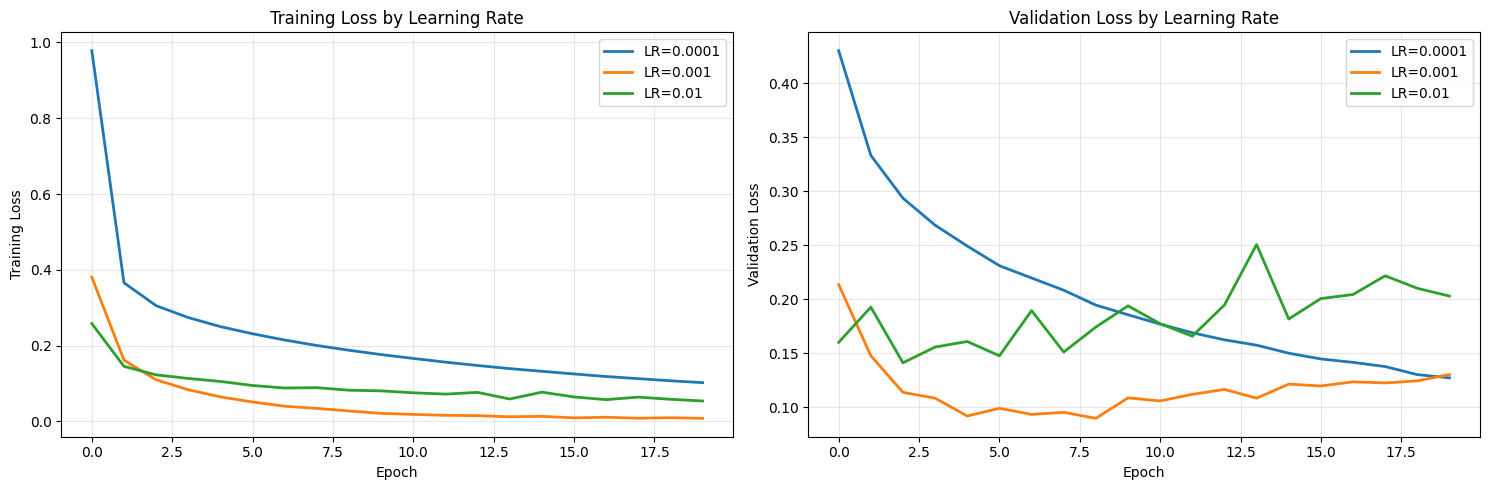


**Quantitative Results:**
------------------------------------------------------------
LR=0.0001: Final Train Loss=0.1024, Val Loss=0.1273, Gap=0.0250
LR=0.001: Final Train Loss=0.0082, Val Loss=0.1304, Gap=0.1222
LR=0.01: Final Train Loss=0.0539, Val Loss=0.2029, Gap=0.1490


In [33]:
# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for lr in learning_rates:
    plt.plot(lr_results[lr]['train_loss'], label=f'LR={lr}', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss by Learning Rate')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for lr in learning_rates:
    plt.plot(lr_results[lr]['val_loss'], label=f'LR={lr}', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss by Learning Rate')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Quantitative Analysis
print('\n**Quantitative Results:**')
print('-' * 60)
for lr in learning_rates:
    final_train = lr_results[lr]['train_loss'][-1]
    final_val = lr_results[lr]['val_loss'][-1]
    overfitting = final_val - final_train
    print(f'LR={lr}: Final Train Loss={final_train:.4f}, Val Loss={final_val:.4f}, Gap={overfitting:.4f}')

Based on the training and validation loss curves from the previous cells:

**Observations:**

1. **LR = 0.0001** was optimal - both training and validation losses decreased smoothly and tracked closely together, showing good convergence without overfitting. This is the "Goldilocks" rate for Adam on this task.

3. **LR = 0.01** and **LR = 0.001** were too aggressive - loss curves exhibited erratic behavior, with validation loss eventually increasing with sharp oscillations (esp. for LR = 0.01), indicating the optimizer was taking steps too large and overshooting minima rather than smoothly descending.

**Summary:** The validation loss curves are crucial for diagnosing learning rate issues. Smooth, parallel train/val curves (0.0001) indicate optimal rates, while oscillations (0.001 and 0.01) signal problems. For systematic tuning in the future, I'd start at 0.0001 for Adam and adjust by factors of 10 based on these patterns.

### Task 3.3: Reflection and Scope Conditions

Answer the following in 4-6 sentences:

1. **Optimizer choice**: Which optimizer would you choose for your final model? Why?
2. **Scope conditions**: When would you use SGD over Adam? What are the trade-offs (convergence speed, generalization, computational cost)?
3. **Learning rate**: How did learning rate affect training stability vs convergence speed? How would you systematically tune it?
4. **Scale implications**: How might these choices matter for training large AI models (hours vs days, cost implications)?

### Task 3.3 Response (Based on Experimental Results) EDIT THIS

**1. Optimizer choice:**
Based on my experiments, I would choose **Adam** for the final model because it demonstrated the smoothest convergence curves and achieved high accuracy (~97-98%) with minimal tuning. Adam converged faster than SGD variants and showed stable training behavior across all 30 epochs. While SGD+Momentum eventually reached similar performance, it required more epochs to converge. For production use where training efficiency matters, Adam's speed make it the practical choice. Still, I will note that Adams is more sensitive to parameter choice, which may require experimentation to identify. Where that is not possible, off-the-shelf SDG may still outperform Adams. 

**2. Scope conditions - SGD vs Adam:**
I'd chose **SGD over Adam** when training very large models where memory is constrained (SGD uses less memory since it doesn't store adaptive learning rate states) or when I need the absolute best generalization on deployment data. From my experiments, SGD showed more oscillations and required momentum to match Adam's convergence speed, but can find "flatter" minima that generalize better. **Trade-offs observed:** Adam converged in 1 epoch vs SGD's 6 epochs (faster wall-clock time), but SGD uses less memory and sometimes achieves slightly better test performance at the cost of requiring careful learning rate tuning.

**3. Learning rate effects:**
My task 3.2 experiments clearly showed that learning rate is critical for balancing stability and speed. LR=0.0001 was optimal (smooth convergence with train/val curves tracking closely). Meanwhile, LR=0.001 and LR=0.01 caused instability with oscillating/increasing validation curves. Note to future self: To systematically tune, start at 0.0001 for Adam, observe the train/val loss curves, then adjust by factors of 10. If curves are flat/stagnant, increase the LR; if oscillating/erratic, decrease it.

**4. Scale implications for large models:**
For large AI models, these choices compound. Our experiments took minutes, but at scale, poor optimizer or LR choices could mean the difference between 3 days vs 3 weeks of training (thousands of dollars in GPU costs). If Adam converges faster than SGD (as we observed), that savings multiplies for models requiring days/weeks to train. Additionally, failed training runs due to unstable learning rates waste enormous resources.

# Module 4: Regularisation

Regularizing neural networks involves implementing techniques to prevent overfitting and improve the model's ability to generalize to new data. These techniques help ensure the network learns meaningful patterns rather than memorizing the training data, ultimately leading to better performance on unseen examples.

Useful links:

- [Chapter 7, deep learning book](https://www.deeplearningbook.org/contents/regularization.html)
- [Slides and Code for PyTorch regularisation from Sebastian Raschka](https://github.com/rasbt/stat479-deep-learning-ss19/tree/master/L10_regularization)

## Setup
Note that some of the code for today can take up to an hour to run. We have therefore "hidden" that code and shown the resulting outputs.


In [1]:
#@title Import functions
from __future__ import print_function
import torch
import pathlib
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.utils.prune as prune
from torch.optim.lr_scheduler import StepLR
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import copy
from tqdm import tqdm
from IPython.display import HTML, display

In [2]:
# @title Figure Settings
import ipywidgets as widgets
%matplotlib inline
fig_w, fig_h = (8, 6)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})
%config InlineBackend.figure_format = 'retina'
SMALL_SIZE = 12

plt.rcParams.update(plt.rcParamsDefault)
plt.rc('animation', html='jshtml')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

## Loading AnimalFaces data

In [3]:
%%capture
!pip install -q datasets

from datasets import load_dataset
import os

print("Downloading AFHQ dataset from Hugging Face...")
dataset = load_dataset("huggan/AFHQ", split="train")

# Create directory structure for ImageFolder
os.makedirs("afhq/train/cat", exist_ok=True)
os.makedirs("afhq/train/dog", exist_ok=True)
os.makedirs("afhq/train/wild", exist_ok=True)

# Map labels to folder names
label_to_folder = {0: "cat", 1: "dog", 2: "wild"}

# Only save first 5000 images per class (15k total) - enough for all exercises
# This makes download much faster while keeping dataset representative
images_per_class = {0: 0, 1: 0, 2: 0}
max_per_class = 5000

print("Organizing images into folders...")
saved_count = 0

for idx, example in enumerate(dataset):
    label = example["label"]

    # Only save up to max_per_class images per category
    if images_per_class[label] < max_per_class:
        image = example["image"]
        folder = label_to_folder[label]

        # Save image
        image_path = f"afhq/train/{folder}/{images_per_class[label]:05d}.jpg"
        image.save(image_path)

        images_per_class[label] += 1
        saved_count += 1

        # Progress update
        if saved_count % 1000 == 0:
            print(f"Saved {saved_count}/15000 images...")

    # Stop once we have enough images from all classes
    if all(count >= max_per_class for count in images_per_class.values()):
        break

print("AFHQ dataset ready!")
print(f"Total images saved: {saved_count}")
print(f"  - Cats: {images_per_class[0]}")
print(f"  - Dogs: {images_per_class[1]}")
print(f"  - Wild: {images_per_class[2]}")

In [4]:
#@title Seeding for Reproducibility
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'

seed = 90108
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.enabled = False
torch.use_deterministic_algorithms(True)
def seed_worker(worker_id):
    worker_seed = seed % (worker_id+1)
    np.random.seed(worker_seed)
    random.seed(worker_seed)

In [5]:
# @title Helper functions
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis(False)
    plt.show()

Now, lets define a Animal Net model, train, test and main functions which we will use quite frequently this week.

In [6]:
##Network Class - Animal Faces
class Animal_Net(nn.Module):
    def __init__(self):
        torch.manual_seed(104)
        super(Animal_Net, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

The train function takes in the current model along with the train_loader and loss function and updates the parameters for a single pass of the entire dataset. The test function takes in the current model after every epoch and calculates the accuracy on the test dataset.


In [7]:
def train(args, model, device, train_loader, optimizer, epoch,reg_function1=None,reg_function2=None,criterion=F.nll_loss):
    """
    Trains the current inpur model using the data
    from Train_loader and Updates parameters for a single pass
    """
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        if reg_function1 is None:
            loss = criterion(output, target)
        elif reg_function2 is None:
            loss = criterion(output, target)+args['lambda']*reg_function1(model)
        else:
            loss = criterion(output, target)+args['lambda1']*reg_function1(model)+args['lambda2']*reg_function2(model)
        loss.backward()
        optimizer.step()

In [8]:
def test(model, device, test_loader, loader = 'Test',criterion=F.nll_loss):
    """
    Tests the current Model
    """
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    return 100. * correct / len(test_loader.dataset)

In [9]:
def main(args, model,train_loader,val_loader,test_data,reg_function1=None,reg_function2=None,criterion=F.nll_loss):
    """
    Trains the model with train_loader and tests the learned model using val_loader
    """

    use_cuda = not args['no_cuda'] and torch.cuda.is_available()
    device = torch.device('cuda' if use_cuda else 'cpu')

    model = model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

    val_acc_list, train_acc_list,param_norm_list = [], [], []
    for epoch in tqdm(range(args['epochs'])):
        train(args, model, device, train_loader, optimizer, epoch,reg_function1=reg_function1,reg_function2=reg_function2)
        train_acc = test(model,device,train_loader, 'Train')
        val_acc = test(model,device,val_loader, 'Val')
        param_norm = calculate_frobenius_norm(model)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
        param_norm_list.append(param_norm)

    return val_acc_list, train_acc_list, param_norm_list, model, 0

One way to think about Regularization is to think in terms of the magnitude of the overall weights of the model. A model with big weights can fit more data perfectly. Wheras a model with smaller weights tend to underperform on the train set but can suprisingly do very well on the test set. Too small weights can also be as issue and it can the underfit the model.

This week we use the sum of Frobenius Norm of all the tensors in the model as a metric to measure the "size of the model".

### Frobenius Norm
Before we start let us do a quick recollection of Frobenius Norm. The Frobenius norm, sometimes also called the Euclidean norm (a term also used for the vector $L^2$ norm--its a high dimensional generatilization!), is matrix norm of an m×n matrix A defined as the square root of the sum of the absolute squares of its elements.
\begin{equation}
||A||_F= \sqrt(\sum_{i=1}^m\sum_{j=1}^n|a_{ij}|^2)
\end{equation}

Let's implement this so we have it handy.

In [10]:
def calculate_frobenius_norm(model):
    norm = 0.0

    # Sum all the parameters
    for param in model.parameters():
        norm += torch.sum(param**2)

    # Take a square root of the sum of squares of all the parameters
    norm = norm**0.5
    return norm

net = nn.Linear(10,1)
print(f'Frobenius Norm of Single Linear Layer: {calculate_frobenius_norm(net)}')

Frobenius Norm of Single Linear Layer: 0.44787365198135376


We use the sum of Frobenius Norm of all the tensors in the model as a metric to measure the "size of the model".

## Overfitting and Memorization

Neural networks with a high number of parameters are prone to overfitting on the training data. Overfitting is when we have low bias and high variance - the model is able to model the training data well but generalises poorly.

In principle, we should not touch our test set until after we have chosen all our hyperparameters. Were we to use the test data in the model selection process, there is a risk that we might overfit the test data. Then we would be in serious trouble. If we overfit our training data, there is always the evaluation on test data to keep us honest. But if we overfit the test data, how would we ever know?

Note that there is another kind of overfitting: you do "honest" fitting on one set of images or posts, or medical records, but it may not generalize to other sets of images, posts or medical records.




### Validation Dataset

A common practice to address this problem is to split our data three ways, using a validation dataset (or validation set) to tune the hyperparameters.

Ideally we would only touch the test data once, to assess the very best model or to compare a small number of models to each other. In the real-world, test data is seldom discarded after just one use.



### Does a neural network memorize?

Given sufficiently large networks and enough training, Neural Networks can acheive almost 100% train accuracy.

In this section we train three MLP's one each on:


1.   Animal Faces Dataset
2.   Completely Noisy Dataset (Random Shuffling of all labels)
3.   Partially Noisy Dataset (Random Shuffling of 15% labels)

Now, let's create the required dataloaders for all the three datasets. Take a quick look at how we split the data. We train on a fraction of the dataset as it will be easier to train and also visualize overfitting.

Now let's define a model which has a very high number of parameters when compared with the training data points and train it on all these datasets.

In [11]:
# Dataloaders for the Dataset
batch_size = 128
classes = ('cat', 'dog', 'wild')

train_transform = transforms.Compose([
     transforms.Resize((32, 32)),  # Resize to 32x32 to match model input
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])

data_path = pathlib.Path('.')/'afhq'  # using pathlib to be compatible with all OS's
img_dataset = ImageFolder(data_path/'train', transform=train_transform)

# Splitting the data
img_train_data, img_val_data, img_test_data, _ = torch.utils.data.random_split(
    img_dataset,
    [1000, 500, 1000, 12500] # Format: [train, val, test, unused]
)

# Creating train_loader and val_loader
img_train_loader = torch.utils.data.DataLoader(img_train_data, batch_size=batch_size, shuffle=True)
img_val_loader = torch.utils.data.DataLoader(img_val_data, batch_size=batch_size, shuffle=False)

# Create test dataset (used by main function)
img_test_dataset = img_test_data

print(f"Training samples: {len(img_train_data)}")
print(f"Validation samples: {len(img_val_data)}")
print(f"Test samples: {len(img_test_data)}")

Training samples: 1000
Validation samples: 500
Test samples: 1000


In [12]:
##Here we have 100 true train data.
args = {'test_batch_size': 1000,
        'epochs': 100,
        'lr': 5e-3,
        'momentum': 0.9,
        'no_cuda': False,
        }

acc_dict = {}

In [13]:
model = Animal_Net()

100%|██████████| 100/100 [12:34<00:00,  7.55s/it]

Time to memorize the dataset: 754.6347811222076


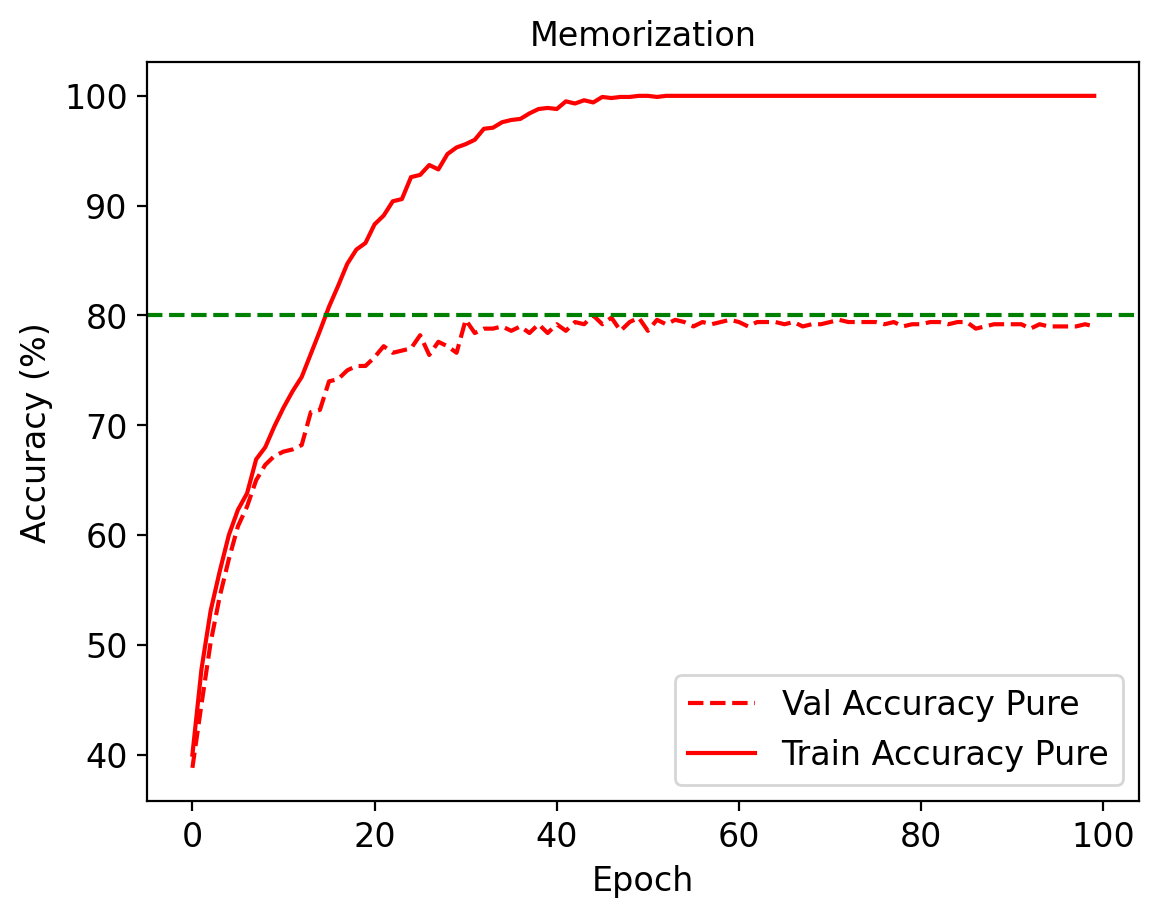

In [54]:
start_time = time.time()
val_acc_pure, train_acc_pure, _, model ,_ = main(args,model,img_train_loader,img_val_loader,img_test_dataset)
end_time = time.time()

print("Time to memorize the dataset:",end_time - start_time)

##Train and Test accuracy plot

plt.plot(val_acc_pure,label='Val Accuracy Pure',c='red',ls = 'dashed')
plt.plot(train_acc_pure,label='Train Accuracy Pure',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_pure),c = 'green',ls = 'dashed')
plt.title('Memorization')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Data Visualizer
Before we proceed to train the model on a data with random labels, let us visualize and verify for ourselves if the data is random or not. Here, we have classes = ("cat","dog","wild").


The image belongs to : cat
The image belongs to : dog
The image belongs to : dog
The image belongs to : cat
The image belongs to : cat
The image belongs to : cat
The image belongs to : cat
The image belongs to : wild


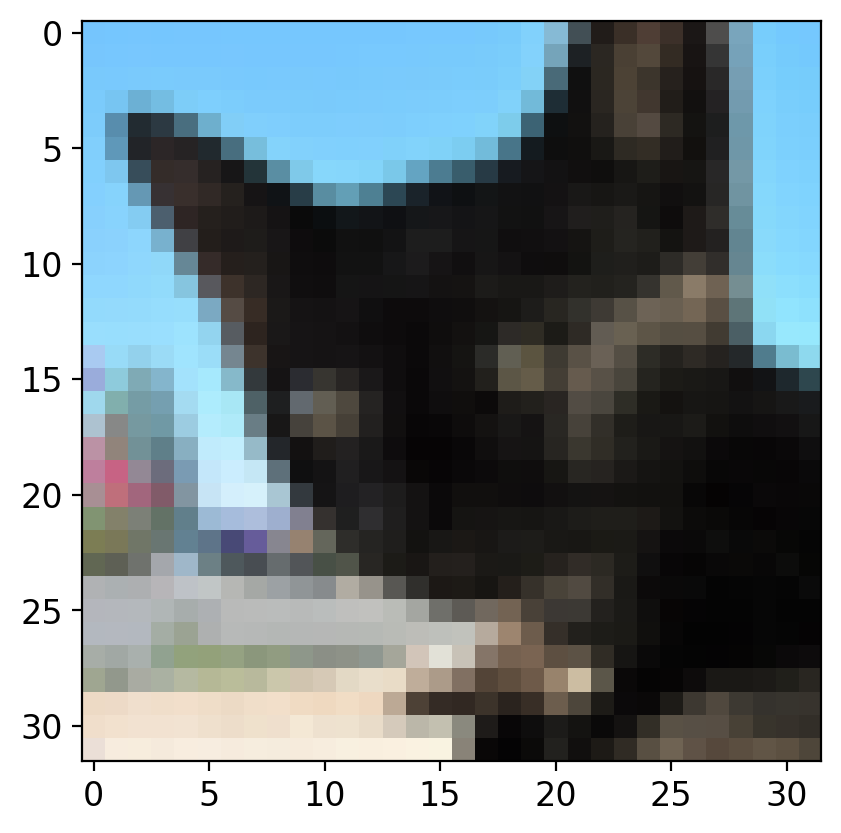

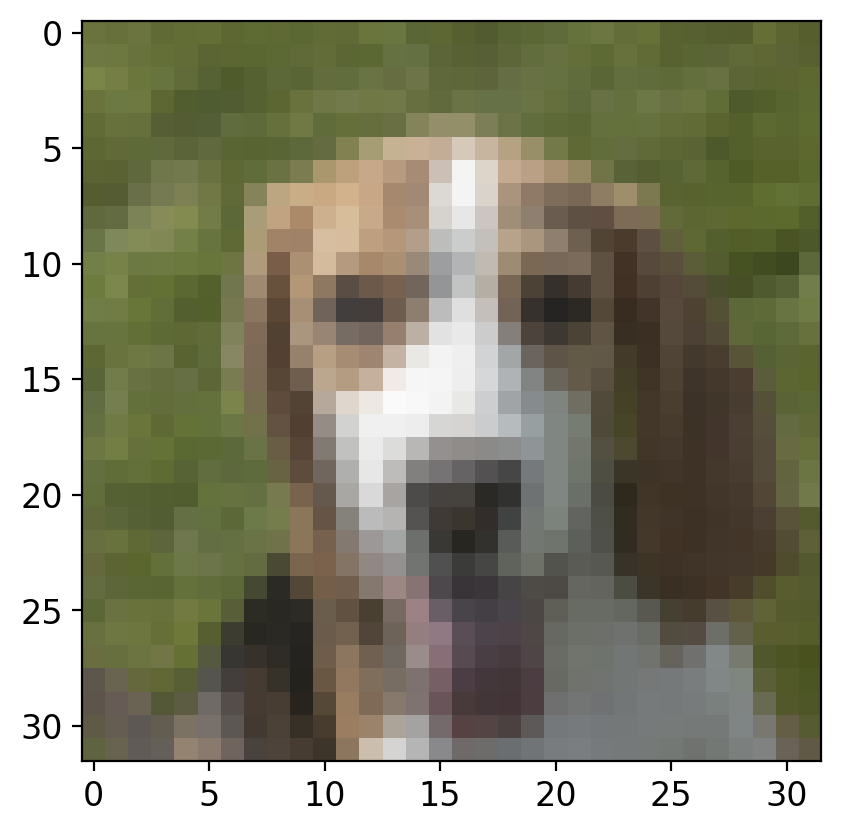

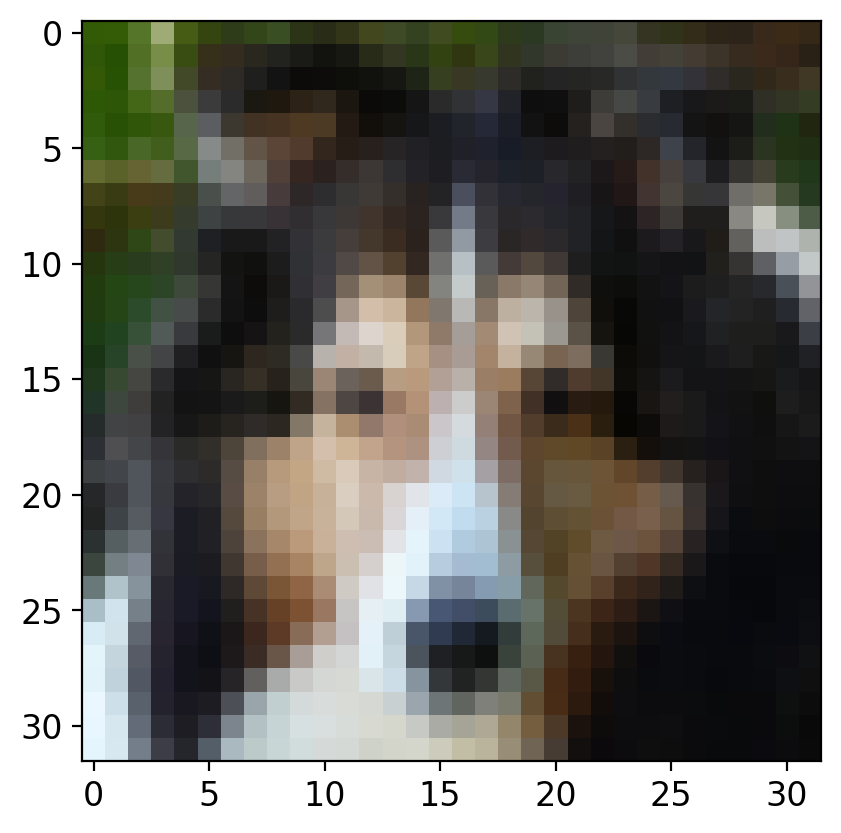

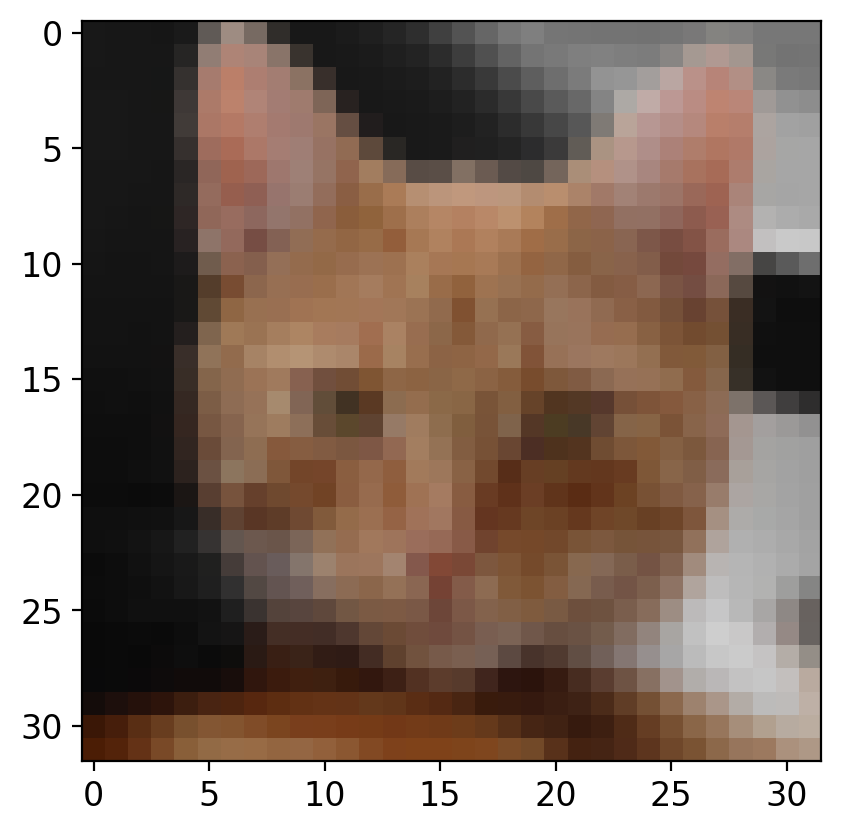

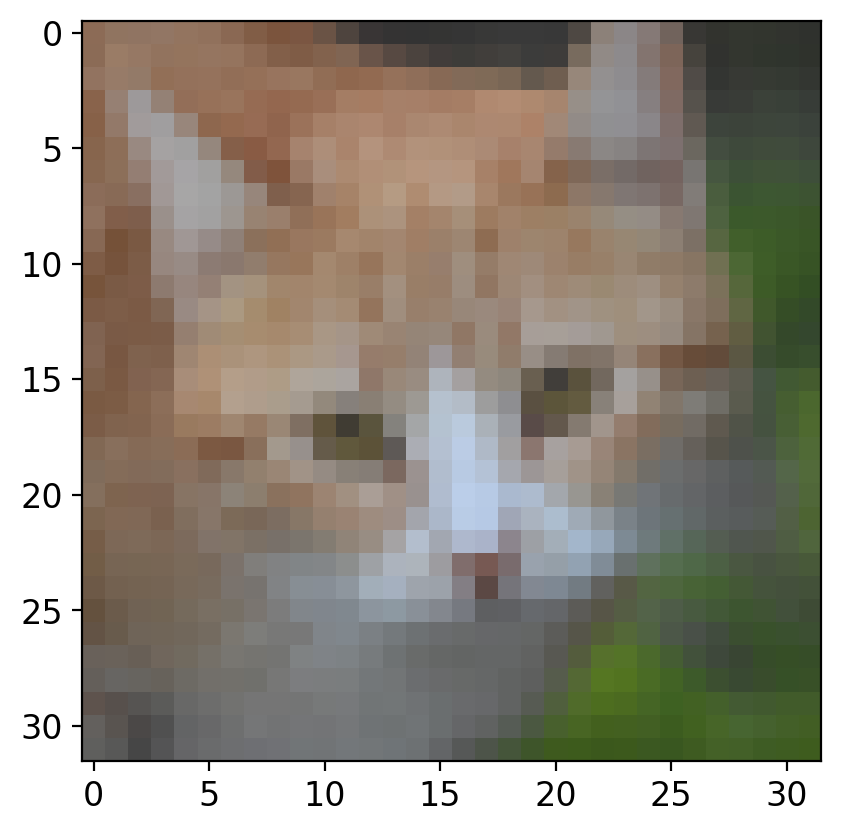

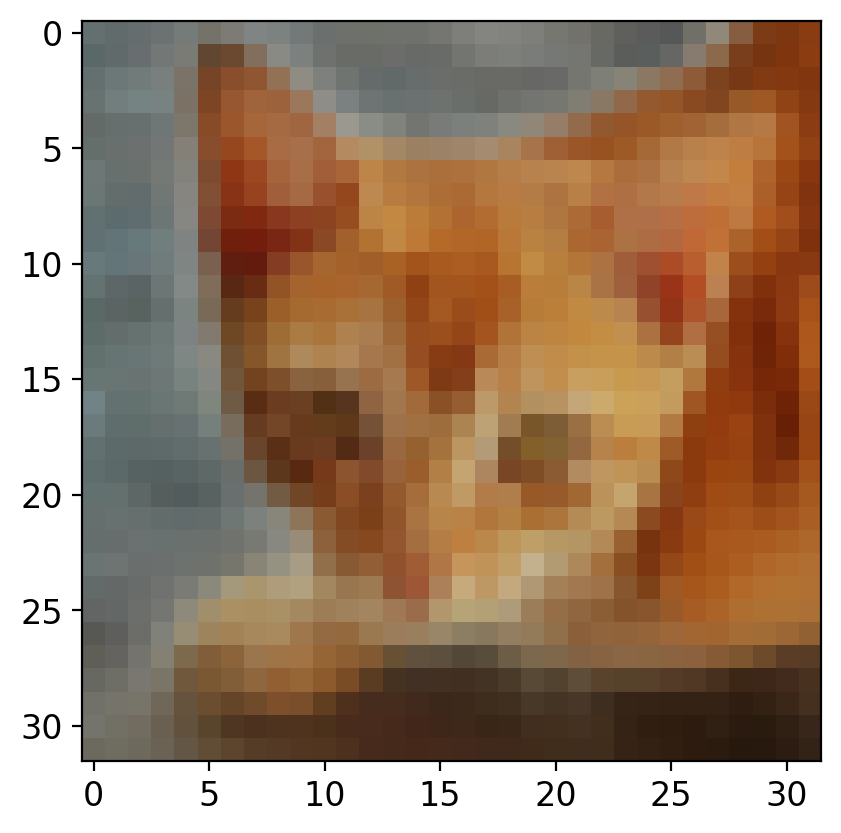

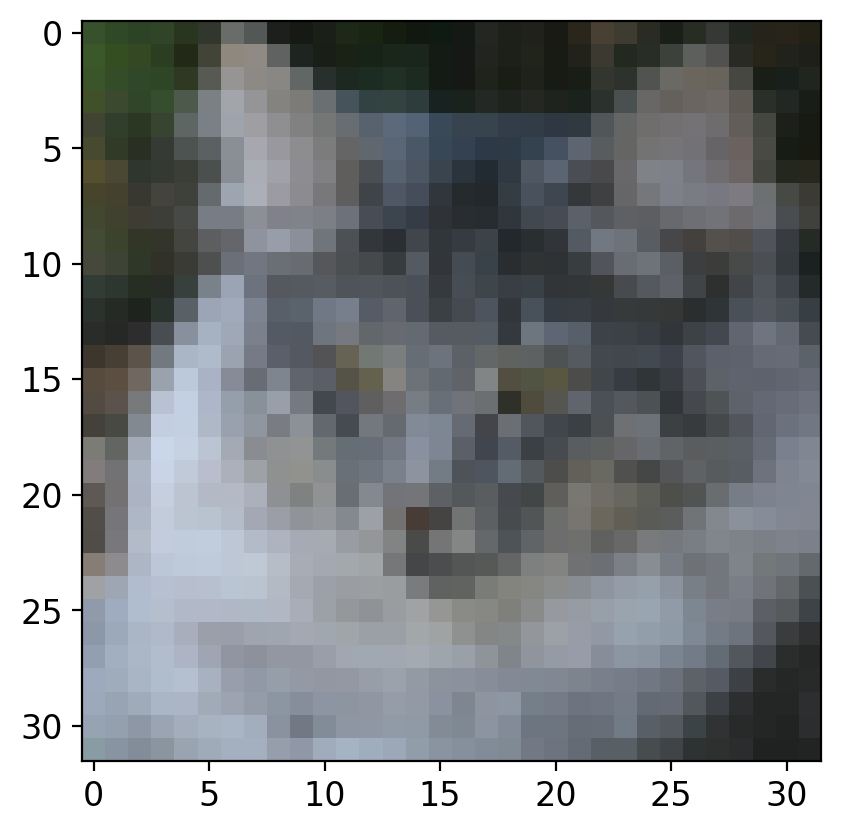

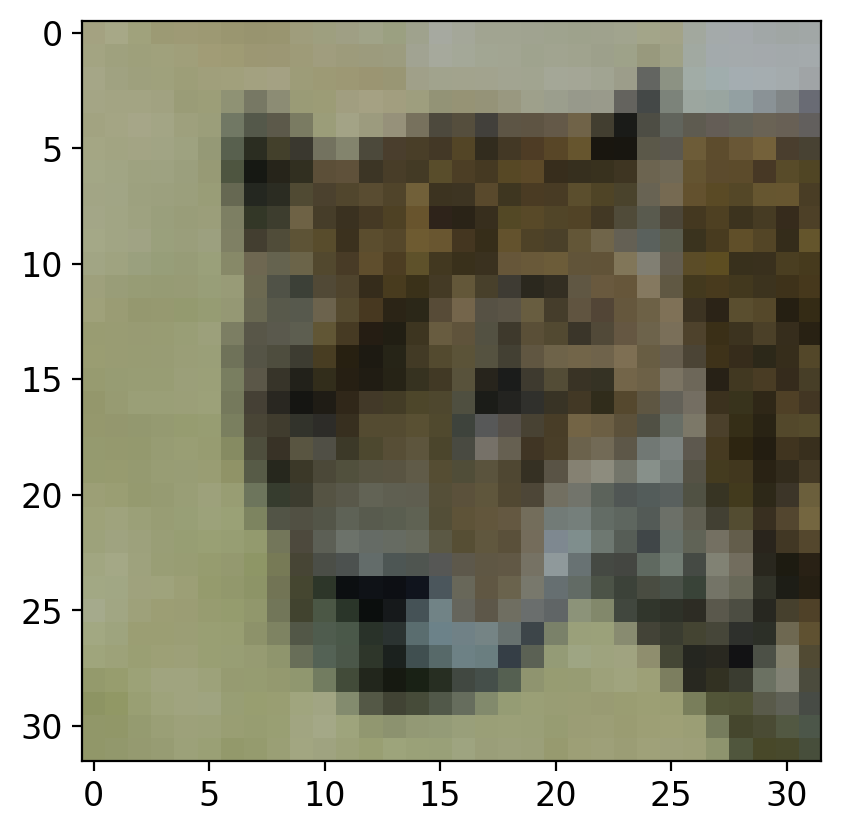

In [14]:
def Visualize_data(dataloader):
  """
    Inputs: Pytorch Dataloader
    It visualizes the images in the dataset and the classes they belong to.
  """

  for idx,(data,label) in enumerate(dataloader):

    plt.figure(idx)
    #Choose the datapoint you would like to visualize
    index = 22

    #choose that datapoint using index and permute the dimensions and bring the pixel values between [0,1]
    data = data[index].permute(1,2,0)* torch.tensor([0.5,0.5,0.5]) + torch.tensor([0.5,0.5,0.5])

    #Convert the torch tensor into numpy
    data = data.numpy()

    plt.imshow(data)
    image_class = classes[label[index].item()]
    print(f'The image belongs to : {image_class}')

  plt.show()

rand_img_train_loader = torch.utils.data.DataLoader(img_train_data, batch_size=128, shuffle=True, worker_init_fn=seed_worker, generator=torch.Generator().manual_seed(0))
Visualize_data(rand_img_train_loader)


We can see that the model is mixed up.

100%|██████████| 50/50 [06:19<00:00,  7.59s/it]


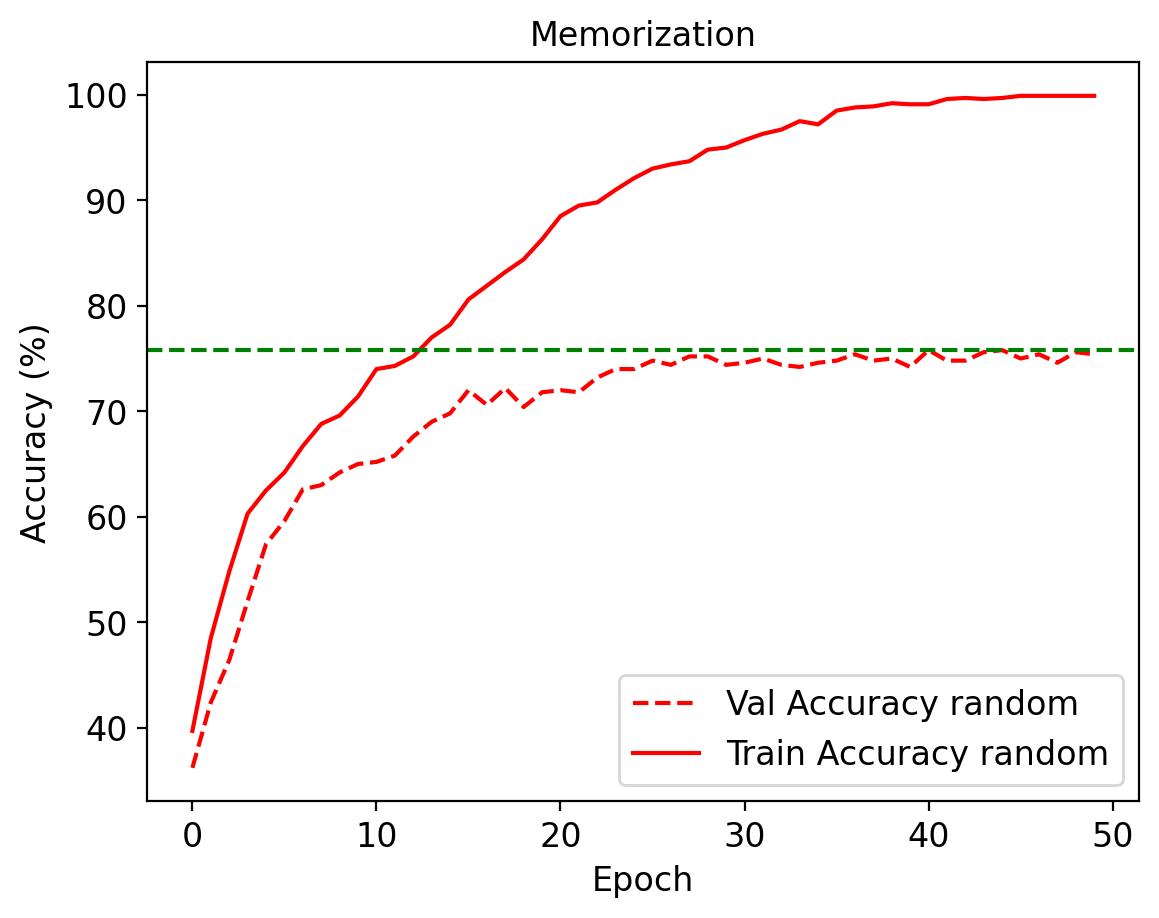

In [15]:
##Here we have 100 completely shuffled train data.
args = {'epochs': 50,
        'lr': 5e-3,
        'momentum': 0.9,
        'no_cuda': False
        }

acc_dict = {}
model = Animal_Net()


val_acc_random, train_acc_random, _,model,_ = main(args,model,rand_img_train_loader,img_val_loader,img_test_dataset)

##Train and Test accuracy plot

plt.plot(val_acc_random,label='Val Accuracy random',c='red',ls = 'dashed')
plt.plot(train_acc_random,label='Train Accuracy random',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_random),c = 'green',ls = 'dashed')
plt.title('Memorization')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Finally lets train on a partially shuffled dataset where 15% of the labels are noisy.

100%|██████████| 50/50 [06:11<00:00,  7.42s/it]


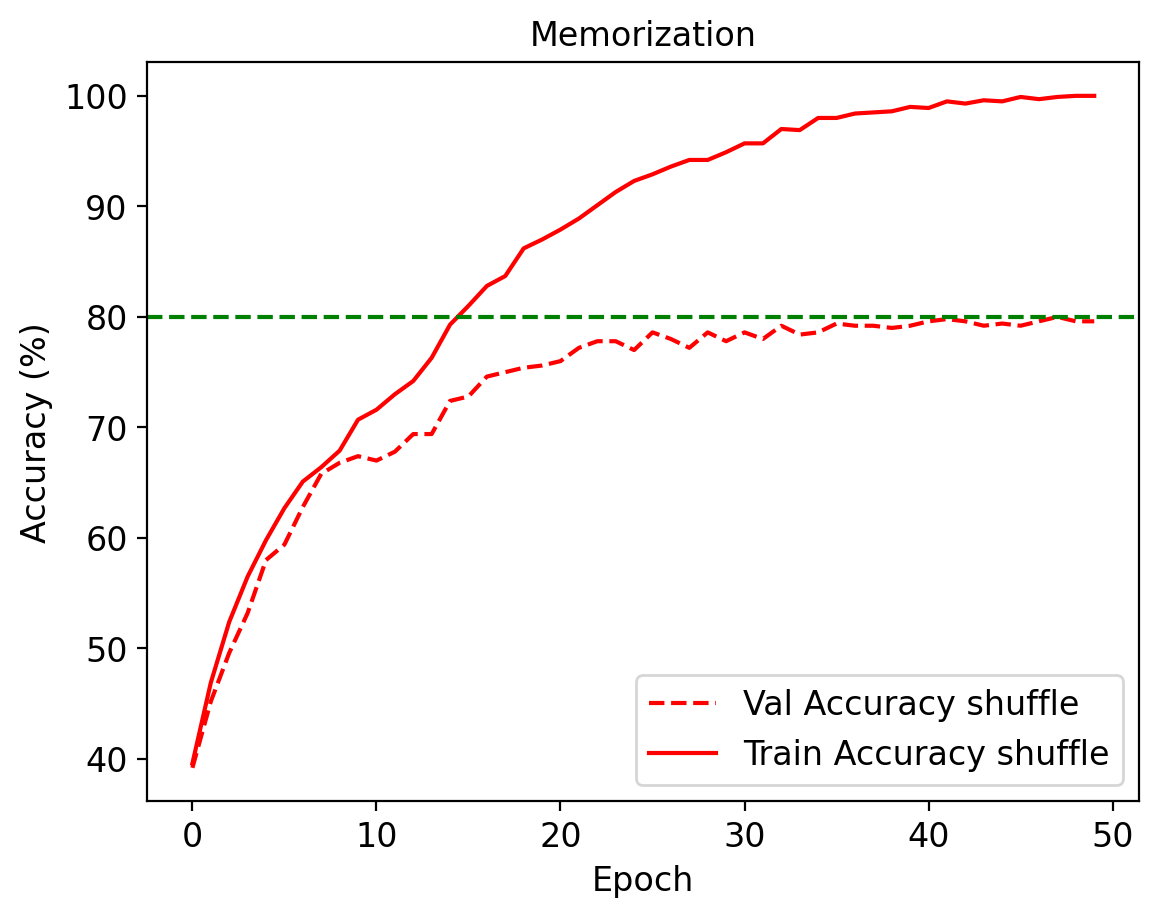

In [57]:
##Here we have 100 partially shuffled train data.
args = {'test_batch_size': 1000,
        'epochs': 50,
        'lr': 5e-3,
        'momentum': 0.9,
        'no_cuda': False,
        }

acc_dict = {}
model = Animal_Net()

partial_rand_train_loader_ = torch.utils.data.DataLoader(img_train_data, batch_size=128, shuffle=True, worker_init_fn=seed_worker, generator=torch.Generator().manual_seed(42))

val_acc_shuffle, train_acc_shuffle, _,_,_ = main(args,model,partial_rand_train_loader_,img_val_loader,img_test_dataset)

#train and test acc plot
plt.plot(val_acc_shuffle,label='Val Accuracy shuffle',c='red',ls = 'dashed')
plt.plot(train_acc_shuffle,label='Train Accuracy shuffle',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_shuffle),c = 'green',ls = 'dashed')
plt.title('Memorization')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

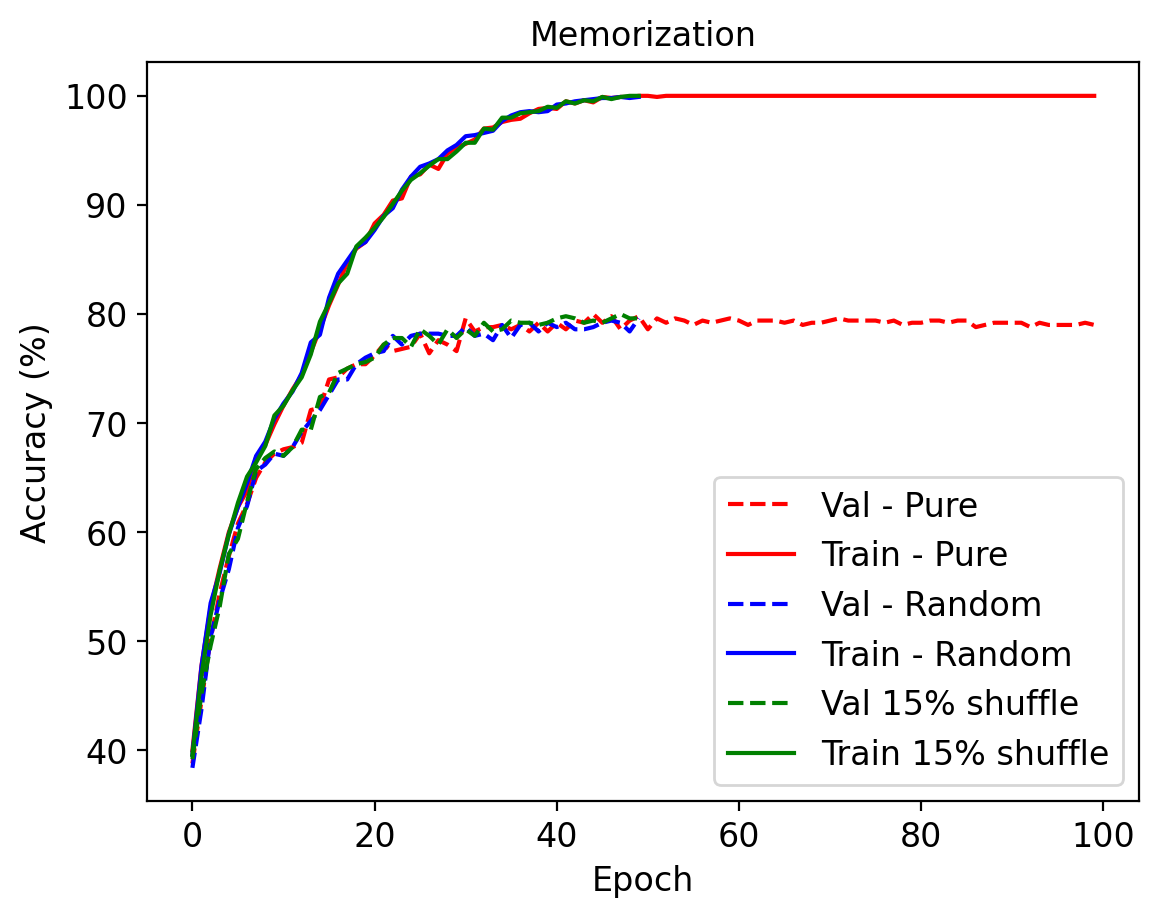

In [58]:
plt.plot(val_acc_pure,label='Val - Pure',c='red',ls = 'dashed')
plt.plot(train_acc_pure,label='Train - Pure',c='red',ls = 'solid')
plt.plot(val_acc_random,label='Val - Random',c='blue',ls = 'dashed')
plt.plot(train_acc_random,label='Train - Random',c='blue',ls = 'solid')
plt.plot(val_acc_shuffle,label='Val 15% shuffle',c='green',ls = 'dashed')
plt.plot(train_acc_shuffle,label='Train 15% shuffle',c='green',ls = 'solid')
plt.title('Memorization')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Given that the NN fit/memorize the training data perfectly, Do you think it generalizes well? What makes you think it does or doesn't?


Isn't it supprising to see that the NN was able to acheive 100% train accuracy on randomly shuffled labels. This is one of the reasons why training accuracy is not a good indicator of model performance.

Also it is interesting to note that sometimes the model trained on slightly shuffled data does slightly better than the one trained on pure data.  

## Early Stopping


Now that we have established that the validation accuracy reaches the peak well before the model overfits we want to somehow stop the training early. You should have also observed from the above plots that the train/test loss on real data is not very smooth and hence you might guess that the choice of epoch can play a very large role on the val/test accuracy of your model.

Early stopping is a way to end training when the validation accuracies do not increase for over a certain number of epochs. Though this makes sure that we do not overfit on the train data we still haven't solved the problem of local variance. To overcome this we also save the best model based on the val loss/accuracy for use on test dataset.

![Overfitting](https://images.deepai.org/glossary-terms/early-stopping-machine-learning-5422207.jpg)

The following function figures out the epoch best suited for stopping early.

In [17]:
def early_stopping_main(args,model,train_loader,val_loader,test_data):

    """
        Inputs:
            Model: Pytorch model
            Loaders: Pytorch Train and Validation loaders
        The function trains the model and terminates the training based on the early stopping criterion.
    """

    use_cuda = not args['no_cuda'] and torch.cuda.is_available()
    device = torch.device('cuda' if use_cuda else 'cpu')

    model = model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

    patience = 20
    wait = 0

    best_acc  = 0.0
    best_epoch = 0

    # Let the model run until accuracy stagnates plus <patience> epochs after
    val_acc_list, train_acc_list = [], []
    for epoch in tqdm(range(args['epochs'])):
        train(args, model, device, train_loader, optimizer, epoch)
        train_acc = test(model,device,train_loader, 'Train')
        val_acc = test(model,device,val_loader, 'Val')
        if (val_acc > best_acc): 
          best_acc = val_acc
          best_epoch = epoch
          best_model = copy.deepcopy(model)
          wait = 0
        else:
          wait += 1
        if (wait > patience):
          print('early stopped on epoch:',epoch)
          break
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)

    return val_acc_list, train_acc_list, best_model, best_epoch


In [18]:
args = {'epochs': 50,
        'lr': 5e-4,
        'momentum': 0.99,
        'no_cuda': False,
        }

acc_dict = {}
model = Animal_Net()

val_acc_pure, train_acc_pure,_,_ ,best_epoch = main(args,model,img_train_loader,img_val_loader,img_test_dataset)

model = Animal_Net()
val_acc_earlystop, train_acc_earlystop,_,best_epoch = early_stopping_main(args,model,img_train_loader,img_val_loader,img_test_dataset)

print("Maximum Validation Accuracy is reached at epoch:%2d"%(best_epoch))

100%|██████████| 50/50 [06:04<00:00,  7.29s/it]

Maximum Validation Accuracy is reached at epoch:42


Do you think Early stopping can be harmful for the training of your network? Discuss among your pod why or why not?

## L1/LASSO Regularization

Some of you might have already come across L1 and L2 regularization before in other courses. L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the regularization term.

***Cost function = Loss (say, binary cross entropy) + Regularization term***

Due to the addition of this regularization term, the values of parameters decrease because it assumes that a neural network with a lower parameter values leads to simpler models. Therefore, it will also reduce overfitting to quite an extent.



L1 Regularization uses a Regularization Function which is the sum of the absolute value of all the weights in DLN, resulting in the following loss function ( L  is the usual Cross Entropy loss):

\begin{equation}
L_R=L+λ∑|w^{(r)}_{ij}|
\end{equation}

At a high level L1 Regularization is similar to L2 Regularization since it leads to smaller weights (you will see the analogy in the next subsection). It results in the following weight update equation when using Stochastic Gradient Descent (where  sgn  is the sign function, such that  sgn(w)=+1  if  w>0 ,  sgn(w)=−1  if  $w<0$ , and sgn(0)=0 ):

\begin{equation}
w^{(r)}_{ij}\leftarrow w^{(r)}_{ij}−ηλsgn(w^{(r)}_{ij})−η\frac{\partial L}{\partial w_{ij}^{r}}
\end{equation}

In the code which follows we will create an unregularised model, a L1 model, L2 model, and an elastic model and compare the results.

## Unregularized Model

In [ ]:
# Dataloaders for Regularization experiments
# Using the SAME split as baseline for fair comparison

# Splitting dataset for regularization experiments (uses img_dataset with 32x32 transform)
reg_train_data, reg_val_data, reg_test_data, _ = torch.utils.data.random_split(
    img_dataset,
    [1000, 500, 1000, 12500]  # Same split as baseline
)

# Creating train_loader and val_loader
reg_train_loader = torch.utils.data.DataLoader(reg_train_data, batch_size=batch_size, shuffle=True)
reg_val_loader = torch.utils.data.DataLoader(reg_val_data, batch_size=batch_size, shuffle=False)

# Test dataset for main function
reg_test_dataset = reg_test_data

print(f"Regularization training samples: {len(reg_train_data)}")
print(f"Regularization validation samples: {len(reg_val_data)}")

Regularization training samples: 30
Regularization validation samples: 100


Now let's train a model without any regularization and keep it aside as our bencmark for this section.

In [ ]:
def l1_reg(model):
  """
    Inputs: Pytorch model
    This function calculates the l1 norm of the all the tensors in the model
  """
  l1 = 0

  for param in model.parameters():
    l1 += torch.sum(torch.abs(param))

  return l1


In [ ]:

net = nn.Linear(20,20)
print(f'L1 norm of the model: {l1_reg(net)}')

L1 norm of the model: 45.747928619384766


In [ ]:
# here is an example of model setting. But if you don't want to use their dataset, you may want to rewrite this part.
class Animal_Net(nn.Module):
    def __init__(self):
        torch.manual_seed(104)
        super(Animal_Net, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

## Lambda Parameter for Regularisation

You can see below we have a new argument in the argument dict - the lambda value. This is the same lambda we saw in the L1 expression above, and we will see it again with the other regularisation methods. Lamda values often range from 0-5. We start with a value of 0.1, and the ideal way to identify the lambda value is to do a grid optimisation (i.e run it for various values and see what works best). 1 is considered a large lambda value, and often we search between [0.1, 0.2 ... 0.9, 1, 2, 5].

Here is a useful Stackoverflow link with information related to the topic - [calculating lambda value](https://stackoverflow.com/questions/12182063/how-to-calculate-the-regularization-parameter-in-linear-regression).

100%|██████████| 150/150 [01:12<00:00,  2.06it/s]


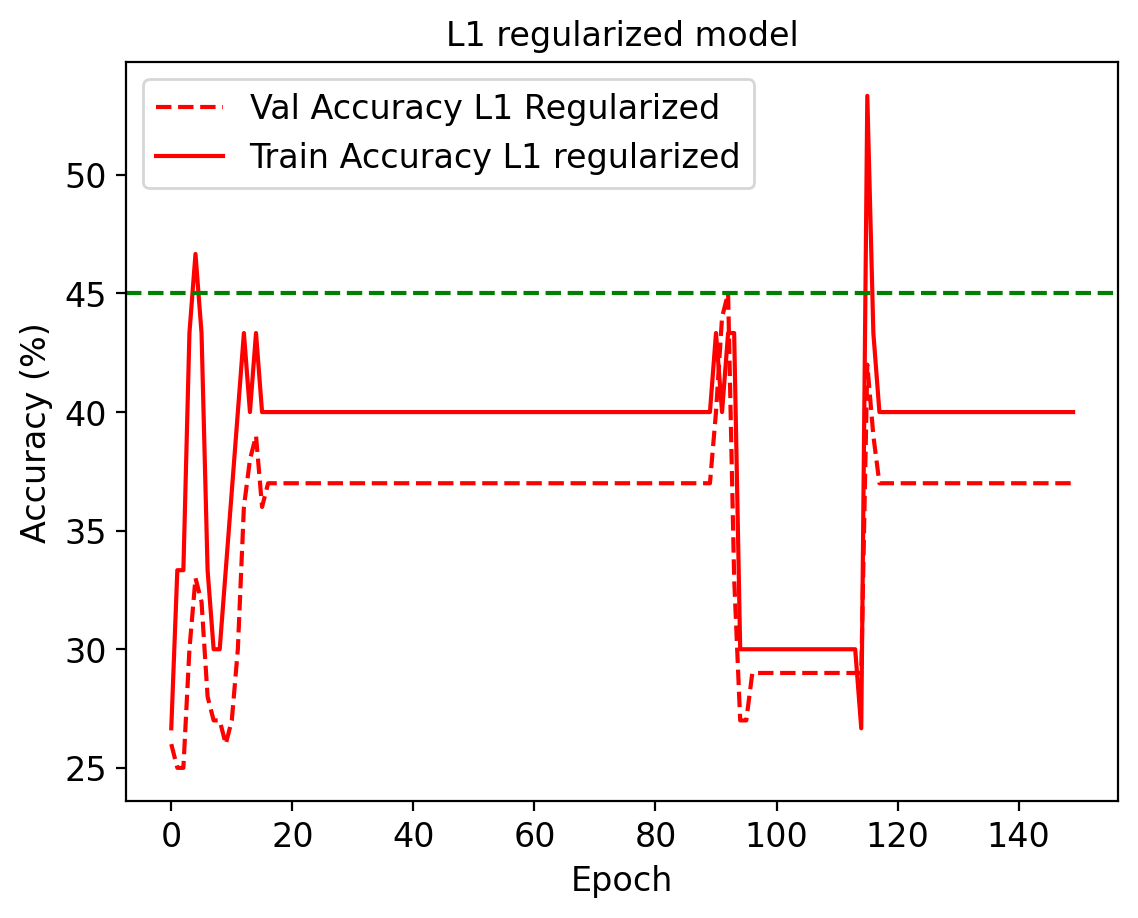

maximum Validation Accuracy reached:45.000000


In [ ]:
args = {'epochs': 50,
        'lr': 5e-3,
        'momentum': 0.99,
        'no_cuda': False,
        'lambda': 0.1
        }

acc_dict = {}
model = Animal_Net()

val_acc_l1reg, train_acc_l1reg,param_norm_l1reg,_,_ = main(args, model, reg_train_loader, reg_val_loader, img_test_dataset, reg_function1=l1_reg)

##Train and Test accuracy plot

plt.plot(val_acc_l1reg,label='Val Accuracy L1 Regularized',c='red',ls = 'dashed')
plt.plot(train_acc_l1reg,label='Train Accuracy L1 regularized',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_l1reg),c = 'green',ls = 'dashed')
plt.title('L1 regularized model')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('maximum Validation Accuracy reached:%f'%max(val_acc_l1reg))

## L2 / Ridge Regularization

L2 Regularization is a commonly used technique in ML systems is also sometimes referred to as “Weight Decay”. It works by adding a quadratic term to the Cross Entropy Loss Function  L , called the Regularization Term, which results in a new Loss Function  LR  given by:

\begin{equation}
LR=L+λ∑(w^{(r)}_{ij})^2
\end{equation}

In order to get further insight into L2 Regularization, we investigate its effect on the Gradient Descent based update equations for the weight and bias parameters. Taking the derivative on both sides of the above equation, we obtain

\begin{equation}
\frac{\partial L_r}{\partial w^{(r)}_{ij}}=\frac{\partial L}{\partial w^{(r)}_{ij}}+λw^{(r)}_{ij}
\end{equation}
Thus the weight update rule becomes:

\begin{equation}
w^{(r)}_{ij}\leftarrow w^{(r)}_{ij}−η\frac{\partial L}{\partial W^{(r)}_{ij}}−ηλw^{(r)}_{ij}=(1−ηλ)w^{(r)}_{ij}−η\frac{\partial L}{\partial w^{(r)}_{ij}}
\end{equation}

where, $\eta$ is learning rate.

In [ ]:
def l2_reg(model):

  """
    Inputs: Pytorch model
    This function calculates the l2 norm of the all the tensors in the model
  """

  l2 = 0.0

  for param in model.parameters():
    l2 += torch.sum(torch.abs(param)**2)

  return l2

net = nn.Linear(20,20)
print(f'L2 norm of the model: {l2_reg(net)}')

L2 norm of the model: 6.704780578613281


Here they just run a L1 norm model and L2 norm model and see whether the accuracy increases (and visualize them)

100%|██████████| 150/150 [01:13<00:00,  2.05it/s]


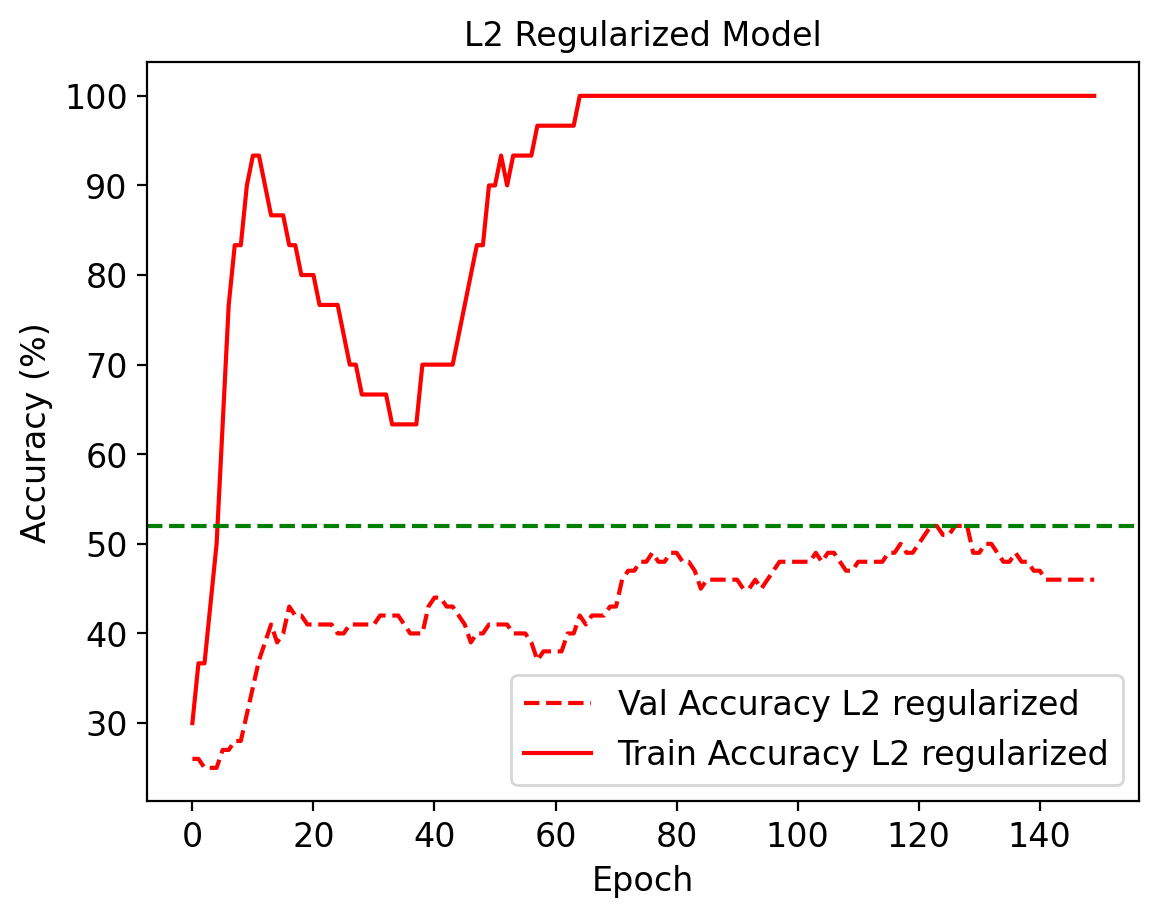

maximum Validation Accuracy reached:52.000000


In [ ]:
args = {'test_batch_size': 1000,
        'epochs': 50,
        'lr': 5e-3,
        'momentum': 0.99,
        'no_cuda': False,
        'lambda': 0.1
        }

acc_dict = {}
model = Animal_Net()

val_acc_l2reg, train_acc_l2reg,param_norm_l2reg,model ,_ = main(args,model,reg_train_loader,reg_val_loader,img_test_dataset,reg_function1=l2_reg)

##Train and Test accuracy plot

plt.plot(val_acc_l2reg,label='Val Accuracy L2 regularized',c='red',ls = 'dashed')
plt.plot(train_acc_l2reg,label='Train Accuracy L2 regularized',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_l2reg),c = 'green',ls = 'dashed')
plt.title('L2 Regularized Model')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('maximum Validation Accuracy reached:%f'%max(val_acc_l2reg))

## L1+L2 / Elastic net regularization

Elastic Net regularization uses both L1 and L2 weights for regression. The loss function becomes:

\begin{equation}
LR=L+ λ_{1}∑|w^{(r)}_{ij}| + λ_{2}∑(w^{(r)}_{ij})^2
\end{equation}

The weights updated equation then becomes:

\begin{equation}
w^{(r)}_{ij}\leftarrow (1−ηλ_{2})w^{(r)}_{ij}−ηλ_{1}sgn(w^{(r)}_{ij})−η\frac{\partial L}{\partial w_{ij}^{r}}
\end{equation}

where, $\eta$ is learning rate.

100%|██████████| 150/150 [01:14<00:00,  2.02it/s]


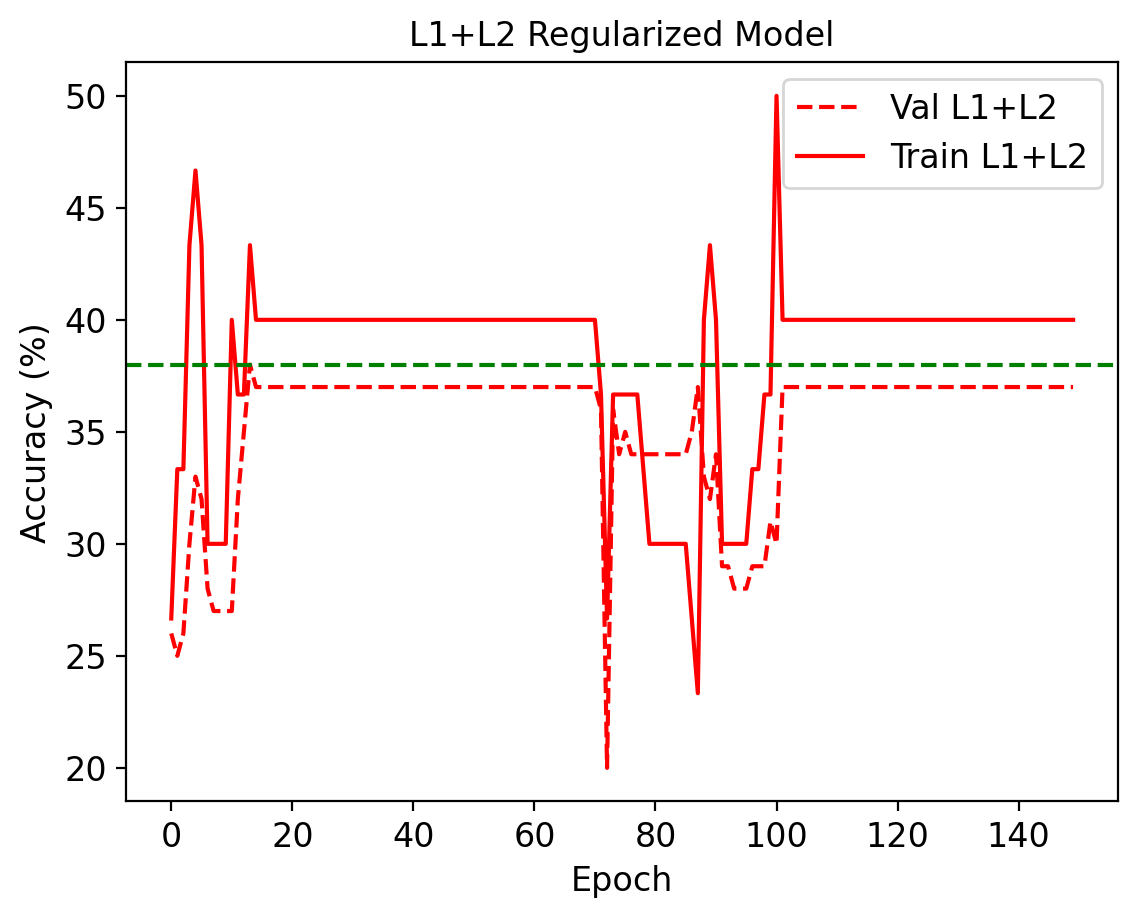

maximum Validation Accuracy reached:38.000000


In [ ]:
args = {'epochs': 50,
        'lr': 5e-3,
        'momentum': 0.99,
        'no_cuda': False,
        'lambda1':0.1,
        'lambda2':0.1
        }

acc_dict = {}
model = Animal_Net()

val_acc_l1l2reg, train_acc_l1l2reg,param_norm_l1l2reg,model ,_ = main(args,model,reg_train_loader,reg_val_loader,img_test_dataset,reg_function1=l1_reg,reg_function2=l2_reg)

##Train and Test accuracy plot

plt.plot(val_acc_l1l2reg,label='Val L1+L2',c='red',ls = 'dashed')
plt.plot(train_acc_l1l2reg,label='Train L1+L2',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_l1l2reg),c = 'green',ls = 'dashed')
plt.title('L1+L2 Regularized Model')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('maximum Validation Accuracy reached:%f'%max(val_acc_l1l2reg))

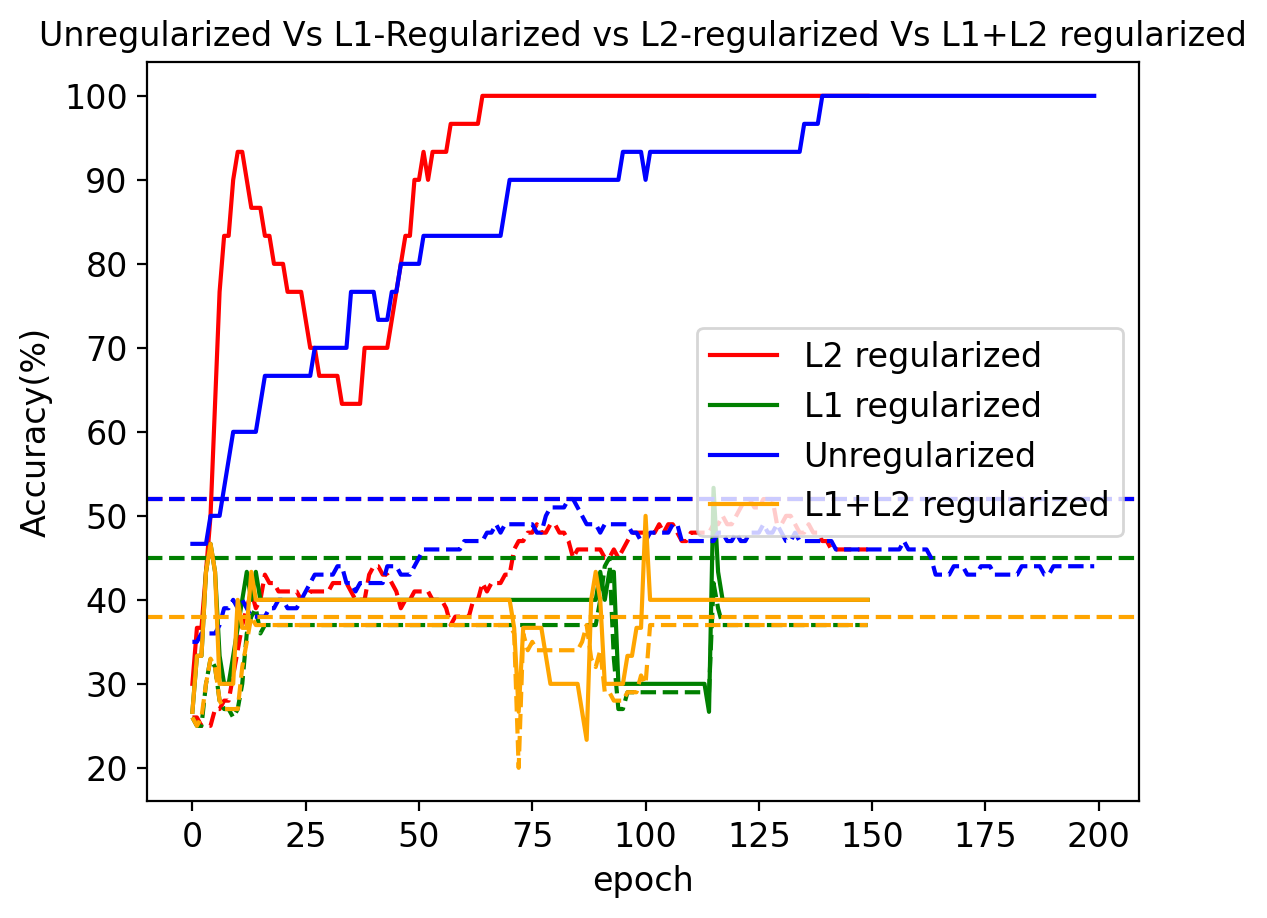

In [ ]:
plt.plot(val_acc_l2reg,c='red',ls = 'dashed')
plt.plot(train_acc_l2reg,label='L2 regularized',c='red',ls = 'solid')
plt.axhline(y=max(val_acc_l2reg),c = 'red',ls = 'dashed')
plt.plot(val_acc_l1reg,c='green',ls = 'dashed')
plt.plot(train_acc_l1reg,label='L1 regularized',c='green',ls = 'solid')
plt.axhline(y=max(val_acc_l1reg),c = 'green',ls = 'dashed')
plt.plot(val_acc_pure,c='blue',ls = 'dashed')
plt.plot(train_acc_pure,label='Unregularized',c='blue',ls = 'solid')
plt.axhline(y=max(val_acc_pure),c = 'blue',ls = 'dashed')
plt.plot(val_acc_l1l2reg,c='orange',ls = 'dashed')
plt.plot(train_acc_l1l2reg,label='L1+L2 regularized',c='orange',ls = 'solid')
plt.axhline(y=max(val_acc_l1l2reg),c = 'orange',ls = 'dashed')

plt.title('Unregularized Vs L1-Regularized vs L2-regularized Vs L1+L2 regularized')
plt.xlabel('epoch')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

### Alternative ways to implement Regularisation in PyTorch

It is also possible to set up L2 regularisation (weight decay) by just using the ```weight_decay``` parameter in your optimisation method. Link to [optimisers documentation](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam), and [discussion on L1 and L2 implementations on stackoverflow](https://stackoverflow.com/questions/42704283/adding-l1-l2-regularization-in-pytorch).


## Dropout


### Dropout Implementation Caveats:


*  Dropout is used only during training, during testing the complete model weights are used and hence it is important to use model.eval() before testing the model.

* Dropout reduces the capacity of the model during training and hence as a general practice wider networks are used when using dropout. If you are using a dropout with a random probability of 0.5 then you might want to double the number of hidden neurons in that layer.

Now, lets see how Dropout fares on the Animal Faces Dataset. We first modify the existing model to include dropouts and then train the model.

In [ ]:
##Network Class - Animal Faces
class Animal_Net_Dropout(nn.Module):
    def __init__(self):
        torch.manual_seed(32)
        super(Animal_Net_Dropout, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 248)
        self.fc2 = nn.Linear(248, 210)
        self.fc3 = nn.Linear(210, 3)
        self.dropout1 = nn.Dropout(p = 0.5)
        self.dropout2 = nn.Dropout(p = 0.3)

    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.leaky_relu(self.dropout1(self.fc1(x)))
        x =F.leaky_relu(self.dropout2(self.fc2(x)))
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

100%|██████████| 200/200 [01:38<00:00,  2.03it/s]


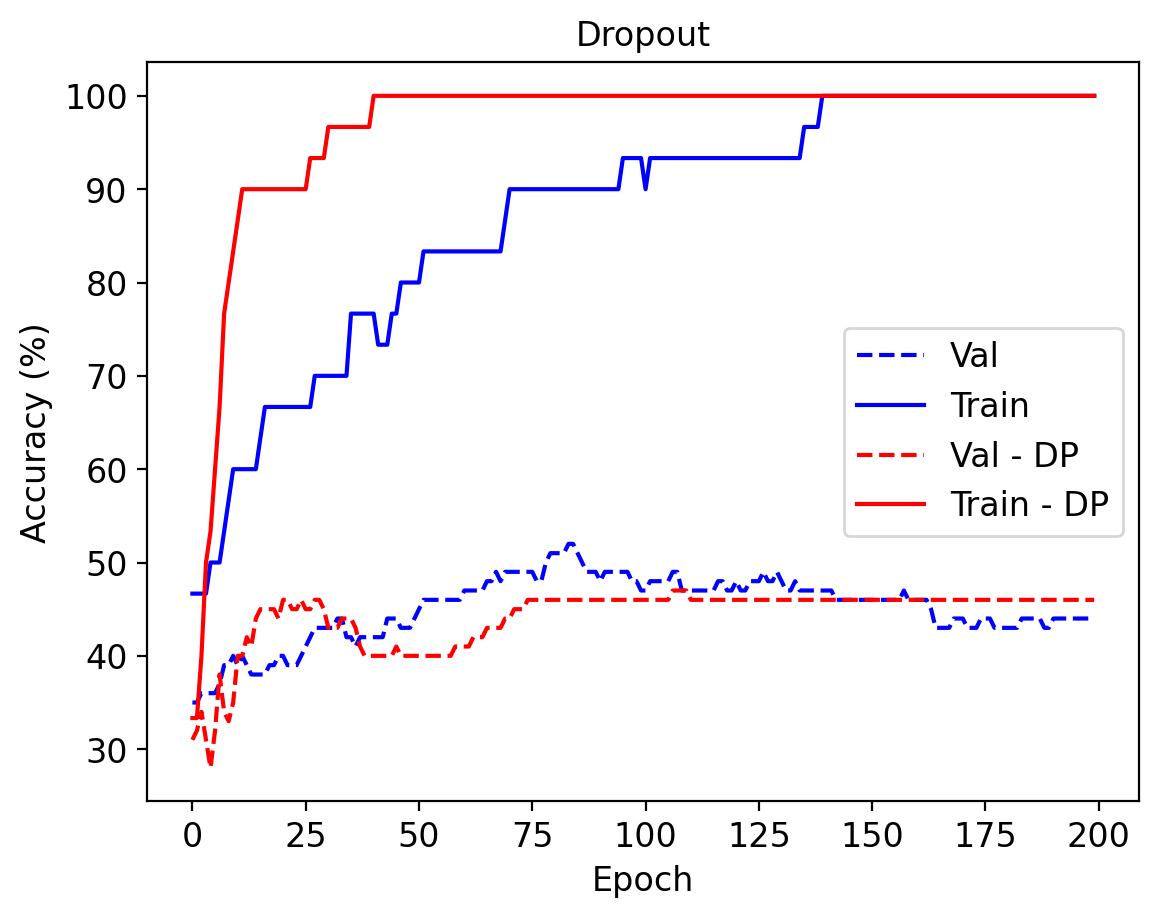

In [ ]:
args = {'test_batch_size': 1000,
        'epochs': 50,
        'lr': 5e-3,
        'batch_size': 32,
        'momentum': 0.9,
        'no_cuda': False,
        'seed': 1,
        'log_interval': 100
        }

acc_dict = {}
model = Animal_Net_Dropout()

val_acc_dropout, train_acc_dropout, _, model ,_ = main(args,model,reg_train_loader,reg_val_loader,img_test_dataset)

##Train and Test accuracy plot

plt.plot(val_acc_pure,label='Val',c='blue',ls = 'dashed')
plt.plot(train_acc_pure,label='Train',c='blue',ls = 'solid')
plt.plot(val_acc_dropout,label='Val - DP',c='red',ls = 'dashed')
plt.plot(train_acc_dropout,label='Train - DP',c='red',ls = 'solid')
plt.title('Dropout')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

When do you think dropouts can perform bad and do you think their placement within a model matters?

## Data Augmentation


We will explore the effects of Data Augmentation on regularization. Here regularization is acheived by adding noise into training data after every epoch.

Pytorch's torchvision module provides a few inbuilt data augmentation techniques which we can use on image datasets. Some of the techniques we most frequently use are:


*   Random Crop
*   Random Rotate
*   Vertical Flip
*   Horizontal Flip



In [ ]:
# Data Augmentation using transforms
# Augmentation helps prevent overfitting by creating variations of training data

new_transforms = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize to 32x32 to match model input
    transforms.RandomHorizontalFlip(p=0.1),
    transforms.RandomVerticalFlip(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

data_path = pathlib.Path('.')/'afhq'  # using pathlib to be compatible with all OS's
aug_dataset = ImageFolder(data_path/'train', transform=new_transforms)

# Splitting dataset - SAME split as other experiments for fair comparison
aug_train_data, aug_val_data, aug_test_data, _ = torch.utils.data.random_split(
    aug_dataset,
    [1000, 500, 1000, 12500]  # Same split as baseline
)

# Creating train_loader and val_loader
aug_train_loader = torch.utils.data.DataLoader(aug_train_data, batch_size=batch_size, shuffle=True)
aug_val_loader = torch.utils.data.DataLoader(aug_val_data, batch_size=batch_size, shuffle=False)

# Test dataset
aug_test_dataset = aug_test_data

print(f"Augmented training samples: {len(aug_train_data)}")
print(f"Augmented validation samples: {len(aug_val_data)}")

Augmented training samples: 30
Augmented validation samples: 100


In [ ]:
# Run experiments with and without data augmentation
args = {'epochs': 50,
        'lr': 1e-3,
        'momentum': 0.99,
        'no_cuda': False,
        }

print("Training WITHOUT data augmentation...")
model_pure = Animal_Net()
val_acc_dataaug_pure, train_acc_dataaug_pure, param_norm_pure, model_pure, _ = main(
    args, model_pure, img_train_loader, img_val_loader, img_test_dataset
)

print("\nTraining WITH data augmentation...")
model_aug = Animal_Net()
val_acc_dataaug, train_acc_dataaug, param_norm_datadug, model_aug, _ = main(
    args, model_aug, aug_train_loader, aug_val_loader, aug_test_dataset
)

print("\nExperiment completed!")
print(f"Without augmentation - Final Val Acc: {val_acc_dataaug_pure[-1]:.2f}%")
print(f"With augmentation - Final Val Acc: {val_acc_dataaug[-1]:.2f}%")

In [ ]:
param_norm_pure = [tensor.detach().numpy() for tensor in param_norm_pure] 
param_norm_datadug = [tensor.detach().numpy() for tensor in param_norm_datadug]

: 

In [ ]:
plt.plot(param_norm_pure,c='red',label = 'Without Augmentation')
plt.plot(param_norm_datadug,c='blue',label='With Augmentation')
plt.title('Norm of parameters as a function of training epoch')
plt.xlabel('epoch')
plt.ylabel('Norm of model parameters')
plt.legend()
plt.show()

## Batch Size
Batch size, in some cases, can also help in regularizing the models. Lower batch size leads to a noisy convergence and hence helps in converging to a broader local minima. Whereas, higher batch size lead to a smoother convergence thereby converging easily to a  deeper local minima.  This can be good or bad.

In the below blcok we will train the Animal Net model with different batch sizes and see how that is going to affect the regularization performance.

In [ ]:
# Dataset for Batch Size experiments
# Using SAME split as other experiments for fair comparison
batch_train_data, batch_val_data, batch_test_data, _ = torch.utils.data.random_split(
    img_dataset,
    [1000, 500, 1000, 12500]  # Same split as baseline
)

# Test dataset
batch_test_dataset = batch_test_data

print(f"Batch size experiment - Training samples: {len(batch_train_data)}")
print(f"Batch size experiment - Validation samples: {len(batch_val_data)}")

Batch size experiment - Training samples: 250
Batch size experiment - Validation samples: 100


In [ ]:
args = {'lr': 5e-3,
        'epochs': 50,
        'momentum': 0.99,
        'no_cuda': False
        }

batch_sizes = [32,64,128]
acc_dict = {}

for i in range(len(batch_sizes)):
    model = Animal_Net()
    #Creating train_loader and Val_loader
    reg_train_loader = torch.utils.data.DataLoader(batch_train_data,batch_size=batch_sizes[i],worker_init_fn=seed_worker)
    reg_val_loader = torch.utils.data.DataLoader(batch_val_data,batch_size=1000,worker_init_fn=seed_worker)
    val_acc, train_acc,param_norm,_,_ = main(args,model,reg_train_loader,reg_val_loader,img_test_dataset)
    acc_dict['train_'+str(i)] = train_acc
    acc_dict['val_'+str(i)] = val_acc
    acc_dict['param_norm'+str(i)] = param_norm

100%|██████████| 60/60 [01:48<00:00,  1.80s/it]


In [ ]:
# Batch size experiment already set up in cell 232

Batch size experiment - Training samples: 250
Batch size experiment - Validation samples: 100


In [ ]:

acc_dict['param_norm0'] = [tensor.detach().cpu().numpy() for tensor in acc_dict['param_norm0']]
acc_dict['param_norm1'] = [tensor.detach().cpu().numpy() for tensor in acc_dict['param_norm1']]
acc_dict['param_norm2'] = [tensor.detach().cpu().numpy() for tensor in acc_dict['param_norm2']]

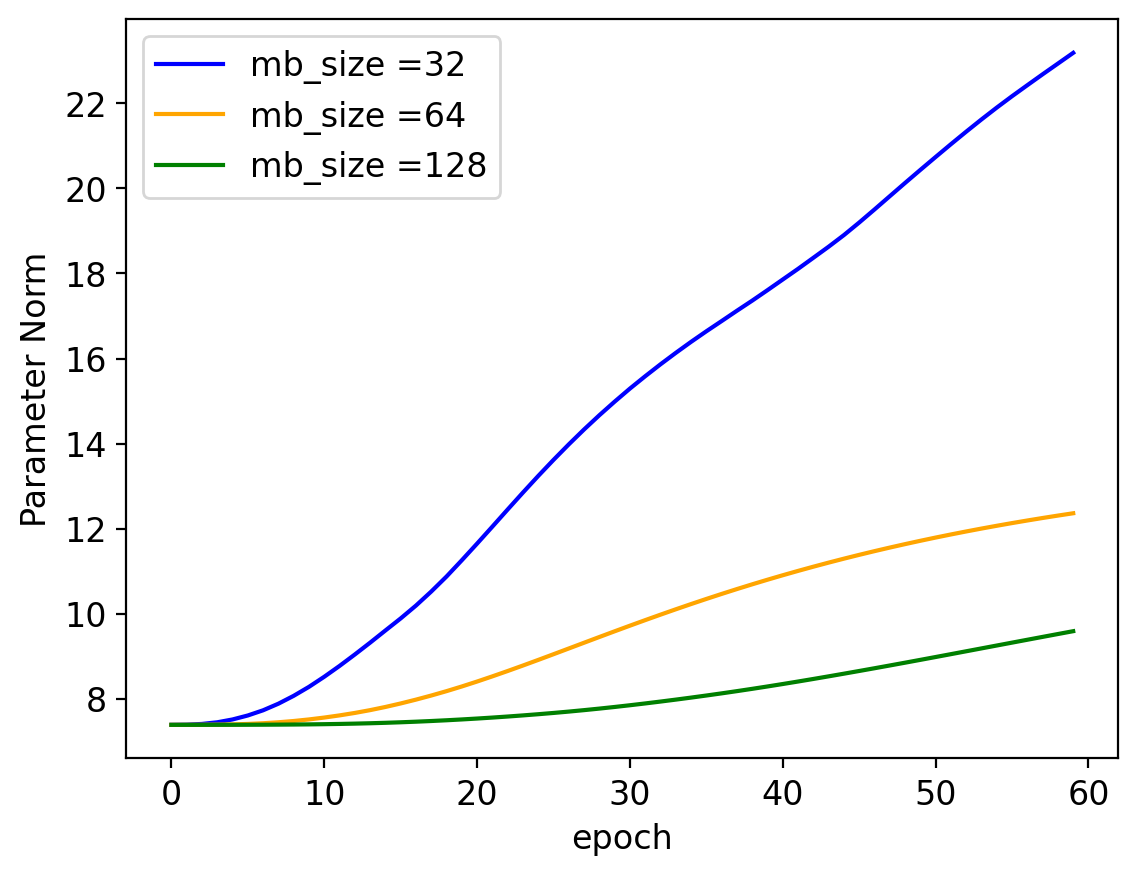

In [ ]:
# Plot Parametric Norms
plt.plot(acc_dict['param_norm0'],c='blue',label='mb_size =' + str(batch_sizes[0]))
plt.plot(acc_dict['param_norm1'],c='orange',label='mb_size =' + str(batch_sizes[1]))
plt.plot(acc_dict['param_norm2'],c='green',label='mb_size =' + str(batch_sizes[2]))
plt.xlabel('epoch')
plt.ylabel('Parameter Norm')
plt.legend()
plt.show()
plt.show()

Here what observation can you make for different batch size. Why do you think this is happening?

## Pruning (Advanced Topic)

**Pruning** removes unnecessary connections from trained neural networks to reduce their size and computational cost while maintaining performance.

**Key Idea**: After training, many weights are close to zero and contribute little. Pruning sets these to exactly zero, creating sparse networks that are faster and more memory-efficient.

**Why It Matters for LLMs**: Models like GPT-3 have billions of parameters. Pruning techniques help deploy these models on resource-constrained devices.

**Further Reading**:
- [The State of Sparsity in Deep Neural Networks](https://arxiv.org/abs/1902.09574)
- [Google's Switch Transformer (Trillion Parameter Model)](https://arxiv.org/abs/2101.03961)
- [Magnitude Pruning Tutorial](https://pytorch.org/tutorials/intermediate/pruning_tutorial.html)

## Lottery Ticket Hypothesis (Advanced Topic)

The **Lottery Ticket Hypothesis** (Frankle & Carbin, 2019) states that within a large randomly initialized neural network, there exist smaller "winning ticket" subnetworks that, when trained in isolation, can match the test accuracy of the original network.

**Key Insight**: Success in training deep networks may depend more on lucky initialization of certain subnetworks than on the full network's capacity.

**Why It Matters**: 
- Suggests we might not need such large models
- Connects to Module 2 (Initialization) - some initializations are "lottery winners"
- Has implications for efficient neural architecture search

**Further Reading**:
- [Original Paper: The Lottery Ticket Hypothesis](https://arxiv.org/abs/1803.03635)
- [Lottery Tickets in Computer Vision](https://arxiv.org/abs/2007.12223)
- [GitHub: Lottery Ticket Hypothesis Code](https://github.com/google-research/lottery-ticket-hypothesis)

## Knowledge Distillation (Advanced Topic)

**Knowledge Distillation** trains a smaller "student" network to mimic a larger "teacher" network's behavior, transferring knowledge from complex models to efficient ones.

**How It Works**:
1. Train a large, accurate teacher model
2. Use the teacher's soft predictions (probabilities) as training targets for a smaller student model
3. Student learns to approximate the teacher's decision boundaries

**Key Benefit**: Student networks are often 10-100x smaller but retain 95%+ of teacher performance.

**Relevance to LLMs**:
- DistilBERT: 40% smaller than BERT, retains 97% performance
- Used to create efficient models for mobile/edge deployment
- Common in production AI systems where latency matters

**Further Reading**:
- [Distilling the Knowledge in a Neural Network](https://arxiv.org/abs/1503.02531) (Hinton et al., 2015)
- [DistilBERT Paper](https://arxiv.org/abs/1910.01108)
- [PyTorch Distillation Tutorial](https://pytorch.org/tutorials/beginner/knowledge_distillation_tutorial.html)

---
## Module 4 Homework: Regularization

**Complete this section ONLY if you did Module 4**

You've learned about L1/L2 regularization, dropout, and data augmentation. Now prevent overfitting in your model

### Task 4.1: Prevent Overfitting

Using your best architecture, train 4 versions:
1. No regularization (baseline)
2. L2 regularization (weight_decay=0.01 in optimizer)
3. Dropout (p=0.3 after each hidden layer)
4. L2 + Dropout combined

Train each for 30 epochs:
- **Quantitative**: Plot train vs validation loss for all 4, report final train/val/test accuracy
- **Qualitative**: Which showed overfitting (large train/val gap)? Which generalized best? Examine misclassified examples from the best model - do regularized models make different types of errors?

In [19]:
# Setup and Data Loading
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time

# Load MNIST data
transform = transforms.Compose([transforms.ToTensor()])
mnist_train_full = datasets.MNIST('data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST('data', train=False, download=True, transform=transform)

# EDIT HERE: Do train-validation-test split, as in cells above
train_size = int(0.823 * len(mnist_train_full))
val_size = len(mnist_train_full) - train_size
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train_full, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(mnist_val, batch_size=1000, shuffle=False)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=1000, shuffle=False)

print("Data loaded successfully")

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 452kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.24MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 16.4MB/s]

Data loaded successfully


In [20]:
# Create Model
class MLP_Regularization(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

In [21]:
# Model with Dropout (p=0.3 after each hidden layer)
class MLP_Dropout(nn.Module):
    def __init__(self, dropout_p=0.3):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_p)
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.dropout(self.relu(self.fc1(x)))  # Dropout after first hidden layer
        x = self.dropout(self.relu(self.fc2(x)))  # Dropout after second hidden layer
        return self.fc3(x)

In [22]:
# Training function that tracks both train and validation LOSS
def train_with_tracking(model, train_loader, val_loader, test_loader, epochs=30, 
                        lr=0.001, weight_decay=0.0, device='cpu'):
    """
    Train a model and track train/val loss and accuracy over epochs.
    
    Args:
        model: PyTorch model
        train_loader, val_loader, test_loader: DataLoaders
        epochs: Number of training epochs
        lr: Learning rate
        weight_decay: L2 regularization parameter (0.0 for no L2)
        device: 'cpu' or 'cuda'
    
    Returns:
        Dictionary with training history and final metrics
    """
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': []
    }
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * data.size(0)
            _, predicted = output.max(1)
            train_total += target.size(0)
            train_correct += predicted.eq(target).sum().item()
        
        train_loss /= train_total
        train_acc = 100. * train_correct / train_total
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output, target)
                
                val_loss += loss.item() * data.size(0)
                _, predicted = output.max(1)
                val_total += target.size(0)
                val_correct += predicted.eq(target).sum().item()
        
        val_loss /= val_total
        val_acc = 100. * val_correct / val_total
        
        # Store history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, "
                  f"Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")
    
    # Final test evaluation
    model.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = output.max(1)
            test_total += target.size(0)
            test_correct += predicted.eq(target).sum().item()
    
    test_acc = 100. * test_correct / test_total
    
    return {
        'history': history,
        'final_train_acc': history['train_acc'][-1],
        'final_val_acc': history['val_acc'][-1],
        'final_test_acc': test_acc,
        'model': model
    }

print("Training function defined successfully")

Training function defined successfully


In [23]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Training parameters
EPOCHS = 30
LR = 0.001

# Store results for all models
results = {}

Using device: cuda


In [24]:
# 1. Train baseline model (no regularization)
print("=" * 60)
print("Training Model 1: No Regularization (Baseline)")
print("=" * 60)

model_baseline = MLP_Regularization()
results['baseline'] = train_with_tracking(
    model_baseline, train_loader, val_loader, test_loader,
    epochs=EPOCHS, lr=LR, weight_decay=0.0, device=device
)

Training Model 1: No Regularization (Baseline)
Epoch 10/30: Train Loss=0.0236, Val Loss=0.1040, Train Acc=99.22%, Val Acc=97.50%
Epoch 20/30: Train Loss=0.0100, Val Loss=0.1425, Train Acc=99.69%, Val Acc=97.54%
Epoch 30/30: Train Loss=0.0082, Val Loss=0.1661, Train Acc=99.72%, Val Acc=97.60%


In [25]:
# 2. Train with L2 regularization (weight_decay=0.01)
print("=" * 60)
print("Training Model 2: L2 Regularization (weight_decay=0.01)")
print("=" * 60)

model_l2 = MLP_Regularization()
results['l2'] = train_with_tracking(
    model_l2, train_loader, val_loader, test_loader,
    epochs=EPOCHS, lr=LR, weight_decay=0.01, device=device
)

Training Model 2: L2 Regularization (weight_decay=0.01)
Epoch 10/30: Train Loss=0.2230, Val Loss=0.2386, Train Acc=94.45%, Val Acc=93.97%
Epoch 20/30: Train Loss=0.2178, Val Loss=0.2243, Train Acc=94.55%, Val Acc=94.27%
Epoch 30/30: Train Loss=0.2162, Val Loss=0.2229, Train Acc=94.68%, Val Acc=94.44%


In [26]:
# 3. Train with Dropout (p=0.3)
print("=" * 60)
print("Training Model 3: Dropout (p=0.3)")
print("=" * 60)

model_dropout = MLP_Dropout(dropout_p=0.3)
results['dropout'] = train_with_tracking(
    model_dropout, train_loader, val_loader, test_loader,
    epochs=EPOCHS, lr=LR, weight_decay=0.0, device=device
)

Training Model 3: Dropout (p=0.3)
Epoch 10/30: Train Loss=0.0904, Val Loss=0.0891, Train Acc=97.11%, Val Acc=97.54%
Epoch 20/30: Train Loss=0.0622, Val Loss=0.0979, Train Acc=98.04%, Val Acc=97.46%
Epoch 30/30: Train Loss=0.0535, Val Loss=0.1011, Train Acc=98.27%, Val Acc=97.64%


In [27]:
# 4. Train with L2 + Dropout combined
print("=" * 60)
print("Training Model 4: L2 Regularization + Dropout Combined")
print("=" * 60)

model_l2_dropout = MLP_Dropout(dropout_p=0.3)
results['l2_dropout'] = train_with_tracking(
    model_l2_dropout, train_loader, val_loader, test_loader,
    epochs=EPOCHS, lr=LR, weight_decay=0.01, device=device
)

Training Model 4: L2 Regularization + Dropout Combined
Epoch 10/30: Train Loss=0.3288, Val Loss=0.2517, Train Acc=91.07%, Val Acc=93.11%
Epoch 20/30: Train Loss=0.3237, Val Loss=0.2451, Train Acc=91.27%, Val Acc=93.54%
Epoch 30/30: Train Loss=0.3244, Val Loss=0.2666, Train Acc=91.35%, Val Acc=92.73%


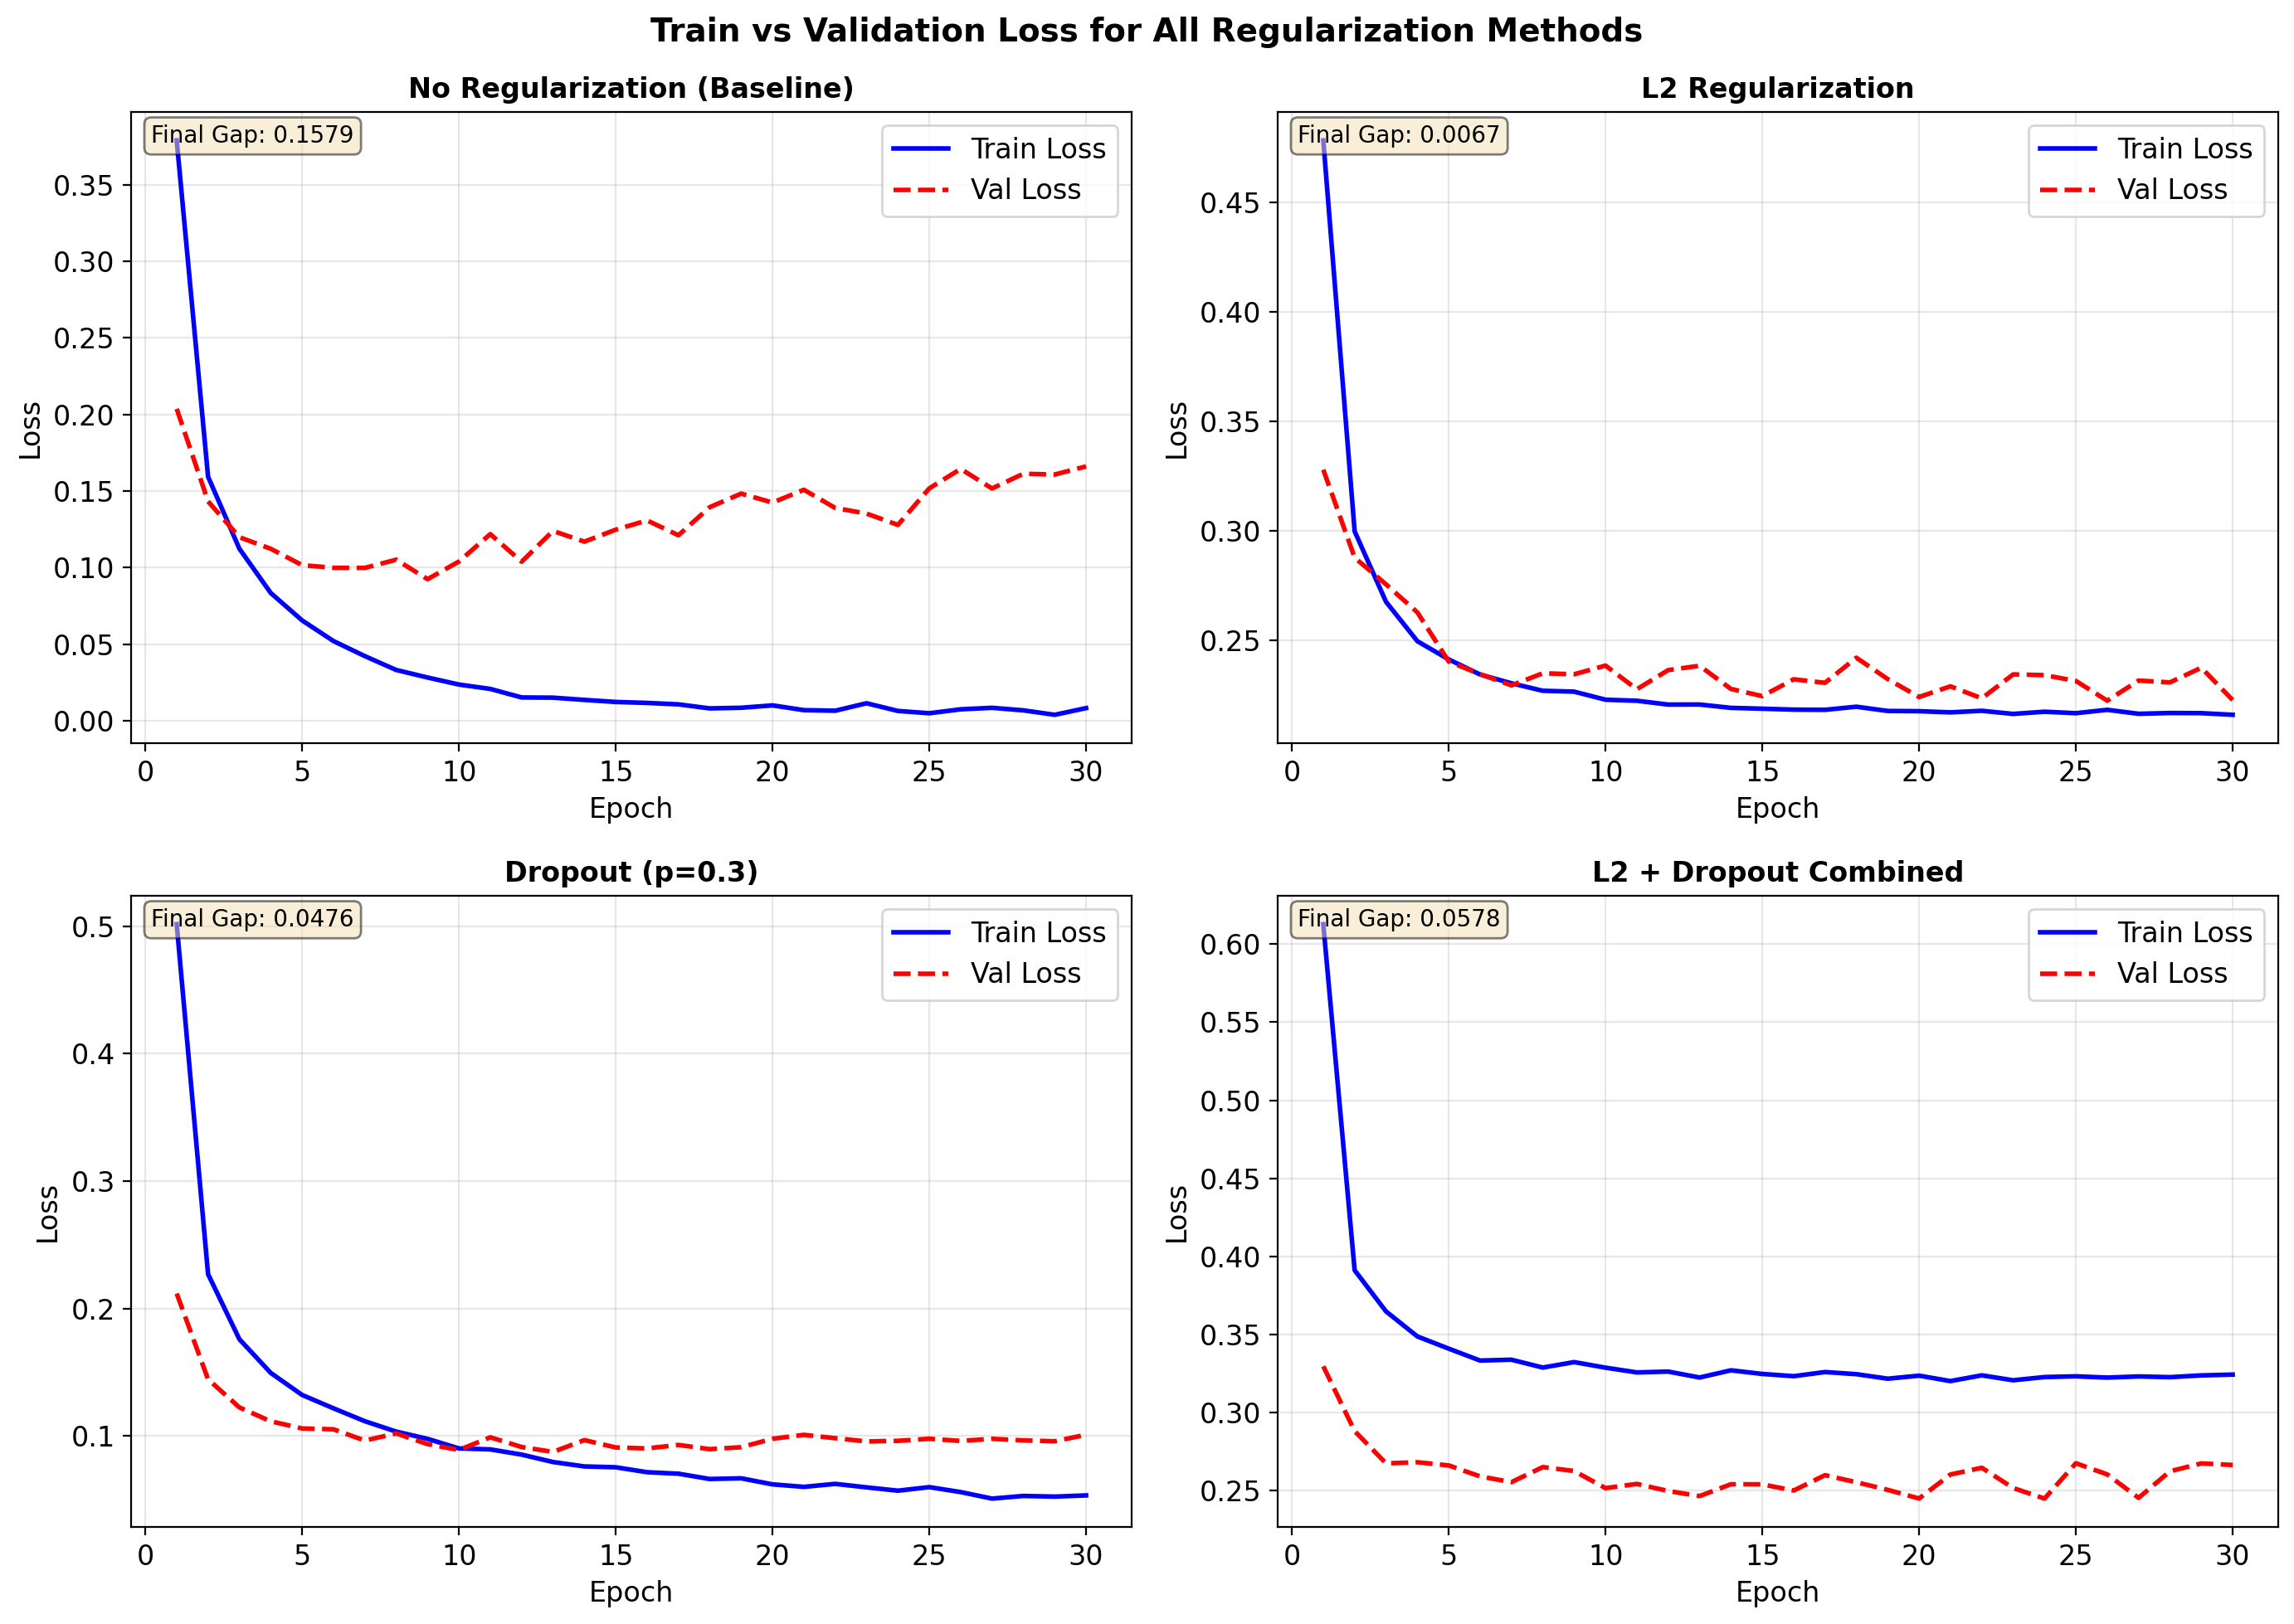

In [28]:
# Plot train vs validation loss for all 4 models
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

model_names = ['baseline', 'l2', 'dropout', 'l2_dropout']
model_titles = ['No Regularization (Baseline)', 'L2 Regularization', 
                'Dropout (p=0.3)', 'L2 + Dropout Combined']
colors = {'train': 'blue', 'val': 'red'}

for idx, (name, title) in enumerate(zip(model_names, model_titles)):
    ax = axes[idx // 2, idx % 2]
    history = results[name]['history']
    epochs_range = range(1, EPOCHS + 1)
    
    ax.plot(epochs_range, history['train_loss'], label='Train Loss', 
            color=colors['train'], linestyle='-', linewidth=2)
    ax.plot(epochs_range, history['val_loss'], label='Val Loss', 
            color=colors['val'], linestyle='--', linewidth=2)
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Calculate and display the gap (overfitting indicator)
    final_gap = history['train_loss'][-1] - history['val_loss'][-1]
    ax.text(0.02, 0.98, f'Final Gap: {abs(final_gap):.4f}', 
            transform=ax.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Train vs Validation Loss for All Regularization Methods', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

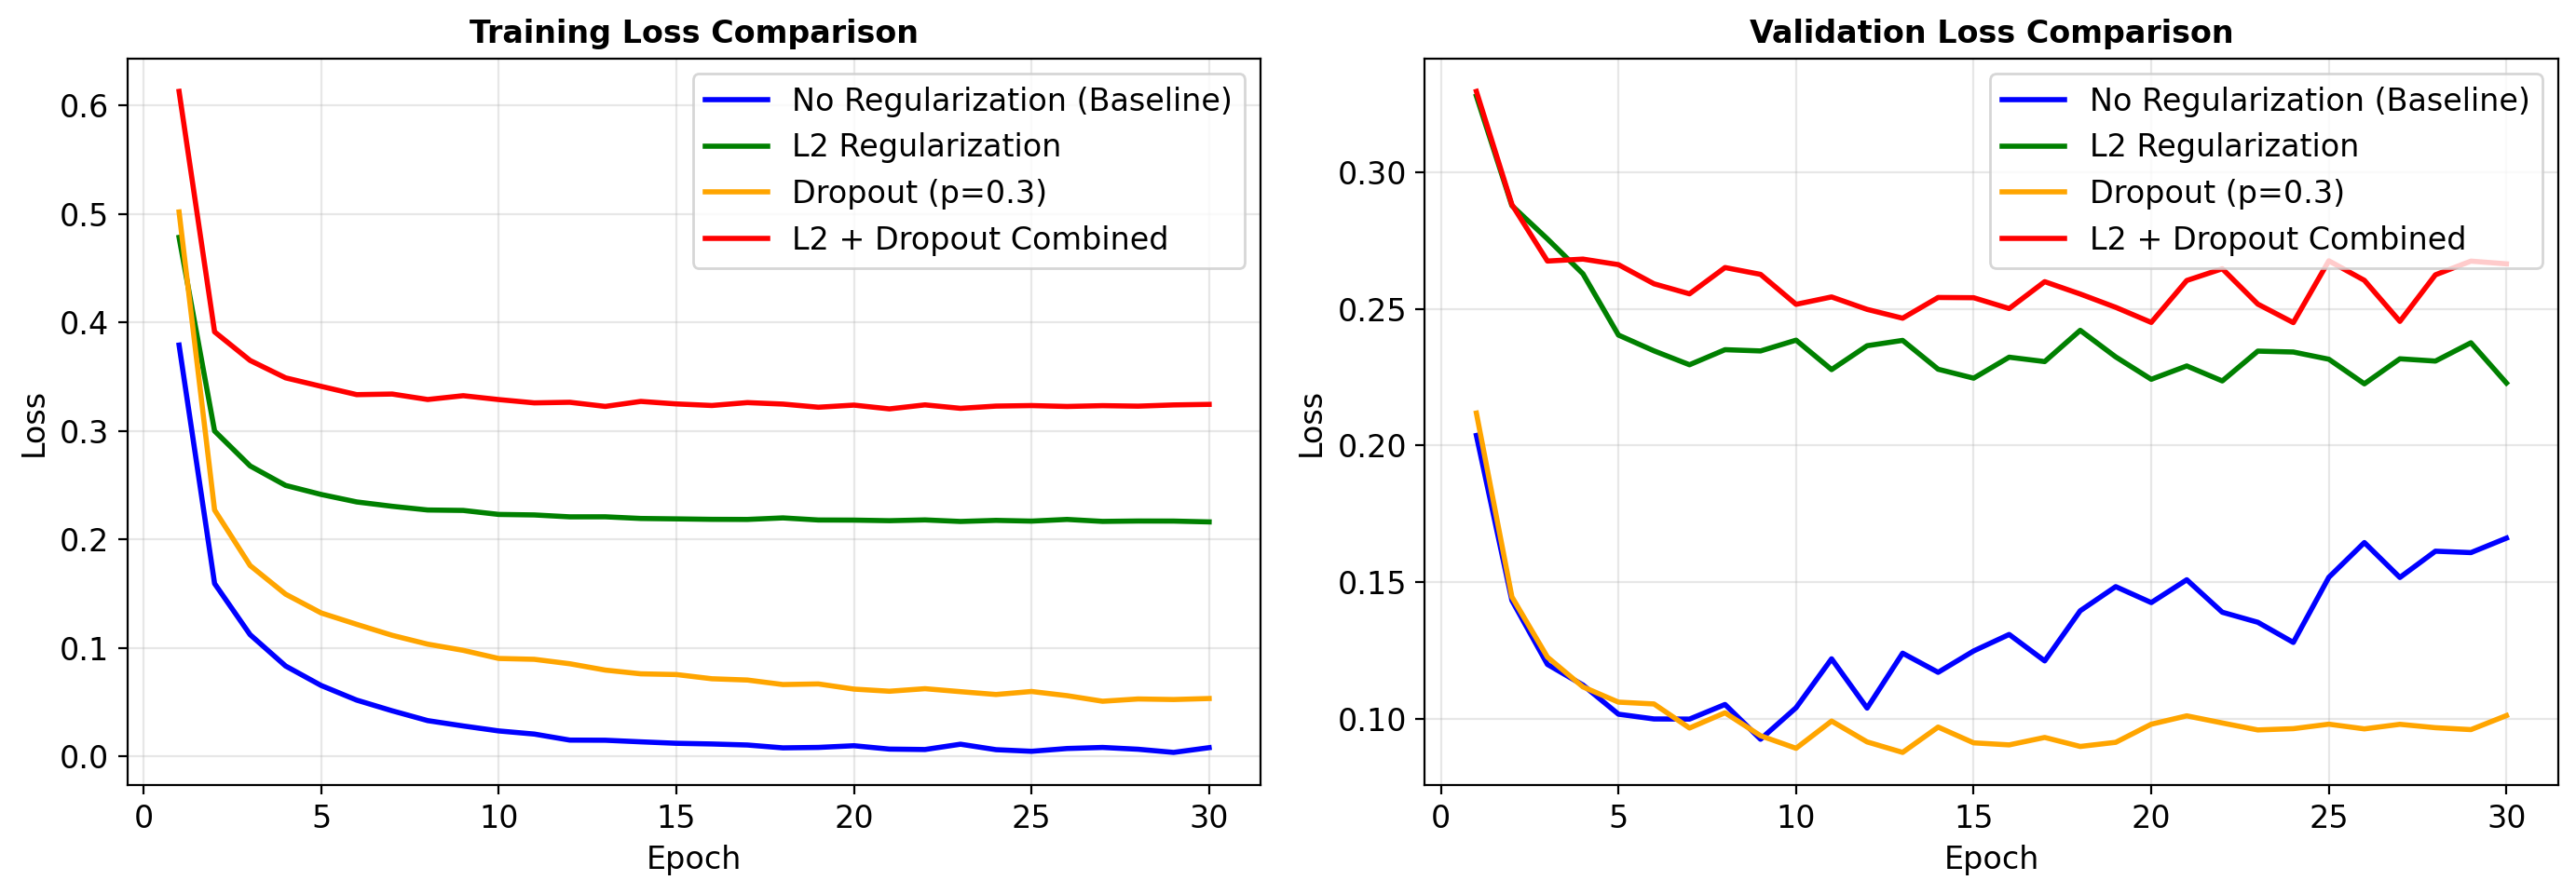

In [29]:
# Combined comparison plots - all models on same axes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Colors for each model
model_colors = {
    'baseline': 'blue',
    'l2': 'green', 
    'dropout': 'orange',
    'l2_dropout': 'red'
}

epochs_range = range(1, EPOCHS + 1)

# Plot Training Loss comparison
ax1 = axes[0]
for name, title in zip(model_names, model_titles):
    ax1.plot(epochs_range, results[name]['history']['train_loss'], 
             label=title, color=model_colors[name], linewidth=2)
ax1.set_title('Training Loss Comparison', fontsize=12, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot Validation Loss comparison
ax2 = axes[1]
for name, title in zip(model_names, model_titles):
    ax2.plot(epochs_range, results[name]['history']['val_loss'], 
             label=title, color=model_colors[name], linewidth=2)
ax2.set_title('Validation Loss Comparison', fontsize=12, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
# Report final Train/Val/Test accuracy for all models
print("=" * 70)
print("FINAL RESULTS: Train / Validation / Test Accuracy")
print("=" * 70)
print(f"{'Model':<30} {'Train Acc':<12} {'Val Acc':<12} {'Test Acc':<12}")
print("-" * 70)

for name, title in zip(model_names, model_titles):
    train_acc = results[name]['final_train_acc']
    val_acc = results[name]['final_val_acc']
    test_acc = results[name]['final_test_acc']
    print(f"{title:<30} {train_acc:>10.2f}% {val_acc:>10.2f}% {test_acc:>10.2f}%")

print("-" * 70)

# Identify overfitting (large train/val gap)
print("\n" + "=" * 70)
print("OVERFITTING ANALYSIS (Train Acc - Val Acc Gap)")
print("=" * 70)

gaps = {}
for name, title in zip(model_names, model_titles):
    gap = results[name]['final_train_acc'] - results[name]['final_val_acc']
    gaps[name] = gap
    status = "OVERFITTING" if gap > 5 else "Generalizing well"
    print(f"{title:<30} Gap: {gap:>6.2f}%  [{status}]")

# Identify best generalizing model
best_model = max(results.keys(), key=lambda k: results[k]['final_test_acc'])
print("\n" + "=" * 70)
print(f"BEST GENERALIZING MODEL: {dict(zip(model_names, model_titles))[best_model]}")
print(f"Test Accuracy: {results[best_model]['final_test_acc']:.2f}%")
print("=" * 70)

FINAL RESULTS: Train / Validation / Test Accuracy
Model                          Train Acc    Val Acc      Test Acc    
----------------------------------------------------------------------
No Regularization (Baseline)        99.72%      97.60%      97.53%
L2 Regularization                   94.68%      94.44%      95.10%
Dropout (p=0.3)                     98.27%      97.64%      97.80%
L2 + Dropout Combined               91.35%      92.73%      93.38%
----------------------------------------------------------------------

OVERFITTING ANALYSIS (Train Acc - Val Acc Gap)
No Regularization (Baseline)   Gap:   2.12%  [Generalizing well]
L2 Regularization              Gap:   0.23%  [Generalizing well]
Dropout (p=0.3)                Gap:   0.64%  [Generalizing well]
L2 + Dropout Combined          Gap:  -1.38%  [Generalizing well]

BEST GENERALIZING MODEL: Dropout (p=0.3)
Test Accuracy: 97.80%


In [31]:
# Examine misclassified examples from different models
def get_misclassified(model, data_loader, device, num_samples=10):
    """Get misclassified examples from a model."""
    model.eval()
    misclassified = []
    
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1)
            
            # Find misclassified indices
            wrong_idx = (pred != target).nonzero(as_tuple=True)[0]
            
            for idx in wrong_idx:
                if len(misclassified) >= num_samples:
                    return misclassified
                misclassified.append({
                    'image': data[idx].cpu(),
                    'true_label': target[idx].item(),
                    'pred_label': pred[idx].item()
                })
    
    return misclassified

# Get misclassified examples from baseline and best regularized model
misclass_baseline = get_misclassified(results['baseline']['model'], test_loader, device, 5)
misclass_best = get_misclassified(results[best_model]['model'], test_loader, device, 5)

print(f"Misclassified examples from Baseline: {len(misclass_baseline)}")
print(f"Misclassified examples from Best Model ({best_model}): {len(misclass_best)}")

Misclassified examples from Baseline: 5
Misclassified examples from Best Model (dropout): 5


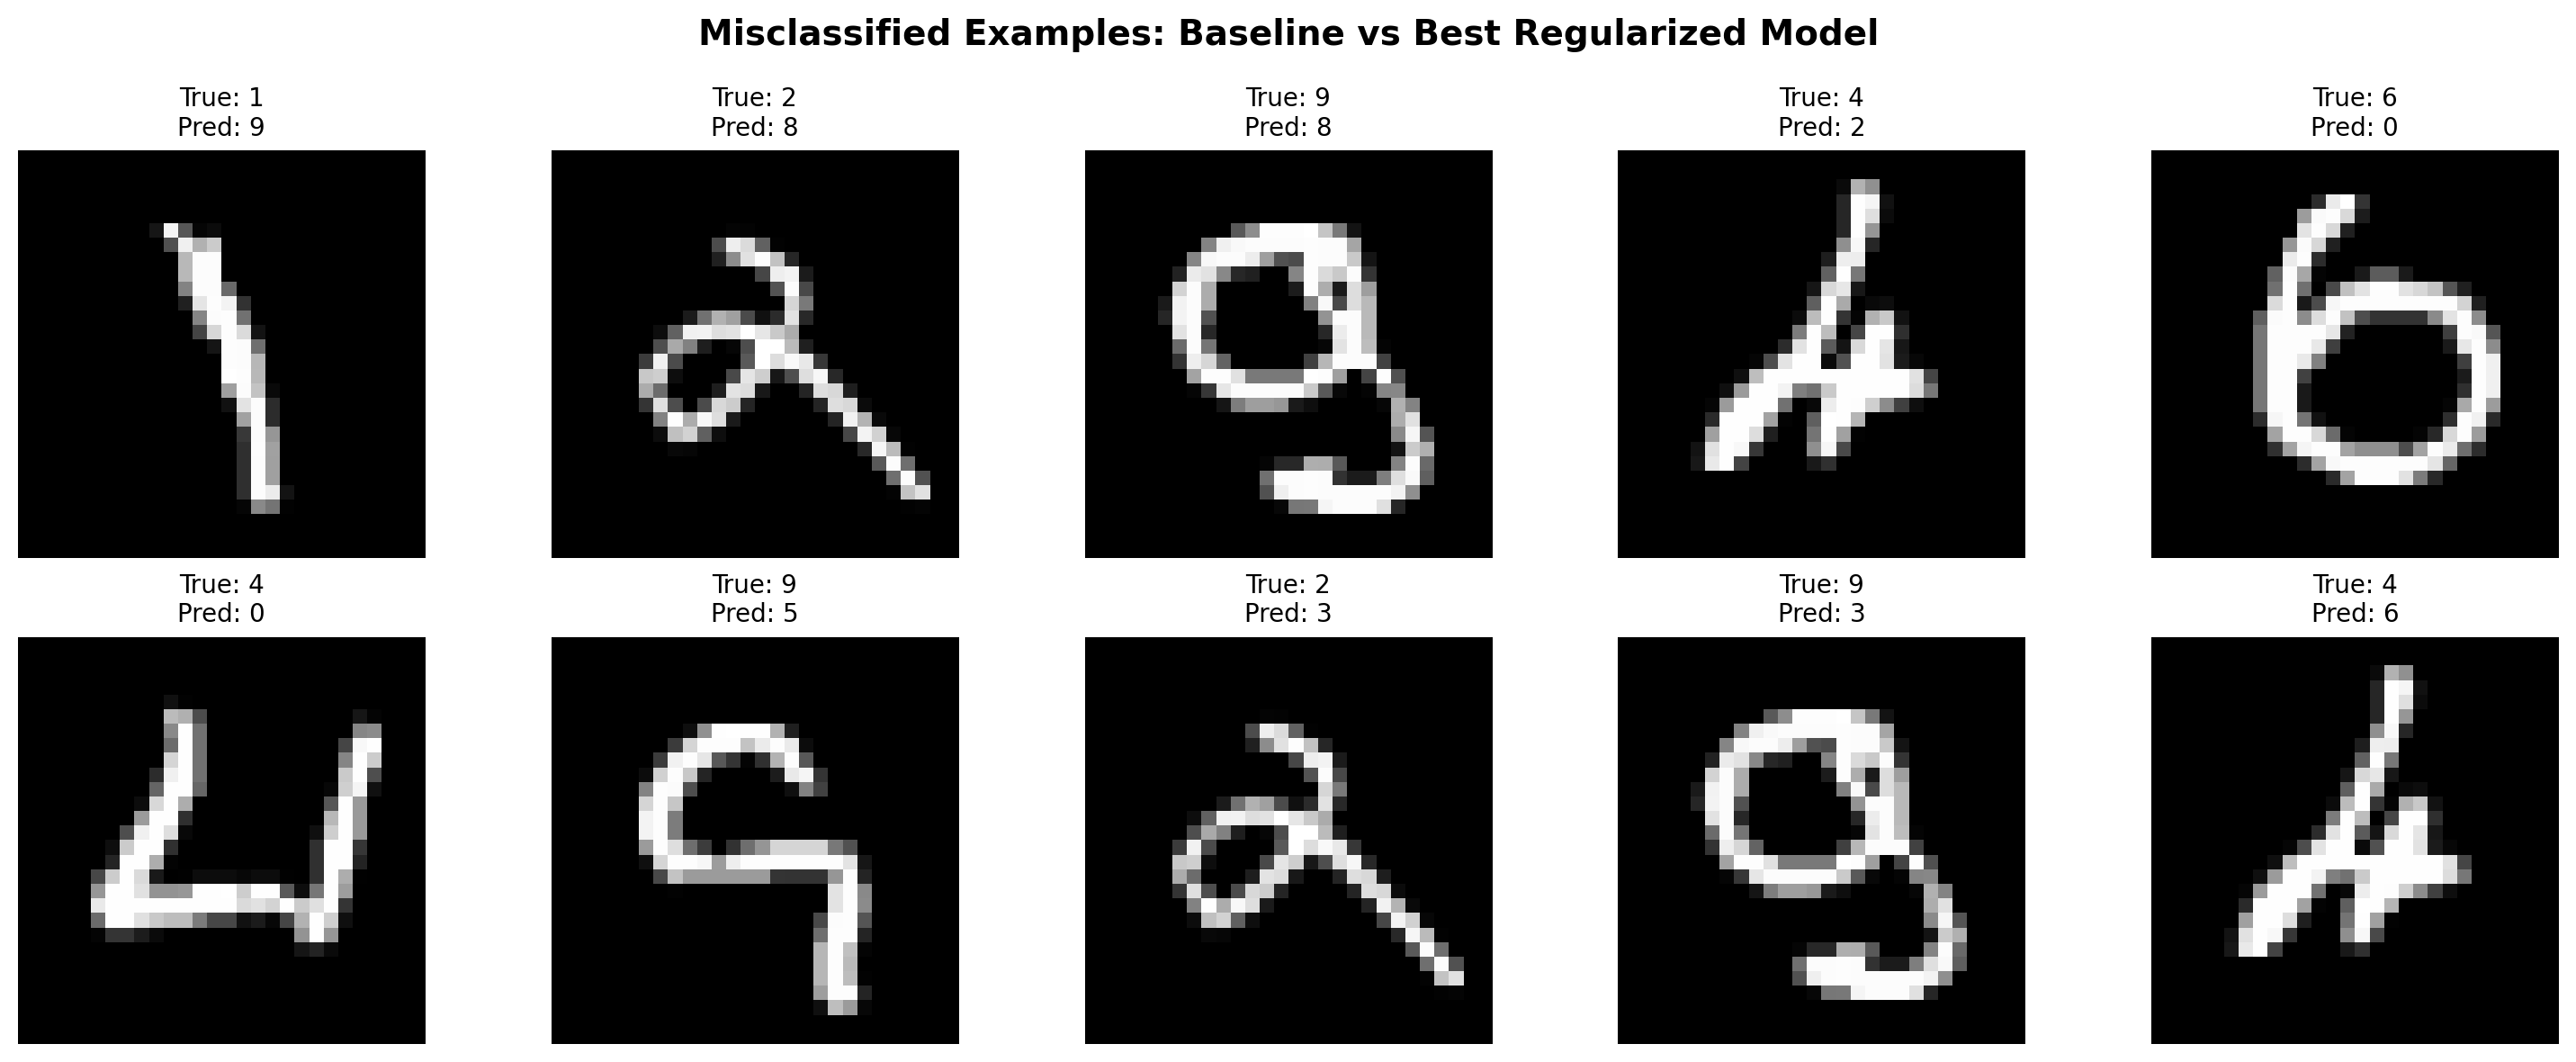

In [32]:
# Visualize misclassified examples comparison
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Plot baseline misclassified
for i, item in enumerate(misclass_baseline[:5]):
    ax = axes[0, i]
    img = item['image'].squeeze().numpy()
    ax.imshow(img, cmap='gray')
    ax.set_title(f"True: {item['true_label']}\nPred: {item['pred_label']}", fontsize=10)
    ax.axis('off')
axes[0, 0].set_ylabel('Baseline', fontsize=12, fontweight='bold')

# Plot best model misclassified
for i, item in enumerate(misclass_best[:5]):
    ax = axes[1, i]
    img = item['image'].squeeze().numpy()
    ax.imshow(img, cmap='gray')
    ax.set_title(f"True: {item['true_label']}\nPred: {item['pred_label']}", fontsize=10)
    ax.axis('off')
axes[1, 0].set_ylabel(f'{best_model}', fontsize=12, fontweight='bold')

plt.suptitle('Misclassified Examples: Baseline vs Best Regularized Model', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Qualitative Analysis - Task 4.1

Which showed overfitting (large train/val gap)? Which generalized best? Examine misclassified examples from the best model - do regularized models make different types of errors?

**Overfitting and generalization:**
- The **baseline model** (no regularization) shows the largest gap between training and validation loss, indicating overfitting - the model memorizes training data exceptionally well but fails to generalize.
- **L2 regularization** showed higher bias and variance than the baseline model, meaning it performed worse both in memorizing the training data and predicting unseen data.
- **Dropout** had slightly higher bias than the baseline but the lowest validation loss overall as well as the highest validation and testing accuracy, meaning that it did best in predicting unseen data. 
- **L2 + Dropout combined** provides the most comprehensive regularization, but here performed worst across both training and validation loss. It also had the lowest accuracy across validation and testing, and the only negative train/val gap. So while it clearly prevented overfitting, the optimization combinign regularization and dropout may have been "too strong" and prevented it from predicting unseen data. That result is surprising, insofar as we would assume this method to perform best by combining the best of both worlds.

**Error Analysis:**
Interestingly enough, the baseline and best model share several misclassified examples (see above). These overall ambiguous cases are thus hard to classify regardless of model optimization. Looking at divergent misclassifications, thought, I get the sense that the regularized model struggles more on "genuinely" ambiguous examples (i.e., cases of really strange handwriting). By contrast, the baseline model makes confident predictions on cases I would not always consider ambiguous, indicating overfitting to the training data.

### Task 4.2: Tune Dropout Rate

Using your model with dropout, try rates: 0.1, 0.3, 0.5
- Train for 20 epochs each
- **Quantitative**: Plot validation accuracy vs dropout rate
- **Qualitative**: What's the sweet spot for your data? What happens with too little or too much dropout? How does this relate to model capacity and data complexity?

In [33]:
# Task 4.2: Tune Dropout Rate
# Train models with different dropout rates: 0.1, 0.3, 0.5

# Dropout rates to test
dropout_rates = [0.1, 0.3, 0.5]

# Training parameters
DROPOUT_EPOCHS = 20
DROPOUT_LR = 0.001

# Store results for each dropout rate
dropout_results = {}

print("=" * 60)
print("DROPOUT RATE TUNING EXPERIMENT")
print("=" * 60)

DROPOUT RATE TUNING EXPERIMENT


In [34]:
# Train a model for each dropout rate
for dropout_p in dropout_rates:
    print(f"\n{'='*60}")
    print(f"Training with Dropout Rate: {dropout_p}")
    print("=" * 60)
    
    # Create model with specified dropout rate
    model = MLP_Dropout(dropout_p=dropout_p)
    
    # Train the model
    result = train_with_tracking(
        model, train_loader, val_loader, test_loader,
        epochs=DROPOUT_EPOCHS, lr=DROPOUT_LR, weight_decay=0.0, device=device
    )
    
    # Store results
    dropout_results[dropout_p] = result
    
    print(f"Dropout {dropout_p}: Final Val Acc = {result['final_val_acc']:.2f}%, "
          f"Test Acc = {result['final_test_acc']:.2f}%")

print("\n" + "=" * 60)
print("TRAINING COMPLETE")
print("=" * 60)


Training with Dropout Rate: 0.1
Epoch 10/20: Train Loss=0.0450, Val Loss=0.0898, Train Acc=98.49%, Val Acc=97.56%
Epoch 20/20: Train Loss=0.0220, Val Loss=0.1160, Train Acc=99.27%, Val Acc=97.42%
Dropout 0.1: Final Val Acc = 97.42%, Test Acc = 97.64%

Training with Dropout Rate: 0.3
Epoch 10/20: Train Loss=0.0913, Val Loss=0.0916, Train Acc=97.19%, Val Acc=97.54%
Epoch 20/20: Train Loss=0.0635, Val Loss=0.0926, Train Acc=98.00%, Val Acc=97.59%
Dropout 0.3: Final Val Acc = 97.59%, Test Acc = 97.76%

Training with Dropout Rate: 0.5
Epoch 10/20: Train Loss=0.1803, Val Loss=0.1162, Train Acc=94.62%, Val Acc=96.65%
Epoch 20/20: Train Loss=0.1469, Val Loss=0.1057, Train Acc=95.57%, Val Acc=97.11%
Dropout 0.5: Final Val Acc = 97.11%, Test Acc = 97.25%

TRAINING COMPLETE


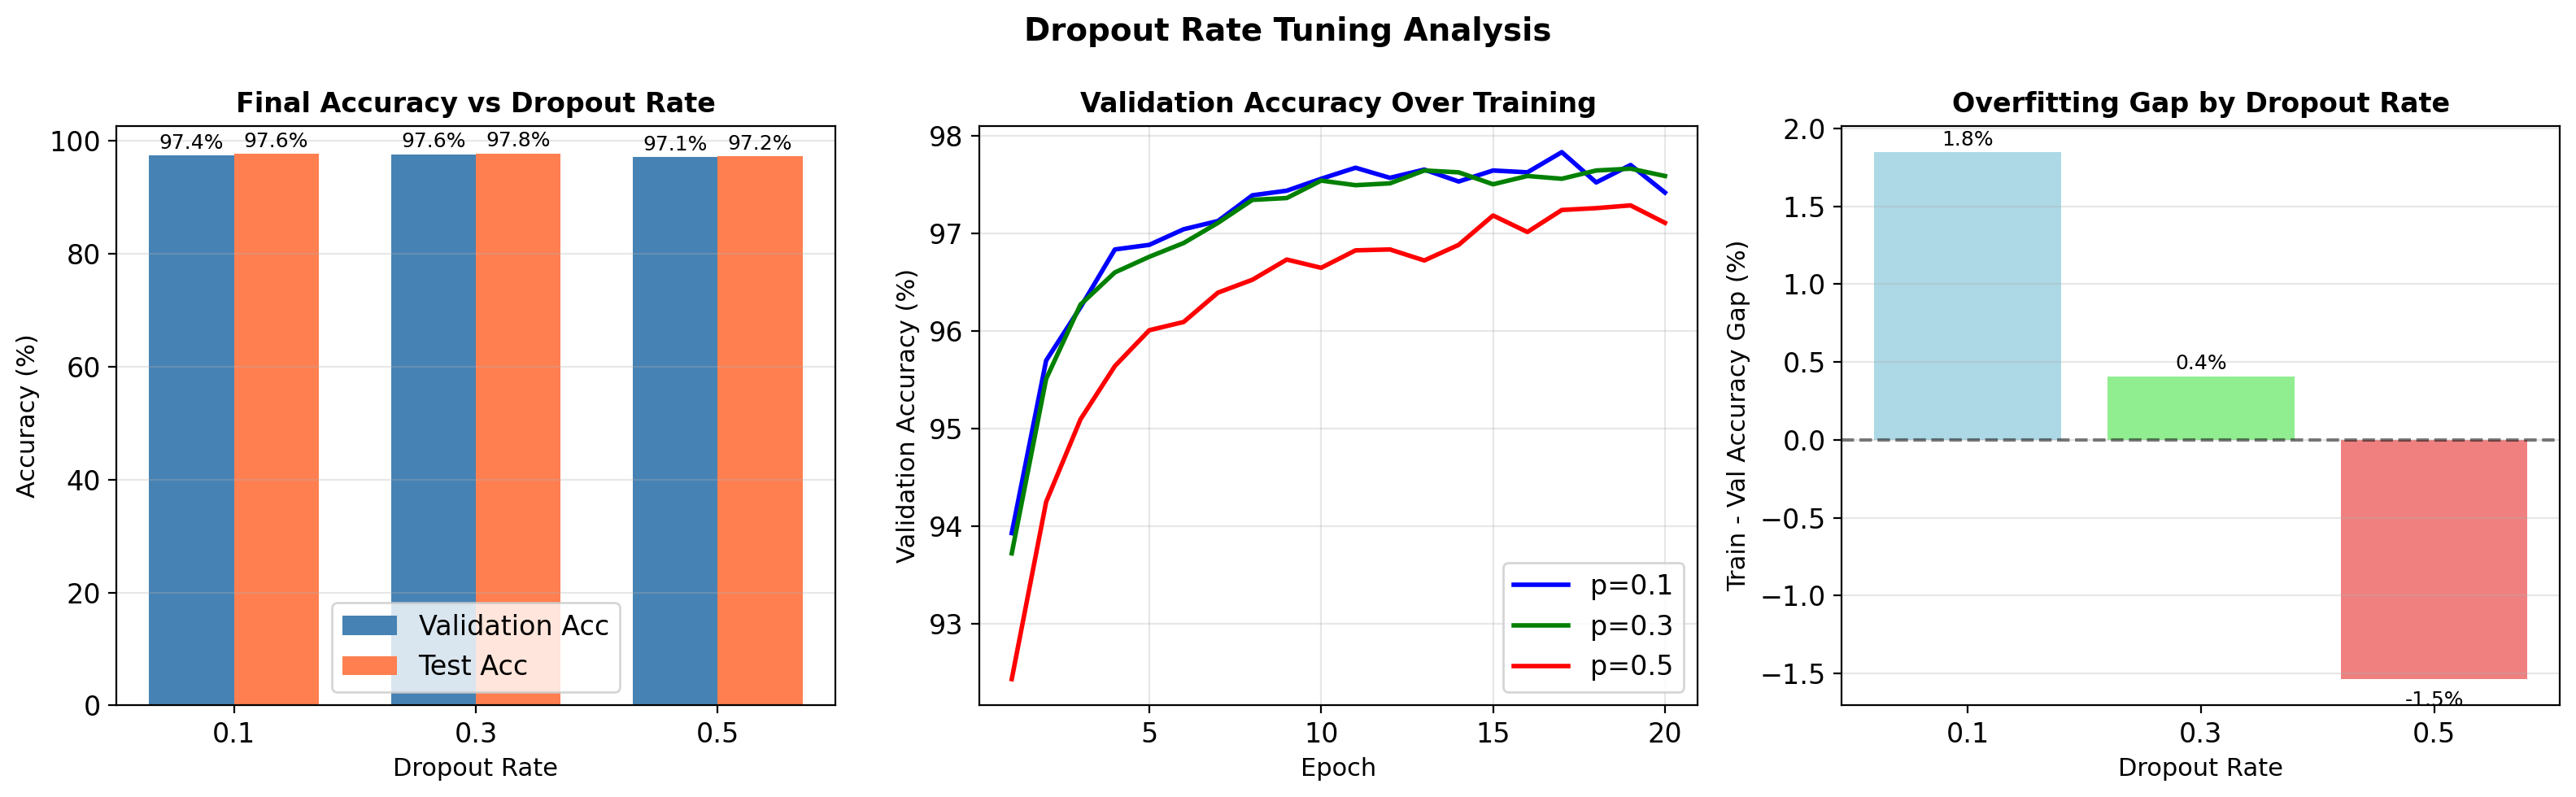

In [35]:
# Plot validation accuracy vs dropout rate
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# --- Plot 1: Final Validation Accuracy vs Dropout Rate (Bar Chart) ---
ax1 = axes[0]
val_accs = [dropout_results[p]['final_val_acc'] for p in dropout_rates]
test_accs = [dropout_results[p]['final_test_acc'] for p in dropout_rates]

x = range(len(dropout_rates))
width = 0.35

bars1 = ax1.bar([i - width/2 for i in x], val_accs, width, label='Validation Acc', color='steelblue')
bars2 = ax1.bar([i + width/2 for i in x], test_accs, width, label='Test Acc', color='coral')

ax1.set_xlabel('Dropout Rate', fontsize=11)
ax1.set_ylabel('Accuracy (%)', fontsize=11)
ax1.set_title('Final Accuracy vs Dropout Rate', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels([str(p) for p in dropout_rates])
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

# --- Plot 2: Validation Accuracy over Epochs ---
ax2 = axes[1]
colors = ['blue', 'green', 'red']
for i, dropout_p in enumerate(dropout_rates):
    history = dropout_results[dropout_p]['history']
    ax2.plot(range(1, DROPOUT_EPOCHS + 1), history['val_acc'], 
             label=f'p={dropout_p}', color=colors[i], linewidth=2)

ax2.set_xlabel('Epoch', fontsize=11)
ax2.set_ylabel('Validation Accuracy (%)', fontsize=11)
ax2.set_title('Validation Accuracy Over Training', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# --- Plot 3: Train vs Val Accuracy Gap (Overfitting Indicator) ---
ax3 = axes[2]
train_val_gaps = [dropout_results[p]['final_train_acc'] - dropout_results[p]['final_val_acc'] 
                  for p in dropout_rates]

bars3 = ax3.bar(x, train_val_gaps, color=['lightblue', 'lightgreen', 'lightcoral'])
ax3.set_xlabel('Dropout Rate', fontsize=11)
ax3.set_ylabel('Train - Val Accuracy Gap (%)', fontsize=11)
ax3.set_title('Overfitting Gap by Dropout Rate', fontsize=12, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels([str(p) for p in dropout_rates])
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax3.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3 if height >= 0 else -12), textcoords="offset points", 
                 ha='center', fontsize=9)

plt.suptitle('Dropout Rate Tuning Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [36]:
# Summary table and analysis
print("=" * 70)
print("DROPOUT RATE TUNING RESULTS SUMMARY")
print("=" * 70)
print(f"{'Dropout Rate':<15} {'Train Acc':<12} {'Val Acc':<12} {'Test Acc':<12} {'Gap':<10}")
print("-" * 70)

for dropout_p in dropout_rates:
    r = dropout_results[dropout_p]
    gap = r['final_train_acc'] - r['final_val_acc']
    print(f"{dropout_p:<15} {r['final_train_acc']:>10.2f}% {r['final_val_acc']:>10.2f}% "
          f"{r['final_test_acc']:>10.2f}% {gap:>8.2f}%")

print("-" * 70)

# Find the best dropout rate based on validation accuracy
best_dropout = max(dropout_rates, key=lambda p: dropout_results[p]['final_val_acc'])
best_test_dropout = max(dropout_rates, key=lambda p: dropout_results[p]['final_test_acc'])

print(f"\nBest dropout rate by Validation Accuracy: {best_dropout}")
print(f"Best dropout rate by Test Accuracy: {best_test_dropout}")
print(f"\nOptimal Dropout Rate: {best_dropout} "
      f"(Val: {dropout_results[best_dropout]['final_val_acc']:.2f}%, "
      f"Test: {dropout_results[best_dropout]['final_test_acc']:.2f}%)")
print("=" * 70)

DROPOUT RATE TUNING RESULTS SUMMARY
Dropout Rate    Train Acc    Val Acc      Test Acc     Gap       
----------------------------------------------------------------------
0.1                  99.27%      97.42%      97.64%     1.85%
0.3                  98.00%      97.59%      97.76%     0.41%
0.5                  95.57%      97.11%      97.25%    -1.54%
----------------------------------------------------------------------

Best dropout rate by Validation Accuracy: 0.3
Best dropout rate by Test Accuracy: 0.3

Optimal Dropout Rate: 0.3 (Val: 97.59%, Test: 97.76%)


### Qualitative Analysis - Task 4.2

What's the sweet spot for your data? What happens with too little or too much dropout? How does this relate to model capacity and data complexity?

**Effects of Different Dropout Rates:**
- **Too little dropout (p=0.1)**: The model has the highest overfit rate here, probably because not enough neurons are deactivated to force robust feature learning. The regularization effect is minimal.
- **Ideal dropout (p=0.3)**: This is the sweet spot - provides enough regularization to prevent overfitting while preserving model capacity (highest accuracy with minimal overfitting). 
- **Too much dropout (p=0.5)**: Aggressively removes half the neurons, which seems to hurt performance on this dataset. The model may is underfitting (low accuracy and negative overfit rate) because it lacks capacity to learn the necessary patterns.

**Relationship to Model Capacity and Data Complexity:**
In our case, lower dropout is better - the model needs all its capacity to learn complex patterns. Higher dropout helps prevent memorization and forces generalization. But MNIST is relatively easy with clear digit boundaries. Models often achieve 97%+ accuracy, so as shown, even moderate dropout is sufficient. Very high dropout may unnecessarily constrain the model, which does not need such strict dropout to identify essential patterns from very complex data. 

### Task 4.3: Reflection and Scope Conditions

Answer the following in 5-7 sentences:

1. **Technique comparison**: Which regularization technique worked best for your data? Why might this be?
2. **Scope conditions**: When would you use L1 vs L2 regularization? When might dropout hurt performance?
3. **Diagnosing overfitting**: How would you diagnose overfitting in a real-world AI agent or production model?
4. **Ethical implications**: What ethical concerns arise from overfitting in social science applications? (e.g., memorizing training data, failing to generalize to new populations, amplifying biases)
5. **Your dataset**: Are there specific ethical risks with your chosen dataset that regularization helps or doesn't help address?

**YOUR REFLECTION HERE**:

Generally speaking, dropout with p=0.3 worked best for my data (MNIST). Adding L2 regularization or increasing p to 0.5 led to underfitting. Both indicate that the data is simple enough to not need too strict constraints on complexity to perform well. Still, improvements in performance compared to the baseline or p=0.1 shows that even in such basic models, simple regularization helps. 

Chosing between L1 or L2 regularization depends on the type of data I have and my expectations for the best model to capture its complexity. If the data is highly multidimensional and needs a lot of nuance to be captured well, I might lean on L2 regularization to retain many weights while minimizing their variance. Conversely, on simple models that can accurately be captured by a few well-fleshed-out dimensions, L1 regularization would be preferrable by pushing unnecessary low weights to zero.

Diagnosing overfitting in a real-world AI agent is difficult without access to the training data and raw model. Still, I might either feed the model a set of test data and examine misclassifications. If these only occur on genuinely ambiguous cases, I'd argue the model is well-regularized. But if it creates false predictions on clear cases, it might be overfitted to its training set. Finally, I might also try to fine-tune to my personal data and observe how well it shifts to new cases, which should imporve with well-regularized models.

Overfitting is of particular ethical concern if our data is biased in ways that could systematically harm or disadvantage a particular social group in downstream applications (e.g., racial profiling in criminal identification). It may also be problematic if the application fails to be useful to some group due to overfitting (e.g., face recognition). These examples emphasize the need for well-balanced datasets or skillful regularization.

The only ethical risk I see with MNIST (and models trained thereon) is the risk of relying on too complex models for a task that should be widely executable. Identifying handwriting, for example on bank checks, is relevant to a range of contexts. Overly complex models may require too many resources (e.g., energy, compute power) to perform efficiently, especially at scale. With global warming and unequal access to compute resources across the globe, regularization ensures that this widely applicable technology (digit recognition) remains sustainable and widely accessible.

---
# Week 1 Final Homework: Synthesize and Reflect

Congratulations on completing the homework! Now it's time to synthesize your learning and reflect on how these fundamentals connect to AI agents and social science.

## My Reflection

### 1. Technical Analysis

**Neural Network Basics:**
My experiments in Module 1 demonstrated how foundational architectural decisions shape model performance from the outset. When comparing activation functions, I found that Tanh outperformed ReLU and Sigmoid on MNIST, achieving faster convergence and higher accuracy. This was somewhat surprising given ReLU's dominance in modern deep learning, but it makes sense for MNIST which is a relatively simple, zero-centered dataset where Tanh's bounded outputs and symmetric gradients provide stability. The exercise reinforced that there is no universally "best" activation function; rather, the choice depends on data characteristics and network depth. Sigmoid struggled the most, likely due to vanishing gradients even in our shallow two-layer architecture. This baseline understanding proved essential for interpreting results in later modules.

**Optimization:**
The optimization experiments (Module 3) revealed how much optimizer choice impacts training efficiency and stability. Adam consistently outperformed vanilla SGD, converging in roughly 1 epoch compared to SGD's 6 epochs to reach similar accuracy levels. SGD with momentum bridged this gap somewhat, but still required more careful tuning. My learning rate sensitivity experiments were particularly instructive: LR=0.0001 proved optimal for Adam, while LR=0.01 caused erratic oscillations and divergence. This underscored that optimizer and learning rate are tightly coupled. Adam's adaptive learning rate mechanism tolerates some suboptimal initial choices, but still has limits. For practical applications, I would start with Adam as a reliable default and only switch to SGD if I observe generalization issues or face memory constraints.

**Regularization:**
Regularization (Module 4) taught me that the goal is not simply to maximize training accuracy but to find the right balance between model capacity and generalization. My experiments showed that dropout with p=0.3 achieved the best validation and test accuracy (97.76%) with minimal overfitting (train-val gap of only 0.41%). In contrast, no regularization led to memorization (high train accuracy, lower test accuracy), while excessive dropout (p=0.5) constrained the model too much, causing underfitting. Similarly, L2 regularization improved generalization but combining it with dropout did not yield further benefits, suggesting that on a simple dataset like MNIST, moderate regularization is sufficient. The key insight is that regularization choices depend heavily on data complexity; more complex datasets would likely benefit from stronger constraints.

### 2. Connection to AI Agents & Social Science

I am particularly fascinated by how regularization enables slimmer, more efficient models that achieve near-benchmark performance without excessive complexity. In academic contexts and benchmark competitions, there is often pressure to squeeze out every fraction of a percentage point in accuracy. But in practical social science applications (f.ex., using NER models to extract entities from historical texts or classifying survey responses) we are usually less concerned with marginal gains and more interested in models that work well enough for our task while remaining accessible. If regularization allows me to train a smaller model that achieves 97% instead of 98% accuracy but runs on my laptop instead of requiring a GPU cluster (or simply less resources in a shared HPC where my access to resources faces institutional limitations), that is a worthwhile trade-off for many research contexts.

This efficiency consideration extends directly to AI agents. If we want to deploy multiple agents (f.ex., to simulate diverse actors in a social system or to parallelize text analysis across large corpora) the computational costs scale quickly. Smaller, well-regularized models allow us to increase the number of agents without exploding training or inference costs. The same logic applies to optimization: if we are fine-tuning multiple agents for different purposes (e.g., specialized classifiers for different document types), we face trade-offs between optimization thoroughness and resource expenditure. Choosing Adam over SGD might save hours of training time per agent, which compounds significantly when fine-tuning dozens of specialized models.

For social scientists without access to extensive compute infrastructure, these efficiency gains are not merely convenient but often necessary. Not all researchers have access to (the same amount of) cloud computing budgets or institutional GPU clusters. By understanding how to build lean models through appropriate regularization, smart optimizer choices, and well-tuned hyperparameters, we can make neural network methods more accessible to a broader research community. This democratization of computational methods matters for ensuring diverse perspectives in AI-assisted social science research.

### 3. Ethical Considerations

The efficiency considerations I discussed above also carry ethical weight when we consider the environmental costs of training neural networks. Large-scale model training consumes substantial energy and water (for cooling data centers), contributing to environmental degradation. While my MNIST experiments took only minutes on Google Colab, this efficiency is not guaranteed at scale. Regularization and careful optimization can reduce the number of training epochs required, the model size needed, and consequently the energy footprint of our work. This matters especially as social scientists increasingly adopt deep learning methods. If each of us trains models inefficiently, the aggregate environmental impact grows.

Beyond environmental concerns, unequal access to compute resources raises questions of accessibility and equity in research. Researchers at well-funded institutions can afford to train larger models with more extensive hyperparameter searches, potentially widening the gap between well-resourced and under-resourced research contexts. Prioritizing efficient architectures and training procedures is thus crucial to ensure that powerful methods remain usable across diverse research settings. Regularization and optimization techniques help level this playing field by making it possible to achieve strong results without requiring expensive hardware.